# 데이터셋 - Road Sense
실제 교통사고 데이터를 기반으로 교통사고 심각도 예측 Kaggle 대회용으로 수정된 데이터셋을 사용했습니다.    
사고 정보, 도로 정보, 차량 정보, 인적 요인 데이터셋으로 구성되어 있습니다.

# 목표
프로젝트의 목표는 교통사고 데이터(RoadSense)를 기반으로 사고 심각도(Gravity)를 예측하는 모델을 개발하는 것입니다.    
최종적으로 사고 심각도를 조기에 예측할 수 있는 모델을 통해 교통 안전 개선 및 사고 예방 정책 수립에 데이터 기반 인사이트를 제공하는 것을 목표로 합니다.

In [2]:
# 라이브러리

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import string
from datetime import datetime

# 1. 데이터 로드 및 구조 확인하기

Test 데이터는 형식이 대부분 이미 깔끔하고 일정하게 정규화된 형태이고 Train 데이터는 대소문자가 섞여있거나 데이터타입이 불규칙한것들이 확인된다.

1. 활용할 모든 데이터를 변수에 저장하여 재사용 및 접근이 용이하도록 구성한다.
2. 총 8개의 데이터셋을 train과 test로 구분하여 구성을 확인한다.
3. 상위 데이터 조회, 데이터셋의 정보, 결측치를 확인한다.    

In [3]:
# 1. 데이터 로드 및 변수 저장

accidents_train = pd.read_csv('./data/accidents_train.csv')
places_train = pd.read_csv('./data/places_train.csv')
users_train = pd.read_csv('./data/users_train.csv')
vehicles_train = pd.read_csv('./data/vehicles_train.csv')

accidents_test = pd.read_csv('./data/accidents_test.csv')
places_test = pd.read_csv('./data/places_test.csv')
users_test = pd.read_csv('./data/users_test.csv')
vehicles_test = pd.read_csv('./data/vehicles_test.csv')

## Train

In [4]:
# accidents

accidents_train.head(3)

,AccidentId,Gravity,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,CollisionType,PostalAddress,GPSCode,Latitude,Longitude
0,201800000001,NonLethal,24/01/2018,15:05:00,daylight,590,5,No,Y-type,Normal,2Vehicles-BehindVehicles-Frontal,route des Ansereuilles,M,50.555225,2.556955
1,201800000002,NonLethal,Feb 12 2018,10:15:00,Daylight,590,11,Yes,Square,VERYGOOD,NoCollision,Place du général de Gaul,M,50.529369,2.529158
2,201800000003,NonLethal,04-Mar-18,11:35:00:20,daylight,590,477,Yes,T-type,Normal,NoCollision,Rue nationale,M,50.510923,2.512682


In [5]:
accidents_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52004 entries, 0 to 52003
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AccidentId        52004 non-null  object 
 1   Gravity           47822 non-null  object 
 2   Date              52004 non-null  object 
 3   Hour              52004 non-null  object 
 4   Light             52004 non-null  object 
 5   Department        52004 non-null  int64  
 6   Commune           52004 non-null  int64  
 7   InAgglomeration   52004 non-null  object 
 8   IntersectionType  52004 non-null  object 
 9   Weather           51999 non-null  object 
 10  CollisionType     52002 non-null  object 
 11  PostalAddress     51507 non-null  object 
 12  GPSCode           51959 non-null  object 
 13  Latitude          50383 non-null  float64
 14  Longitude         50383 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 6.0+ MB


In [6]:
# places

places_train.head(3)

,AccidentId,RoadType,RoadNumber,RoadSecNumber,RoadLetter,Circulation,LaneNumber,SpecialLane,Slope,RoadMarkerId,RoadMarkerDistance,Layout,StripWidth,LaneWidth,SurfaceCondition,Infrastructure,Localization,SchoolNear
0,201800000001,Departamental,Route 41,NaN,C,TwoWay,2.0,0,Flat,NaN,NaN,RightCurve,NaN,NaN,Normal,Unknown,Lane,0.0
1,201800000002,Communal,Dept-41,NaN,D,TwoWay,2.0,0,Flat,NaN,NaN,LeftCurve,NaN,NaN,Normal,Unknown,Lane,0.0
2,201800000003,Departamental,D39,NaN,D,TwoWay,2.0,0,Flat,NaN,NaN,NaN,NaN,NaN,Normal,Unknown,Lane,0.0


In [7]:
places_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54604 entries, 0 to 54603
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccidentId          54604 non-null  object 
 1   RoadType            54604 non-null  object 
 2   RoadNumber          34017 non-null  object 
 3   RoadSecNumber       153 non-null    float64
 4   RoadLetter          2701 non-null   object 
 5   Circulation         54219 non-null  object 
 6   LaneNumber          54125 non-null  float64
 7   SpecialLane         54116 non-null  object 
 8   Slope               54187 non-null  object 
 9   RoadMarkerId        39688 non-null  float64
 10  RoadMarkerDistance  39438 non-null  float64
 11  Layout              51133 non-null  object 
 12  StripWidth          12579 non-null  float64
 13  LaneWidth           12975 non-null  float64
 14  SurfaceCondition    51121 non-null  object 
 15  Infrastructure      51088 non-null  object 
 16  Loca

In [8]:
# users

users_train.head(3)

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
0,201800000001,A01,Driver,Car<=3.5T,M,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1960.0
1,201800000001,B01,Front Left,Car<=3.5T,M,NaN,SeatBelt,1,NaN,NaN,Unknown,1928.0
2,201800000002,A01,Pilote,Auto,Homme,NaN,SeatBelt,True,NaN,NaN,Unknown,1947.0


In [9]:
users_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118412 entries, 0 to 118411
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AccidentId          118412 non-null  int64 
 1   VehicleId           118412 non-null  object
 2   Seat                107007 non-null  object
 3   Category            118412 non-null  object
 4   Gender              116749 non-null  object
 5   TripReason          91137 non-null   object
 6   SafetyDevice        113062 non-null  object
 7   SafetyDeviceUsed    104246 non-null  object
 8   PedestrianLocation  8922 non-null    object
 9   PedestrianAction    9155 non-null    object
 10  PedestrianCompany   67696 non-null   object
 11  BirthYear           116759 non-null  object
dtypes: int64(1), object(11)
memory usage: 10.8+ MB


In [10]:
# vehicles

vehicles_train.head(3)

,AccidentId,VehicleId,Direction,Category,PassengerNumber,FixedObstacle,MobileObstacle,ImpactPoint,Maneuver
0,201800000001,V01,Unk,Car<=3.5T,0,NaN,Vehicle,Front Right,Turning Left
1,201800000001,Car_01,?,Car<=3.5T,0,NaN,Blue Ford,LeftFront,NoDirectionChange
2,201800000002,V01,Unk,Car<=3.5T,0,NaN,Pedestrian,NaN,NoDirectionChange


In [11]:
vehicles_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88983 entries, 0 to 88982
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AccidentId       88983 non-null  int64 
 1   VehicleId        88983 non-null  object
 2   Direction        88864 non-null  object
 3   Category         88983 non-null  object
 4   PassengerNumber  88983 non-null  int64 
 5   FixedObstacle    12792 non-null  object
 6   MobileObstacle   73314 non-null  object
 7   ImpactPoint      84125 non-null  object
 8   Maneuver         81811 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.1+ MB


## Test

In [12]:
# accidents

accidents_test.head(3)

,AccidentId,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,CollisionType,PostalAddress,GPSCode,Latitude,Longitude
0,201800000005,2018-06-26,16:05:00,Daylight,590,477,Yes,NoIntersection,Normal,2Vehicles-Side,72 rue Victor Hugo,M,50.51607,2.51607
1,201800000007,2018-09-26,00:40:00,NightStreelightsOn,590,133,Yes,NoIntersection,Normal,Other,4 route de camphin,M,50.52211,2.52211
2,201800000035,2018-03-16,21:15:00,NightNoStreetLight,590,581,No,NoIntersection,LightRain,Other,7 rue du pont de pierre,M,50.71101,2.71101


In [13]:
accidents_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AccidentId        5779 non-null   int64  
 1   Date              5779 non-null   object 
 2   Hour              5779 non-null   object 
 3   Light             5779 non-null   object 
 4   Department        5779 non-null   int64  
 5   Commune           5779 non-null   int64  
 6   InAgglomeration   5779 non-null   object 
 7   IntersectionType  5779 non-null   object 
 8   Weather           5779 non-null   object 
 9   CollisionType     5779 non-null   object 
 10  PostalAddress     5721 non-null   object 
 11  GPSCode           5774 non-null   object 
 12  Latitude          5577 non-null   float64
 13  Longitude         5577 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 632.2+ KB


In [14]:
# places

places_test.head(3)

,AccidentId,RoadType,RoadNumber,RoadSecNumber,RoadLetter,Circulation,LaneNumber,SpecialLane,Slope,RoadMarkerId,RoadMarkerDistance,Layout,StripWidth,LaneWidth,SurfaceCondition,Infrastructure,Localization,SchoolNear
0,201800000005,Communal,NaN,NaN,NaN,OneWay,1.0,0,Flat,NaN,NaN,Straight,NaN,NaN,Normal,Unknown,Lane,0.0
1,201800000007,Departamental,41.0,NaN,D,TwoWay,2.0,0,Flat,16.0,500.0,Straight,NaN,NaN,Normal,Unknown,Shoulder,0.0
2,201800000035,Departamental,10.0,NaN,NaN,TwoWay,2.0,0,Flat,13.0,400.0,Straight,NaN,NaN,Wet,Unknown,Shoulder,0.0


In [15]:
places_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccidentId          5779 non-null   int64  
 1   RoadType            5779 non-null   object 
 2   RoadNumber          3549 non-null   float64
 3   RoadSecNumber       18 non-null     float64
 4   RoadLetter          265 non-null    object 
 5   Circulation         5740 non-null   object 
 6   LaneNumber          5728 non-null   float64
 7   SpecialLane         5721 non-null   object 
 8   Slope               5738 non-null   object 
 9   RoadMarkerId        4204 non-null   float64
 10  RoadMarkerDistance  4169 non-null   float64
 11  Layout              5741 non-null   object 
 12  StripWidth          1310 non-null   float64
 13  LaneWidth           1356 non-null   float64
 14  SurfaceCondition    5735 non-null   object 
 15  Infrastructure      5730 non-null   object 
 16  Locali

In [16]:
# user

users_test.head(3)

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
0,201800000005,A01,1.0,Moped,Male,Leisure,Helmet,Yes,NaN,NaN,Unknown,2001.0
1,201800000005,B01,1.0,Car<=3.5T,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1946.0
2,201800000007,A01,1.0,Car<=3.5T,Male,Other,SeatBelt,Yes,NaN,NaN,Unknown,1996.0


In [17]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13372 entries, 0 to 13371
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccidentId          13372 non-null  int64  
 1   VehicleId           13372 non-null  object 
 2   Seat                12024 non-null  float64
 3   Category            13372 non-null  object 
 4   Gender              13200 non-null  object 
 5   TripReason          10370 non-null  object 
 6   SafetyDevice        12774 non-null  object 
 7   SafetyDeviceUsed    11664 non-null  object 
 8   PedestrianLocation  1082 non-null   object 
 9   PedestrianAction    1106 non-null   object 
 10  PedestrianCompany   7621 non-null   object 
 11  BirthYear           13198 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ MB


In [18]:
# vehicles

vehicles_test.head(3)

,AccidentId,VehicleId,Direction,Category,PassengerNumber,FixedObstacle,MobileObstacle,ImpactPoint,Maneuver
0,201800000005,A01,Unknown,Moped,0,NaN,Vehicle,RightFront,PassLeft
1,201800000005,B01,Unknown,Car<=3.5T,0,NaN,Vehicle,LeftFront,Park
2,201800000007,A01,Unknown,Car<=3.5T,0,Post,NaN,LeftSide,NaN


In [19]:
vehicles_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AccidentId       9893 non-null   int64 
 1   VehicleId        9893 non-null   object
 2   Direction        9880 non-null   object
 3   Category         9893 non-null   object
 4   PassengerNumber  9893 non-null   int64 
 5   FixedObstacle    1324 non-null   object
 6   MobileObstacle   8240 non-null   object
 7   ImpactPoint      9357 non-null   object
 8   Maneuver         9131 non-null   object
dtypes: int64(2), object(7)
memory usage: 695.7+ KB


# 2. 데이터 전처리 (dtype)

데이터 전처리는 모델이 학습할 수 있는 공통된 구조를 만들어주는 과정으로 먼저 train과 test 데이터를 비교시    
test 데이터는 이미 형태가 정리되어 있었지만 train 데이터는 `대소문자 혼용, 라벨 오타, 형식 불일치 등`이 존재 하는것을 확인했습니다.    
모델은 train과 test가 동일한 스키마를 가질 때 가장 안정적으로 학습하므로 데이터를 test 기준으로 정리하겠습니다.    
또한, 중복데이터는 데이터를 오염 할 수 있기 때문에 중복된 데이터는 제거 후 전처리를 시작하겠습니다.

### 0) 전체 중복데이터 제거해주기

In [20]:
# test 중복데이터 확인하기
print(accidents_test.duplicated().sum())
print('='*10)
print(places_test.duplicated().sum())
print('='*10)
print(users_test.duplicated().sum())
print('='*10)
print(vehicles_test.duplicated().sum())

0
0
0
0


In [21]:
# test ['AccidentId'] 중복데이터 확인하기
print(accidents_test['AccidentId'].duplicated().sum())
print('='*10)
print(places_test['AccidentId'].duplicated().sum())
print('='*10)
print(users_test['AccidentId'].duplicated().sum())
print('='*10)
print(vehicles_test['AccidentId'].duplicated().sum())

0
0
7593
4114


Test의 데이터를 확인시 중복데이터가 없는것으로 확인됩니다.    
하지만 ['AccidentId'] 가 중복된 경우를 살펴 보았을 때    
Users, Vehicles 으로 이 두개의 데이터셋은 1:n의 관계이고     
accidents와 places는 1:1의 관계를 가지고 있는것이 확인되었습니다.

In [22]:
# 중복데이터 확인하기
print(accidents_train.duplicated().sum())
print('='*10)
print(places_train.duplicated().sum())
print('='*10)
print(users_train.duplicated().sum())
print('='*10)
print(vehicles_train.duplicated().sum())

0
735
0
176


In [23]:
# places_train, vehicles_train 중복값 삭제하기 
places_train = places_train.drop_duplicates()
vehicles_train = vehicles_train.drop_duplicates()

# 결과확인
print(places_train.duplicated().sum())
print('='*10)
print(vehicles_train.duplicated().sum())

0
0


## 1) Accidents Train

### 1-1) Accidents Train - `Date`

전처리전 데이터 보존을 위해 `copy()`하여 사용하겠습니다.

In [24]:
df_accidents = accidents_train.copy()

날짜 표기시 `월`단위를 약어로 표시한 데이터가 있는것을 확인했습니다.     
대부분 대문자로 시작하지만 소문자 데이터가 있는지 확인 후 숫자 형태로 변경합니다.

In [25]:
# Date 컬럼에서 약어로 입력되어있는 '월'이 소문자로 시작하는 문자열이 있는지 확인하기
df_accidents[accidents_train['Date'].str.contains(r'\b[a-z]{3}\b', na=False)]

,AccidentId,Gravity,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,CollisionType,PostalAddress,GPSCode,Latitude,Longitude


In [26]:
# 약어 문자 숫자로 변경기기
df_accidents['Date'] = df_accidents['Date'].astype(str).str.strip()

# 월 약어 문자 → 숫자 매핑
month_map = {
    'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04',
    'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08',
    'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'
}

# 정규표현식 패턴
pattern = re.compile(r'\b(' + '|'.join(month_map.keys()) + r')\b')

# `월` 약어를 숫자로 치환
df_accidents['Date'] = df_accidents['Date'].astype(str).apply(
    lambda x: pattern.sub(lambda m: month_map[m.group(1)],x)
)

In [27]:
# 문자열 남아있는지 확인하기
df_accidents[df_accidents['Date'].str.contains(r'[A-Za-z]', na=False)]

,AccidentId,Gravity,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,CollisionType,PostalAddress,GPSCode,Latitude,Longitude


불필요한 시간 데이터는 삭제합니다. (시간 컬럼이 따로 존재함)

In [28]:
# accidents_train['Date'] 정규화 2. 시간 제거하기
df_accidents['Date'] = df_accidents['Date'].apply(lambda x: re.sub(r'\s+\d{1,2}:\d{2}(:\d{2})?(\.\d+)?$', '', x))
print(df_accidents['Date'])

0        24/01/2018
1        02 12 2018
2          04-03-18
3        05 05 2018
4          23-09-18
            ...    
51999    15/12/2018
52000    12 16 2018
52001    2018-12-22
52002    12 23 2018
52003    2018-12-28
Name: Date, Length: 52004, dtype: object


In [29]:
# # accidents_train['Date'] 정규화 3. 구분자 통일 (공백, /, ., → - 로 변경하기)
df_accidents['Date'] = df_accidents['Date'].str.replace(r'[/.\s]+', '-', regex=True)
print(df_accidents['Date'])

0        24-01-2018
1        02-12-2018
2          04-03-18
3        05-05-2018
4          23-09-18
            ...    
51999    15-12-2018
52000    12-16-2018
52001    2018-12-22
52002    12-23-2018
52003    2018-12-28
Name: Date, Length: 52004, dtype: object


* 연도가 2자리로 입력되어있는 경우는 모두 연도가 뒤에 위치한 데이터입니다.
* 데이터를 살펴보면 대부분 2018년도에 발생한 사고이지만, 혹시 모를 예외를 고려해 연도의 변환 범위를 00 ~ 25(=2000~2025) 그 외는 1900년대로 지정했습니다.

In [30]:
# accidents_train['Date'] 정규화 4. DD-MM-YY 형식의 날짜를 DD-MM-YYYY로 변경하기 
df_accidents['Date'] = df_accidents['Date'].str.replace(
    r'^(\d{2}-\d{2})-(\d{2})$',
    lambda m: f"{m.group(1)}-" + ("20"+ m.group(2) if int(m.group(2)) <= 25 else "19" + m.group(2)),
    regex=True
)

print(df_accidents['Date'].head(10))

0    24-01-2018
1    02-12-2018
2    04-03-2018
3    05-05-2018
4    23-09-2018
5    2018-11-30
6    02-18-2018
7    19-03-2018
8    28-05-2018
9    05-31-2018
Name: Date, dtype: object


In [31]:
# accidents_train['Date'] 정규화 5. 날짜의 년도를 맨앞으로 가져오기 (DD-MM-YYYY → YYYY-MM-DD 또는 YYYY-DD-MM 으로 변경됨)
last_year = df_accidents['Date'].str.match(r'^\d{2}-\d{2}-\d{4}$')

df_accidents.loc[last_year,'Date'] = df_accidents.loc[last_year, 'Date'].apply(
    lambda x: '-'.join(x.split('-')[::-1])  # 순서를 뒤집기 
)

print(df_accidents['Date'].head(10))

0    2018-01-24
1    2018-12-02
2    2018-03-04
3    2018-05-05
4    2018-09-23
5    2018-11-30
6    2018-18-02
7    2018-03-19
8    2018-05-28
9    2018-31-05
Name: Date, dtype: object


In [32]:
# accidents_train['Date'] 정규화 6.YYYY-DD-MM의 형태를 YYYY-MM-DD 형태로 변경하기 
day_wrong = df_accidents['Date'].str.match(r'^\d{4}-(?:[1-9]|[12]\d|3[01])-(?:0?[1-9]|1[0-2])$')

#월,일 자리 바꾸기
df_accidents.loc[day_wrong, 'Date'] = (
    df_accidents.loc[day_wrong, 'Date'].str.replace(r'^(\d{4})-(\d{2})-(\d{2})$', r'\1-\3-\2', regex=True)
)

#확인
print(df_accidents.loc[day_wrong,'Date'].head(10))


1     2018-02-12
6     2018-02-18
9     2018-05-31
13    2018-01-15
20    2018-12-10
21    2018-05-12
26    2018-09-16
27    2018-01-13
35    2018-10-10
36    2018-10-16
Name: Date, dtype: object


In [33]:
# 최종 변환된 데이터 확인
print(df_accidents['Date'].head(20))
print('=' * 20)

#결측치 확인
print(df_accidents['Date'].isnull().sum())

0     2018-01-24
1     2018-02-12
2     2018-03-04
3     2018-05-05
4     2018-09-23
5     2018-11-30
6     2018-02-18
7     2018-03-19
8     2018-05-28
9     2018-05-31
10    2018-06-15
11    2018-07-19
12    2018-10-31
13    2018-01-15
14    2018-02-09
15    2018-04-07
16    2018-04-17
17    2018-05-27
18    2018-06-12
19    2018-07-12
Name: Date, dtype: object
0


### 1-2) Accidents Train - Hour

* 초 단위까지만 사용할 예정으로 콜론이 3개 이상인 시간은 지워줍니다.

In [34]:
# 초가 두번 들어간 값을 HH:MM:SS로 변환하기

#1. 공백제거하기 - 혹시모를 공백을 제거해 통일
df_accidents['Hour'] = df_accidents['Hour'].astype(str).str.strip()

#2. 콜론이 3개 이상인 값을 찾아서 (HH:MM:SS)형태로 남기기
colons = df_accidents['Hour'].str.count(':') > 2
df_accidents.loc[colons, 'Hour'] = (
    df_accidents.loc[colons, 'Hour'].str.split(':').str[:3].str.join(':')
)

# 결과확인
print(df_accidents['Hour'].head(20))

0     15:05:00
1     10:15:00
2     11:35:00
3      5:35 PM
4     06:30:00
5     17:15:00
6      3:57 PM
7     15:30:00
8     18:30:00
9     04:30:00
10    08:45:00
11    10:22:00
12    19:45:00
13    07:25:00
14     3:15 PM
15    11:45:00
16    16:10:00
17    16:00:00
18     5:45 PM
19    17:00:00
Name: Hour, dtype: object


AM 과 PM을 24시간 기준으로 변경합니다.

In [35]:
# PM, AM을 24시간 기준으로 변환하기

#1. PM이 포함된 경우
pm = df_accidents['Hour'].str.contains('PM', case=False, na=False)

df_accidents.loc[pm, 'Hour'] = (
    pd.to_datetime(df_accidents.loc[pm, 'Hour'], format='%I:%M %p', errors='coerce').dt.strftime('%H:%M:%S')
)

#2. AM이 포함된 경우
am = df_accidents['Hour'].str.contains('AM', case=False, na=False)

df_accidents.loc[am, 'Hour'] = (
    pd.to_datetime(df_accidents.loc[am, 'Hour'], format='%I:%M %p', errors='coerce').dt.strftime('%H:%M:%S')
)

#3. PM과 AM 단어 제거하기
df_accidents['Hour'] = df_accidents['Hour'].str.replace('AM','',case=False).str.replace('PM','',case=False)

#4. 변환된 데이터 확인기기
print(df_accidents['Hour'].head(20))

0     15:05:00
1     10:15:00
2     11:35:00
3     17:35:00
4     06:30:00
5     17:15:00
6     15:57:00
7     15:30:00
8     18:30:00
9     04:30:00
10    08:45:00
11    10:22:00
12    19:45:00
13    07:25:00
14    15:15:00
15    11:45:00
16    16:10:00
17    16:00:00
18    17:45:00
19    17:00:00
Name: Hour, dtype: object


### 1-3) Accidents Train - Light

'Light'와 'Weather'의 경우 라벨의 종류는 정해져 있지만 'Train' 데이터에는 대소문자를 규칙없이 기재한것으로 확인됩니다.    
모두 소문자로 변환한뒤 'Test' 데이터의 라벨 형식과 동일하게 매핑하여 변경해줍니다.

In [36]:
# Train 데이터와 test 데이터의 Light 라벨갯수 및 종류 확인하기
print('Train data Light 갯수 :' + str(df_accidents['Light'].nunique()))
print('Train data Light 종류 :' + str(df_accidents['Light'].unique()))
print('='*20)
print('Test data Light 갯수 :' + str(accidents_test['Light'].nunique()))
print('Test data Light 종류 :' + str(accidents_test['Light'].unique()))

Train data Light 갯수 :15
Train data Light 종류 :['daylight' 'Daylight' 'DAYLIGHT' 'TwilightOrDawn' 'NIGHTSTREELIGHTSON'
 'NightNoStreetLight' 'TWILIGHTORDAWN' 'twilightordawn'
 'nightstreelightson' 'NIGHTNOSTREETLIGHT' 'NightStreelightsOn'
 'nightnostreetlight' 'NIGHTSTREELIGHTSOFF' 'nightstreelightsoff'
 'NightStreelightsOff']
Test data Light 갯수 :5
Test data Light 종류 :['Daylight' 'NightStreelightsOn' 'NightNoStreetLight' 'TwilightOrDawn'
 'NightStreelightsOff']


In [37]:
# Test Light 데이터와 동일하게 Train Light 데이터를 같은 형식으로 맞추기

# 1. Train Light 모두 소문자로 변환하기
df_accidents['Light'] = df_accidents['Light'].str.lower()

# 2. 매핑할 데이터 테이블 만들기
light_mapping = {
    'daylight' : 'Daylight',
    'twilightordawn' : 'TwilightOrDawn',
    'nightstreelightson' : 'NightStreelightsOn',
    'nightnostreetlight' : 'NightNoStreetLight',
    'nightstreelightsoff' : 'NightStreelightsOff'
}

# 3. train Light에 매핑 적용하기
df_accidents['Light'] = df_accidents['Light'].map(light_mapping)

In [38]:
# 매핑 결과 확인하기
print(df_accidents['Light'].unique())
print(df_accidents['Light'].value_counts())

['Daylight' 'TwilightOrDawn' 'NightStreelightsOn' 'NightNoStreetLight'
 'NightStreelightsOff']
Light
Daylight               34826
NightStreelightsOn      8172
NightNoStreetLight      5018
TwilightOrDawn          3469
NightStreelightsOff      519
Name: count, dtype: int64


### 1-4) Accidents Train - Weather

In [39]:
# Train 데이터와 test 데이터의 Weather 라벨갯수 및 종류 확인하기
print('Train data Weather 갯수 :' + str(df_accidents['Weather'].nunique()))
print('Train data Weather 종류 :' + str(df_accidents['Weather'].unique()))
print('='*20)
print('Test data Weather 갯수 :' + str(accidents_test['Weather'].nunique()))
print('Test data Weather 종류 :' + str(accidents_test['Weather'].unique()))

Train data Weather 갯수 :27
Train data Weather 종류 :['Normal' 'VERYGOOD' 'LightRain' 'FOGORSMOKE' 'NORMAL' 'SnowOrHail'
 'normal' 'snoworhail' 'LIGHTRAIN' 'Overcast' 'verygood' 'VeryGood'
 'lightrain' 'Other' 'heavyrain' 'SNOWORHAIL' 'OTHER' 'HEAVYRAIN'
 'StrongWindOrStorm' 'overcast' 'OVERCAST' 'fogorsmoke' 'other'
 'FogOrSmoke' 'HeavyRain' 'strongwindorstorm' 'STRONGWINDORSTORM' nan]
Test data Weather 갯수 :9
Test data Weather 종류 :['Normal' 'LightRain' 'FogOrSmoke' 'VeryGood' 'HeavyRain' 'Overcast'
 'Other' 'SnowOrHail' 'StrongWindOrStorm']


In [40]:
# Test Weather 데이터와 동일하게 Train Weather 데이터를 같은 형식으로 맞추기

# 1. Train Weather 모두 소문자로 변환하기
df_accidents['Weather'] = df_accidents['Weather'].str.lower()

# 2. 매핑할 데이터 테이블 만들기
Weather_mapping = {
    'normal' : 'Normal',
    'verygood': 'VeryGood',
    'lightrain': 'LightRain',
    'fogorsmoke': 'FogOrSmoke',
    'snoworhail': 'SnowOrHail',
    'overcast': 'Overcast',
    'other': 'Other',
    'heavyrain': 'HeavyRain',
    'strongwindorstorm': 'StrongWindOrStorm'
}

# 3. train Light에 매핑 적용하기
df_accidents['Weather'] = df_accidents['Weather'].map(Weather_mapping)

In [41]:
# 매핑 결과 확인하기
print(df_accidents['Weather'].unique())
print(df_accidents['Weather'].value_counts())

['Normal' 'VeryGood' 'LightRain' 'FogOrSmoke' 'SnowOrHail' 'Overcast'
 'Other' 'HeavyRain' 'StrongWindOrStorm' nan]
Weather
Normal               41250
LightRain             5717
Overcast              1848
HeavyRain             1184
VeryGood               923
FogOrSmoke             386
SnowOrHail             328
Other                  262
StrongWindOrStorm      101
Name: count, dtype: int64


### 1-5) Accidents Train - AccidentId

train 데이터 일부 AccidentId가 20-1800000123 또는 2018-00000123 등으로 하이픈이 포함된 비정상 포맷을 확인했습니다.    
test 데이터는 모두 12자리 숫자형(int64)로 정규화되어 있기 때문에 train의 AccidentId가 동일한 규칙을 가질 수 있도록 변환하겠습니다.

In [42]:
datasets = {
    "accidents_train": accidents_train,
    "places_train" : places_train
}

for name, df in datasets.items():    
    # 하이픈 포함된 행 필터링
    mask = df['AccidentId'].str.contains('-', regex=False)
    result = df.loc[mask]
    
    print(f"\n [{name}] 하이픈 포함 AccidentId 개수: {len(result)}")


 [accidents_train] 하이픈 포함 AccidentId 개수: 2014

 [places_train] 하이픈 포함 AccidentId 개수: 5323


In [43]:
# Accidents Train ['AccidentId'] 정리 및 int64로 변환하기

# 1. 하이픈 제거하기
df_accidents['AccidentId'] = df_accidents['AccidentId'].str.replace('-', '', regex = False)

# 2. int64로 변환하기
df_accidents['AccidentId'] = df_accidents['AccidentId'].astype('int64')

# 3. 결과 확인하기
print(df_accidents['AccidentId'].astype(str).str.len().value_counts())
print('=' * 20)
print(df_accidents['AccidentId'].info())

AccidentId
12    52004
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 52004 entries, 0 to 52003
Series name: AccidentId
Non-Null Count  Dtype
--------------  -----
52004 non-null  int64
dtypes: int64(1)
memory usage: 406.4 KB
None


In [44]:
df_accidents['AccidentId'].head()

0    201800000001
1    201800000002
2    201800000003
3    201800000004
4    201800000006
Name: AccidentId, dtype: int64

## 2) Places Train

In [45]:
# 데이터 보존을 위해 copy
df_places = places_train.copy()

### 2-1) Places Train - AccidentId

accidnets train의 데이터처럼 places Train의 AccidentId도 test 데이터와 동일하게 맞추겠습니다.

In [46]:
# palces Train ['AccidentId'] 정리 및 int64로 변환하기

#하이픈 제거하기
df_places['AccidentId'] = df_places['AccidentId'].str.replace('-', '', regex = False)

# 2. int64로 변환하기
df_places['AccidentId'] = df_places['AccidentId'].astype('int64')

# 3. 결과 확인하기
print(df_places['AccidentId'].astype(str).str.len().value_counts())
print('=' * 20)
print(df_places['AccidentId'].info())

AccidentId
12    53869
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index: 53869 entries, 0 to 54603
Series name: AccidentId
Non-Null Count  Dtype
--------------  -----
53869 non-null  int64
dtypes: int64(1)
memory usage: 841.7 KB
None


### 2-2) Places Train - RoadNumber

RoadNumber는 사고가 발생한 도로의 번호를 의미하는 컬럼입니다.    
test 데이터와 비교시 숫자 기반으로 정리되어 있지만 train 데이터는 문자열이나 하이픈 등이 포함되어있습니다.    
두 데이터셋을 동일한 기준에서 비교 및 분석하기 위해 trian의 RoadNumber에서 도로 종류를 나타내는 접두어는 제거하고    
숫자만 추출하여 test 데이터와 동일한 형태로 정규화 하겠습니다.    
또한 test 데이터와 동일하게 float64 소수점 첫째 자리 까지 변환하겠습니다.

In [47]:
df_places['RoadNumber'].head(20)

0      Route 41
1       Dept-41
2           D39
3       Dept-39
4       Dept-39
5       Route -
6     Route 141
7          D641
8      Dept-641
9            41
10      Dept-22
11          947
12      Dept-22
13     Dept-917
14          NaN
15     Dept-917
16          145
17          NaN
18          NaN
19         D917
Name: RoadNumber, dtype: object

In [48]:
# 숫자만 추출하는 함수 만들기
def extract_digits(value):
    value = str(value)
    digits = re.findall(r'\d+', value)
    if digits:
        return digits[0]
    else:
        return np.nan


# df_places 숫자만 추출하기
df_places['RoadNumber'] = (df_places['RoadNumber']
                           .astype(str)
                           .apply(extract_digits)
                          )

# float64로 변환하기 - 소수점 1자리까지
df_places['RoadNumber'] = pd.to_numeric(df_places['RoadNumber'], errors='coerce').astype('float64')

In [49]:
# 변환된 데이터 확인기기
df_places['RoadNumber'].head(10)

0     41.0
1     41.0
2     39.0
3     39.0
4     39.0
5      NaN
6    141.0
7    641.0
8    641.0
9     41.0
Name: RoadNumber, dtype: float64

변환된 데이터 중에서 문자형만있던 데이터들은 `0.0`으로 변환되었을 확률이 있습니다.    
이를 확인하고 `0.0`으로 되어있는 값은 NaN으로 변환하겠습니다.

In [50]:
df_places[df_places['RoadNumber'] == 0.0].head(3)

,AccidentId,RoadType,RoadNumber,RoadSecNumber,RoadLetter,Circulation,LaneNumber,SpecialLane,Slope,RoadMarkerId,RoadMarkerDistance,Layout,StripWidth,LaneWidth,SurfaceCondition,Infrastructure,Localization,SchoolNear
55,201800000061,Other,0.0,NaN,NaN,TwoWay,2.0,0,Flat,NaN,NaN,Straight,NaN,NaN,NaN,Unknown,Lane,0.0
633,201800000697,Communal,0.0,NaN,NaN,TwoWay,2.0,0,TopHill,NaN,NaN,LeftCurve,NaN,NaN,Normal,Unknown,Shoulder,0.0
716,201800000790,Communal,0.0,NaN,C,TwoWay,2.0,0,Uphill,NaN,NaN,Straight,NaN,NaN,NaN,Unknown,Lane,0.0


In [51]:
# 도로번호가 없는 0.0으로 변환된 케이스를 NaN으로 변경하기
df_places.loc[df_places['RoadNumber'] == 0.0, 'RoadNumber'] = np.nan

In [52]:
# 0.0으로 된 값이 있는지 확인하기.
df_places[df_places['RoadNumber'] == 0.0]

,AccidentId,RoadType,RoadNumber,RoadSecNumber,RoadLetter,Circulation,LaneNumber,SpecialLane,Slope,RoadMarkerId,RoadMarkerDistance,Layout,StripWidth,LaneWidth,SurfaceCondition,Infrastructure,Localization,SchoolNear


### 2-3) Place Train - RoadType, RoadLetter, Circulation, Slope, Localization, SpecialLane

RoadType, RoadLetter, Circulation, Slope, Localization, SpecialLane 컬럼을 확인한 결과,     
train 데이터에만 공통적으로 ‘Modified’ 라는 값이 존재하고 test 데이터에서는 해당 값이 나타나지 않는 패턴을 확인했습니다.    
    
Modified는 도로 유형이나 속성을 나타내는 정상적인 범주값과 의미적으로 전혀 맞지 않으며    
여러 컬럼에서 동일하게 반복되는 점으로 보아 의도적으로 삽입된 노이즈 또는 손상된 라벨로 판단했습니다.    
따라서 ‘Modified’는 하나의 의미 있는 카테고리로 보기 어렵기 때문에    
모두 결측값(NaN) 으로 처리하여 모델에 불필요한 노이즈가 유입되지 않도록 정제했습니다.


In [53]:
# 변경할 칼럼 변수 저장
cols = ['RoadType', 'RoadLetter', 'Circulation', 'Slope', 'Localization', 'SpecialLane']

# Modified 값 'nan'으로 수정
df_places[cols] = df_places[cols].replace('Modified', np.nan)

In [54]:
# 변경된 값 확인하기
df_places[cols].isin(['Modified']).sum()

RoadType        0
RoadLetter      0
Circulation     0
Slope           0
Localization    0
SpecialLane     0
dtype: int64

### 2-4) Place Train - Layout, SurfaceCondition, Infrastructure

이번 컬럼들은 train 데이터에서만 '-', '0', 'Modified'와 같은 값들이 등장하고, test 데이터에는 존재하지 않는 패턴을 확인했습니다.    
이 값들은 원래 해당 컬럼이 표현해야 하는 의미와 전혀 맞지 않고, 여러 컬럼에서 동일하게 반복된다는 점에서 의도적으로 삽입된 노이즈 또는 손상된 라벨로 판단했습니다.     
정상적인 범주값으로 간주하지 않고 모두 결측값(NaN) 으로 처리하여, 이후 인코딩 및 모델 학습 단계에서 불필요한 노이즈가 유입되지 않도록 정제하였습니다. 

In [55]:
# 변경할 칼럼 변수 저장
cols_noise = ['Layout', 'SurfaceCondition', 'Infrastructure']

# 이상값 'NaN' 변경
df_places[cols_noise] = df_places[cols_noise].replace(['-', '0', 'Modified'], np.nan)

In [56]:
# 변경된 값 확인하기
df_places[cols_noise].isin(['-', '0', 'Modified']).sum()

Layout              0
SurfaceCondition    0
Infrastructure      0
dtype: int64

In [57]:
print("=== Train Modified / '-' / '0' 남은 개수 ===")
print(df_places[cols_noise].isin(['Modified', '-', '0']).sum())

print("\n=== Test Modified / '-' / '0' 남은 개수 ===")
print(places_test[cols_noise].isin(['Modified', '-', '0']).sum())

print("\n=== Train NaN 개수 ===")
print(df_places[cols_noise].isna().sum())

=== Train Modified / '-' / '0' 남은 개수 ===
Layout              0
SurfaceCondition    0
Infrastructure      0
dtype: int64

=== Test Modified / '-' / '0' 남은 개수 ===
Layout              0
SurfaceCondition    0
Infrastructure      0
dtype: int64

=== Train NaN 개수 ===
Layout              5088
SurfaceCondition    5287
Infrastructure      5159
dtype: int64


## 3) Users Train

In [58]:
# 데이터 보존
df_users = users_train.copy()

### 3-1) Users Train - Seat

test 데이터에서는 Seat 칼럼 '차량좌석번호'를 숫자형태로 표기하였습니다.     
도로 사고 데이터에서는 1-운전석, 2-조수석, 3-뒤 좌측, 4-뒤 중앙 이런식들의 규칙이있습니다.    
train 데이터에서는 이것을 문자형과 숫자형이 섞여 있기 때문에 숫자형태의 표기법으로 수정하겠습니다.

In [59]:
# users Train 'Seat' 데이터의 고유값 확인기기
df_users['Seat'].unique()

array(['Driver', 'Front Left', 'Pilote', nan, 'Conducteur', '2.0', '9.0',
       '7.0', '1', '4.0', '5.0', '3.0', '8.0', '6.0'], dtype=object)

In [60]:
# Front Left값을 가진 Seat 칼럼만 조회하기
users_train[users_train['Seat'] == 'Front Left'].head(10)

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
1,201800000001,B01,Front Left,Car<=3.5T,M,NaN,SeatBelt,1,NaN,NaN,Unknown,1928.0
4,201800000003,A01,Front Left,Motorbike>125cm3,1,Leisure,Helmet,1,NaN,NaN,Unknown,37.0
8,201800000004,B01,Front Left,Bicycle,H,Leisure,Helmet,NaN,NaN,NaN,Unknown,11.0
18,201800000011,A01,Front Left,Voiture,Femme,Shopping,SeatBelt,Yes,NaN,NaN,Unknown,1953.0
20,201800000012,A01,Front Left,Light Vehicle,H,NaN,ChildrenDevice,NaN,NaN,NaN,Unknown,1997.0
24,201800000013,A01,Front Left,Motorbike>125cm3,Homme,Home-Work,Helmet,True,NaN,NaN,Unknown,63.0
41,201800000021,B01,Front Left,Scooter_50cm3-125cm3,H,Leisure,Helmet,Oui,NaN,NaN,Unknown,1950.0
45,201800000023,B01,Front Left,Car<=3.5T,1,Shopping,SeatBelt,1,NaN,NaN,Unknown,1991.0
51,201800000027,A01,Front Left,Car,H,Other,SeatBelt,True,NaN,NaN,Unknown,50.0
53,201800000027,C01,Front Left,LargeCar_3.5T-7.5T,M,Professional,SeatBelt,Yes,NaN,NaN,Unknown,1981.0


In [61]:
# Front Left값을 가진 특정 AccidentId를 조회하기
users_train[users_train['AccidentId'] == 201800000229].head(10)

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
452,201800000229,A01,Pilote,Light Vehicle,Femme,Leisure,SeatBelt,True,NaN,NaN,Unknown,1970.0
453,201800000229,B01,Pilote,Motorbike>125cm3,1,Leisure,Helmet,Oui,NaN,NaN,Unknown,33.0
454,201800000229,C01,Front Left,Car<=3.5T,Male,Leisure,SeatBelt,True,NaN,NaN,Unknown,71.0
455,201800000229,C01,2.0,Car<=3.5T,Female,Leisure,SeatBelt,Y,NaN,NaN,Unknown,1956.0
456,201800000229,C01,2.0,Voiture,H,Leisure,SeatBelt,Y,NaN,NaN,Unknown,1957.0
457,201800000229,D01,Front Left,Auto,Homme,Leisure,SeatBelt,Y,NaN,NaN,Unknown,1966.0
458,201800000229,D01,2.0,Voiture,0,Leisure,SeatBelt,Y,NaN,NaN,Unknown,1960.0


* 결과를 확인해보면 Driver, Pilote, Conducteur 모두 운전자를 가리키는 말입니다.
* 다만 Front Left의 경우 운전석이 좌측(Front Left)인지 우측(Front Right)인지 명확한 기준이 제공되지 않습니다.
* Front Left를 조수석으로 가정할 경우 하나의 차량 내에서 Seat 위치와 VehicleId가 비정상적으로 과도하게 중복되는 문제
* 또는 사고에서 운전자의 데이터는 존재하지 않고 조수석의 사람만 있는 데이터가 만들어지게 됩니다.
* **따라서 RoadSense 데이터에서 Front Left는 운전석(Driver seat)으로 해석하겠습니다**

In [62]:
# 좌석 이름을 숫자로 변환하기
df_users['Seat'] = df_users['Seat'].replace({
    'Driver' : '1.0',
    'Pilote' : '1.0',
    'Conducteur' : '1.0',
    'Front Left' : '1.0'
})

# 문자열 숫자를 실제 숫자로 변환하기
df_users['Seat'] = pd.to_numeric(df_users['Seat'], errors='coerce')

# 소수점 첫째 자리까지 만들고 float64로 만들기
df_users['Seat'] = df_users['Seat'].round(1).astype('float64')

In [63]:
# 고유값 변경 확인하기
df_users['Seat'].unique()

array([ 1., nan,  2.,  9.,  7.,  4.,  5.,  3.,  8.,  6.])

### 3-2) Users Train - Category

Category 컬럼은 차량 종류를 나타내는 변수로 모델 성능에 직접직인 영향을 주는 중요한 피처입니다.    
test 데이터에서는 이미 표준화된 형태로 제공되지만 train 데이터는 아래와 같은 문제가 확인됩니다.    
- 동일한 의미의 단어가 언어에 따라 다르게 표기 
- 오타 및 단위 표기 오류
- 대소문자, 특수기호 차이
- 숫자 단위 표기에서 숫자 0과 알파벳 o이 혼용됨
    
이로 인해 동일한 카테고리가 여러 개의 서로 다른 라벨로 분리되는 문제가 발생하였으며     
모델 학습 시 불필요한 클래스 증가 및 성능 저하를 유발할 수 있기에 test 데이터의 기준과 동일하게 수정하도록 하겠습니다.

In [64]:
# Train data Category 고유값 확인
sorted(df_users['Category'].unique(), reverse=True)

['Voiture',
 'Utility',
 'Truck+SemiTrailer',
 'Truck',
 'Tramway',
 'Train',
 'Tractor',
 'SpecialEngine',
 'Scooter_5Ocm3-l25cm3',
 'Scooter_5Ocm3-125cm3',
 'Scooter_50cm3-l25cm3',
 'Scooter_50cm3-125cm3',
 'Scooter>l25cm3',
 'Scooter>125cm3',
 'Scooter<5Ocm3',
 'Scooter<50cm3',
 'Quadricyde',
 'Quadricycle',
 'QuadBike>5Ocm3',
 'QuadBike>50cm3',
 'QuadBike<=5Ocm3',
 'QuadBike<=50cm3',
 'Other',
 'Motorbike_5Ocm3-l25cm3',
 'Motorbike_5Ocm3-125cm3',
 'Motorbike_50cm3-l25cm3',
 'Motorbike_50cm3-125cm3',
 'Motorbike>l25cm3',
 'Motorbike>125cm3',
 'Moped',
 'Light Vehide',
 'Light Vehicle',
 'LargeCar_3.5T-7.5T',
 'LargeCar>7.5T',
 'LargeCar+Trailer>3.5T',
 'Coach',
 'Car<=3.5T',
 'Car',
 'Bus',
 'Bicyde',
 'Bicycle',
 'Auto']

In [65]:
# Test data Category 고유값 확인
sorted(users_test['Category'].unique(), reverse=True)

['Utility',
 'Truck+SemiTrailer',
 'Truck',
 'Tramway',
 'Train',
 'Tractor',
 'SpecialEngine',
 'Scooter_50cm3-125cm3',
 'Scooter>125cm3',
 'Scooter<50cm3',
 'Quadricycle',
 'QuadBike>50cm3',
 'QuadBike<=50cm3',
 'Other',
 'Motorbike_50cm3-125cm3',
 'Motorbike>125cm3',
 'Moped',
 'LargeCar_3.5T-7.5T',
 'LargeCar>7.5T',
 'LargeCar+Trailer>3.5T',
 'Coach',
 'Car<=3.5T',
 'Bus',
 'Bicycle']

In [66]:
# 오타 및 기호 정리하는 함수

def clean_category(text) :
    if pd.isna(text) :
        return None

    t = str(text).strip()

    #대소문자 통일하기
    t = t.replace(" ", "").lower()

    #오타 수정하기
    t = (
        t.replace("vehide", "vehicle")
         .replace("bicyde", "bicycle")
         .replace("5ocm3", "50cm3")
         .replace("l25cm3", "125cm3")
         .replace("<=5ocm3", "<=50cm3")
         .replace(">5ocm3", ">50cm3")
         .replace("<5ocm3", "<50cm3")
         .replace("quadricyde", "quadricycle")
    )

    #언어 차이 정정하기
    t = (
        t.replace("voiture", "car")
         .replace("auto", "car")
    )

    #기호 통일하기
    t = t.replace("_", "").replace("-", "").replace("+", "plus")

    return t

In [67]:
# 테스트 데이터의 표준 카테고리 정의하기 (test Category 목록을 기반으로 표준화)

standard_categories = {
    'utility': 'Utility',
    'truckplussemitrailer': 'Truck+SemiTrailer',
    'truck': 'Truck',
    'tramway': 'Tramway',
    'train': 'Train',
    'tractor': 'Tractor',
    'specialengine': 'SpecialEngine',

    'scooter50cm3125cm3': 'Scooter_50cm3-125cm3',
    'scooter>125cm3': 'Scooter>125cm3',
    'scooter<50cm3': 'Scooter<50cm3',

    'quadricycle': 'Quadricycle',
    'quadbike>50cm3': 'QuadBike>50cm3',
    'quadbike<=50cm3': 'QuadBike<=50cm3',

    'other': 'Other',

    'motorbike50cm3125cm3': 'Motorbike_50cm3-125cm3',
    'motorbike>125cm3': 'Motorbike>125cm3',

    'moped': 'Moped',

    'largecar3.5t7.5t': 'LargeCar_3.5T-7.5T',
    'largecar>7.5t': 'LargeCar>7.5T',
    'largecarplustrailer>3.5t': 'LargeCar+Trailer>3.5T',

    'coach': 'Coach',
    'lightvehicle': 'Car<=3.5T',
    'car<=3.5t': 'Car<=3.5T',
    'car': 'Car<=3.5T',
    'bus': 'Bus',
    'bicycle': 'Bicycle'    
}


In [68]:
# train Category 자동 매핑하기

#clean_category 함수 적용
df_users['Category'] = df_users['Category'].apply(clean_category)

df_users['Category'] = df_users['Category'].apply(
    lambda x: standard_categories[x] if x in standard_categories else x
)

In [69]:
# 결과 확인
sorted(df_users['Category'].unique(), reverse=True)

['Utility',
 'Truck+SemiTrailer',
 'Truck',
 'Tramway',
 'Train',
 'Tractor',
 'SpecialEngine',
 'Scooter_50cm3-125cm3',
 'Scooter>125cm3',
 'Scooter<50cm3',
 'Quadricycle',
 'QuadBike>50cm3',
 'QuadBike<=50cm3',
 'Other',
 'Motorbike_50cm3-125cm3',
 'Motorbike>125cm3',
 'Moped',
 'LargeCar_3.5T-7.5T',
 'LargeCar>7.5T',
 'LargeCar+Trailer>3.5T',
 'Coach',
 'Car<=3.5T',
 'Bus',
 'Bicycle']

In [70]:
# 결과물 확인하기
print(sorted(df_users['Category'].unique(), reverse=True))
print('=' * 20)
print(sorted(users_test['Category'].unique(), reverse=True))

['Utility', 'Truck+SemiTrailer', 'Truck', 'Tramway', 'Train', 'Tractor', 'SpecialEngine', 'Scooter_50cm3-125cm3', 'Scooter>125cm3', 'Scooter<50cm3', 'Quadricycle', 'QuadBike>50cm3', 'QuadBike<=50cm3', 'Other', 'Motorbike_50cm3-125cm3', 'Motorbike>125cm3', 'Moped', 'LargeCar_3.5T-7.5T', 'LargeCar>7.5T', 'LargeCar+Trailer>3.5T', 'Coach', 'Car<=3.5T', 'Bus', 'Bicycle']
['Utility', 'Truck+SemiTrailer', 'Truck', 'Tramway', 'Train', 'Tractor', 'SpecialEngine', 'Scooter_50cm3-125cm3', 'Scooter>125cm3', 'Scooter<50cm3', 'Quadricycle', 'QuadBike>50cm3', 'QuadBike<=50cm3', 'Other', 'Motorbike_50cm3-125cm3', 'Motorbike>125cm3', 'Moped', 'LargeCar_3.5T-7.5T', 'LargeCar>7.5T', 'LargeCar+Trailer>3.5T', 'Coach', 'Car<=3.5T', 'Bus', 'Bicycle']


### 3-3) Users Train - Gender

Gender 컬럼은 성별을 나타내는 변수지만 Train 데이터에서 다양한 형태로 혼재되어있어 정규화 과정이 필요합니다.    
데이터에는 영어, 프랑스어, 축약형, 숫자형 등 서로 다른 표현이 표함되어있으며,    
모델이 명확한 성별 패턴을 학습할 수 있도록 모든 값을 test 데이터의 기준에 맞춰 Male 또는 Female로 통일하겠습니다.    
만일 매핑되지 않는 값의 경우 결측치로 처리하겠습니다.

In [71]:
# users train Gender 고유값 확인기기
df_users['Gender'].unique()

array(['M', 'Homme', 'Male', '1', nan, 'H', '0', 'Femme', 'Female', 'F'],
      dtype=object)

In [72]:
# Gender 컬럼 정규화 매핑하기
gender_map = {
    'M': 'Male',
    'H': 'Male',
    'Homme': 'Male',
    'Male': 'Male',
    '1': 'Male',

    'F': 'Female',
    'Femme': 'Female',
    'Female': 'Female',
    '0': 'Female',
}

df_users['Gender'] = df_users['Gender'].replace(gender_map)

In [73]:
# 변경된 값 확인기기
print(df_users['Gender'].unique())
print('=' * 20)
print(df_users['Gender'].value_counts(dropna=False))

['Male' nan 'Female']
Gender
Male      79137
Female    37612
NaN        1663
Name: count, dtype: int64


### 3-4) Users Train - SafetyDeviceUsed

SafetyDeviceUsed 컬럼은 동일한 의미를 가진 값들이 언어(영/불어)와 포맷(Boolean/문자/숫자)에 따라 혼재되어 있는 상태였습니다.     
모델이 일관된 값을 학습할 수 있도록 Yes/No/Unknown 세 가지로 정규화하여 범주형 변수를 명확히 정리해주었습니다.

In [74]:
# users_train['SafetyDeviceUsed'] 고유값 확인기기
print(df_users['SafetyDeviceUsed'].unique())

['Yes' '1' 'True' nan 'Oui' 'Y' 'Unknown' 'N' 'Non' '0' 'False' 'No']


In [75]:
# users_test['SafetyDeviceUsed'] 고유값 확인기기
print(users_test['SafetyDeviceUsed'].unique())

['Yes' nan 'No' 'Unknown']


In [76]:
# SafetyDeviceUsed 정규화 매핑 함수 만들기
yes = ['Yes', '1', 'True', 'Oui', 'Y']
no = ['No', '0', 'False', 'N', 'Non']

def normalize_safety(value) :
    if value in yes :
        return 'Yes'
    elif value in no :
        return 'No'
    elif value == 'Unknown' :
        return 'Unknown'
    else :
        return value


# 적용하기
df_users['SafetyDeviceUsed'] = df_users['SafetyDeviceUsed'].apply(normalize_safety)

In [77]:
# 결과 확인
df_users['SafetyDeviceUsed'].unique()

array(['Yes', nan, 'Unknown', 'No'], dtype=object)

### 3-5) Users Train - BirthYear

BirthYear 컬럼은 train에서 object 타입으로 다양한 형태(두 자리 연도, ‘REDACTED’ 등)가 섞여 있었지만, test는 float 타입의 네 자리 연도로 통일되어 있었다.    
사고가 모두 2018년에 발생한 데이터라는 점을 고려하여, 두 자리 연도는 다음 기준으로 변환했다.    
- 0 ~ 18 → 2000~2018년생
- 19 ~ 99 → 1919~1999년생
     
범위를 벗어나는 값은 이상치로 판단해 NaN 처리했고, to_numeric(errors='coerce')를 사용하여 비정상 값은 자동으로 NaN으로 변환되도록 했다.    

In [78]:
#BirthYear 데이터 확인하기 
print(df_users['BirthYear'].unique())
print('=' * 20)
print(users_test['BirthYear'].unique())

['1960.0' '1928.0' '1947.0' '65.0' '37.0' nan 'REDACTED' '1982.0' '11.0'
 '40.0' '1992.0' '29.0' '1959.0' '1987.0' '1944.0' '47.0' '76.0' '1953.0'
 '1997.0' '22.0' '1996.0' '2001.0' '63.0' '1972.0' '1929.0' '28.0'
 '1941.0' '20.0' '50.0' '2000.0' '49.0' '1988.0' '1954.0' '72.0' '31.0'
 '1950.0' '1965.0' '78.0' '1991.0' '1979.0' '1938.0' '1951.0' '75.0'
 '1957.0' '1995.0' '1981.0' '1990.0' '74.0' '1930.0' '90.0' '1998.0'
 '1999.0' '1966.0' '1963.0' '1994.0' '1978.0' '25.0' '85.0' '1948.0'
 '24.0' '2002.0' '56.0' '53.0' '1993.0' '1971.0' '45.0' '1977.0' '32.0'
 '1937.0' '1931.0' '79.0' '68.0' '1949.0' '43.0' '84.0' '1973.0' '35.0'
 '1985.0' '2003.0' '1983.0' '1934.0' '1976.0' '1933.0' '1952.0' '1970.0'
 '1989.0' '1956.0' '46.0' '39.0' '1940.0' '48.0' '1969.0' '1926.0'
 '1962.0' '26.0' '1984.0' '1980.0' '91.0' '1961.0' '1932.0' '1935.0'
 '1964.0' '58.0' '2012.0' '1986.0' '62.0' '64.0' '57.0' '12.0' '38.0'
 '1975.0' '34.0' '52.0' '1945.0' '27.0' '54.0' '33.0' '1955.0' '1936.0'
 '55.0' '70.

In [79]:
# 1. 문자를 숫자(float)로 변환하고 REDACTED는 NaN 으로 처리하기
df_users['BirthYear'] = pd.to_numeric(df_users['BirthYear'], errors='coerce')

# 2. 0~18 은 2000~2018년 도로 바꾸기
mask_0_18 = df_users['BirthYear'].between(0, 18)
df_users.loc[mask_0_18, 'BirthYear'] = df_users.loc[mask_0_18, 'BirthYear'] + 2000

# 3. 19~99 는 1919~1999년 도로 바꾸기
mask_19_99 = df_users['BirthYear'].between(19, 99)
df_users.loc[mask_19_99, 'BirthYear'] = df_users.loc[mask_19_99, 'BirthYear'] + 1900

# 4. 정상범위가 아닌경우 (104.0, 106.0, 100.0 등)
valid_mask = df_users['BirthYear'].between(1900, 2018)
df_users.loc[~valid_mask, 'BirthYear'] = np.nan

In [80]:
# 결과 확인기기
print(df_users['BirthYear'].unique())
print('=' * 20)
print(df_users['BirthYear'].info())


[1960. 1928. 1947. 1965. 1937.   nan 1982. 2011. 1940. 1992. 1929. 1959.
 1987. 1944. 1976. 1953. 1997. 1922. 1996. 2001. 1963. 1972. 1941. 1920.
 1950. 2000. 1949. 1988. 1954. 1931. 1978. 1991. 1979. 1938. 1951. 1975.
 1957. 1995. 1981. 1990. 1974. 1930. 1998. 1999. 1966. 1994. 1925. 1985.
 1948. 1924. 2002. 1956. 1993. 1971. 1945. 1977. 1932. 1968. 1943. 1984.
 1973. 1935. 2003. 1983. 1934. 1933. 1952. 1970. 1989. 1946. 1939. 1969.
 1926. 1962. 1980. 1961. 1964. 1958. 2012. 1986. 1927. 1955. 1936. 2004.
 2014. 1967. 1942. 2013. 2006. 2017. 2009. 2010. 2016. 1921. 2005. 1923.
 1919. 2008. 2007. 2015. 2018. 1918. 1916. 1917. 1911.]
<class 'pandas.core.series.Series'>
RangeIndex: 118412 entries, 0 to 118411
Series name: BirthYear
Non-Null Count   Dtype  
--------------   -----  
114317 non-null  float64
dtypes: float64(1)
memory usage: 925.2 KB
None


## 4) Vehicles Train

In [81]:
# 데이터 보존을 위해 copy
df_vehicles = vehicles_train.copy()

### 4-1) Vehicles Train - VehicleId 
테스트 데이터에서는 Vehicles와 Users 데이터의 VehicleId가 일치하지만,    
Train 데이터의 Vehicles.VehicleId는 불규칙하고 표기 체계가 서로 달라 표준화가 어렵다는 점을 확인하였습니다.    
따라서 Train 데이터에서 VehicleId는 신뢰할 수 있는 Key가 아니며, 인위적으로 변형된 데이터 특성상 정확한 복구 또한 불가능하다고 판단했습니다.    
**VehicleId는 분석 및 병합 과정에서 제외하고, 중복 데이터 정리 후 AccidentId 기반 집계 피처 중심으로 피처 엔지니어링을 진행**하겠습니다.

In [82]:
# df_vehicles['VehicleId'] 고윳값 확인하기
np.sort(vehicles_train['VehicleId'].unique())

array(['A01', 'A02', 'B01', 'B02', 'C01', 'Car_01', 'Car_02', 'D01',
       'E01', 'F01', 'F02', 'G01', 'H01', 'I01', 'K01', 'M01', 'R01',
       'T01', 'V01', 'V02', 'W01', 'X01', 'Y01', 'Z01', 'α01', 'α02'],
      dtype=object)

In [83]:
# Test Users_Vehicles VehicleId 매칭 확인하기
pd.merge(
    users_test[['AccidentId', 'VehicleId']],
    vehicles_test[['AccidentId', 'VehicleId']],
    on=['AccidentId', 'VehicleId'],
    how='outer',
    indicator=True
)['_merge'].value_counts()

_merge
both          13372
left_only         0
right_only        0
Name: count, dtype: int64

In [84]:
# df_vehicles VehicleId 매칭 확인하기
pd.merge(
    df_users[['AccidentId', 'VehicleId']],
    df_vehicles[['AccidentId', 'VehicleId']],
    on=['AccidentId', 'VehicleId'],
    how='outer',
    indicator=True
)['_merge'].value_counts()

_merge
left_only     88634
right_only    66418
both          29779
Name: count, dtype: int64

### 4-2) Vehicles Train - Direction

Direction 컬럼은 방향 정보를 나타내며, 데이터 내에서 ‘Unk’, ‘?’, ‘Inconnu(프랑스어로 Unknown)’ 등 동일 의미의 값이 혼재되어 있었다.     
의미상 동일한 값들을 모두 'Unknown'으로 정규화하였다.

In [85]:
# Direction 칼럼 고유값 확인
print(df_vehicles['Direction'].unique())
print('=' * 20)
print(vehicles_test['Direction'].unique())

['Unk' '?' 'Unknown' 'Inconnu' 'Increasing' 'Decreasing' nan]
['Unknown' 'Decreasing' 'Increasing' nan]


In [86]:
# train['Direction'] 정규화 하기
df_vehicles['Direction'] = df_vehicles['Direction'].replace({
    'Unk': 'Unknown',
    '?': 'Unknown',
    'Inconnu': 'Unknown'
})

In [87]:
# 변경된 고유값 확인하기
print(df_vehicles['Direction'].unique())

['Unknown' 'Increasing' 'Decreasing' nan]


### 4-3) Vehicles Train - Category
- Vehicles['Category']도 Users['Category']와 동일하게 train 데이터가 지저분하게 입력되어있습니다.
- 값을 일부러 한글자씩 지워서 입력한 형태로 보입니다.
- Users에 있는 Category 컬럼과 같은 계열의 차량정보로 해당 데이터는 전처리를 진행하지 않겠습니다.

In [88]:
# df_vehicles['Category'] 칼럼 고유값 확인
sorted(df_vehicles['Category'].unique(), reverse=True)

['Utility',
 'Utilit',
 'Utili',
 'Util',
 'Uti',
 'Truck+SemiTrailer',
 'Truck+SemiTraile',
 'Truck+SemiTrail',
 'Truck+SemiTrai',
 'Truck+SemiTra',
 'Truck+SemiTr',
 'Truck+SemiT',
 'Truck+Semi',
 'Truck+Sem',
 'Truck+Se',
 'Truck+S',
 'Truck+',
 'Truck',
 'Truc',
 'Tru',
 'Tramway',
 'Tramw',
 'Tram',
 'Train',
 'Tractor',
 'Tracto',
 'Tract',
 'Trac',
 'Tra',
 'SpecialEngine',
 'SpecialEngin',
 'SpecialEngi',
 'SpecialEng',
 'SpecialEn',
 'SpecialE',
 'Special',
 'Speci',
 'Spec',
 'Scooter_50cm3-125cm3',
 'Scooter_50cm3-125cm',
 'Scooter_50cm3-125c',
 'Scooter_50cm3-125',
 'Scooter_50cm3-12',
 'Scooter_50cm3-1',
 'Scooter_50cm3-',
 'Scooter_50cm3',
 'Scooter_50cm',
 'Scooter_50c',
 'Scooter_50',
 'Scooter_5',
 'Scooter_',
 'Scooter>125cm3',
 'Scooter>125cm',
 'Scooter>125c',
 'Scooter>125',
 'Scooter>12',
 'Scooter>1',
 'Scooter>',
 'Scooter<50cm3',
 'Scooter<50cm',
 'Scooter<50c',
 'Scooter<50',
 'Scooter<5',
 'Scooter<',
 'Scooter',
 'Scoote',
 'Scoot',
 'Scoo',
 'Sco',
 'Quadri

### 4-4) Vehicles Train - MobileObstacle

MobileObstacle 컬럼은 장애물 유형을 나타내는 변수이며 train 데이터에는 브랜드·색상 수준의 불규칙한 값들이 포함되어 있었다.    
이러한 값들은 모두 차량에 해당되며 test 데이터에는 존재하지 않는 값이므로 데이터 일관성을 위해 모두 ‘Vehicle’로 통합하였다.

In [89]:
# MobileObstacle 고유값 확인하기
print(df_vehicles['MobileObstacle'].unique())
print('=' * 20)
print(vehicles_test['MobileObstacle'].unique())

['Vehicle' 'Blue Ford' 'Pedestrian' nan 'Other' 'Red Toyota' 'Motorcycle'
 'Truck' 'White Van' 'WildAnimal' 'DomesticAnimal' 'RailedVehicle']
['Vehicle' nan 'Pedestrian' 'Other' 'RailedVehicle' 'WildAnimal'
 'DomesticAnimal']


In [90]:
# 불규칙한 값 변수에 저장하기
map_value = ['Motorcycle', 'Truck', 'Blue Ford', 'Red Toyota', 'White Van']

# 불규칙한 값 'Vehicle'으로 변환하기
df_vehicles['MobileObstacle'] = df_vehicles['MobileObstacle'].replace(map_value, 'Vehicle')

In [91]:
# 변경된 값 확인하기
print(df_vehicles['MobileObstacle'].unique())

['Vehicle' 'Pedestrian' nan 'Other' 'WildAnimal' 'DomesticAnimal'
 'RailedVehicle']


### 4-5) Vehicles Train - ImpactPoint
ImpactPoint 컬럼은 차량 충돌 지점을 나타내는 변수로 train 데이터에는 동일 의미의 값들이 서로 다른 형태로 존재하였다.    
test 데이터에는 9개 정규화된 카테고리만 존재하기 때문에 train의 파편화된 값을 모두 test 기준으로 통합하였다. 

In [92]:
# 데이터 고유값 확인하기
print(sorted(df_vehicles['ImpactPoint'].dropna().unique(), reverse=True))
print('=' * 20)
print(sorted(vehicles_test['ImpactPoint'].dropna().unique(), reverse=True))

['RightSide', 'RightBack', 'Right Front', 'RF', 'Multiple', 'LeftSide', 'LeftFront', 'LeftBack', 'Front Right', 'Front', 'Back', 'Avant Droit']
['RightSide', 'RightFront', 'RightBack', 'Multiple', 'LeftSide', 'LeftFront', 'LeftBack', 'Front', 'Back']


In [93]:
# 불규칙한 값 변수에 저장하기
impact_map = ['Right Front', 'Front Right', 'RF', 'Avant Droit']

# 불규칙한 값 'RightFront'로 변환하기
df_vehicles['ImpactPoint'] = df_vehicles['ImpactPoint'].replace(impact_map, 'RightFront')

In [94]:
# 변경된 값 확인하기
print(sorted(df_vehicles['ImpactPoint'].dropna().unique(), reverse=True))

['RightSide', 'RightFront', 'RightBack', 'Multiple', 'LeftSide', 'LeftFront', 'LeftBack', 'Front', 'Back']


### 4-6) Vehicles Train - Maneuver

Maneuver 컬럼은 사고 직전 차량의 동작을 나타내는 변수로 train 데이터에는 오타, 다국어, 축약형이 혼재되어있습니다.    
test 데이터에 정의된 기준으로 의미상 동일한 값들을 정규화하겠습니다.

In [95]:
# 데이터 확인하기 
print(sorted(df_vehicles['Maneuver'].dropna().unique(), reverse=True)) 
print('=' * 20) 
print(sorted(vehicles_test['Maneuver'].dropna().unique(), reverse=True))

['WrongWay', 'Virage Gauche', 'UTurnInLane', 'UTumInLane', 'Turring Left', 'Turning Left', 'Turned Left', 'TurnToRight', 'Turn To Left', 'Tuming Left', 'Tumed Left', 'TumToRight', 'Tum To Left', 'TL', 'SwerveToRight', 'SwerveToLeft', 'Stopped', 'SameDirectionOrLane', 'Reverse', 'PassRight', 'PassLeft', 'Parked', 'Park', 'OpenDoor', 'NoDirectionChange', 'Insertion', 'CrossStrip', 'CrossLane', 'ChangeToRightLane', 'ChangeToLeftLane', 'BusLaneWrongDirection', 'BusLaneSameDirection', 'BetweenLanes', 'Avoidance']
['WrongWay', 'UTurnInLane', 'TurnToRight', 'TurnToLeft', 'SwerveToRight', 'SwerveToLeft', 'Stopped', 'SameDirectionOrLane', 'Reverse', 'PassRight', 'PassLeft', 'Parked', 'Park', 'OpenDoor', 'NoDirectionChange', 'Insertion', 'CrossStrip', 'CrossLane', 'ChangeToRightLane', 'ChangeToLeftLane', 'BusLaneWrongDirection', 'BusLaneSameDirection', 'BetweenLanes', 'Avoidance']


In [96]:
# train에만 존재하는 값 확인하기
train_unique = set(df_vehicles['Maneuver'].dropna().unique())
test_unique  = set(vehicles_test['Maneuver'].dropna().unique())

train_only = train_unique - test_unique
print(sorted(train_only))

['TL', 'Tum To Left', 'TumToRight', 'Tumed Left', 'Tuming Left', 'Turn To Left', 'Turned Left', 'Turning Left', 'Turring Left', 'UTumInLane', 'Virage Gauche']


In [97]:
# 불규칙한 값 딕셔너리로 매핑해주기

maneuver_map = {
    # U-Turn 오타
    'UTumInLane': 'UTurnInLane',

    # 좌회전(Left Turn) 관련
    'Virage Gauche': 'TurnToLeft',
    'Turring Left': 'TurnToLeft',
    'Turning Left': 'TurnToLeft',
    'Turned Left': 'TurnToLeft',
    'Turn To Left': 'TurnToLeft',
    'Tuming Left': 'TurnToLeft',
    'Tumed Left': 'TurnToLeft',
    'Tum To Left': 'TurnToLeft',
    'TL': 'TurnToLeft',

    # 우회전(Right Turn) 관련
    'TumToRight': 'TurnToRight' 
}

In [98]:
# 매핑된 값 적용하기
df_vehicles['Maneuver'] = df_vehicles['Maneuver'].replace(maneuver_map)

In [99]:
# 변경된 결과 확인하기
print(sorted(df_vehicles['Maneuver'].dropna().unique(), reverse=True)) 
print('=' * 20)
print(df_vehicles['Maneuver'].nunique())

['WrongWay', 'UTurnInLane', 'TurnToRight', 'TurnToLeft', 'SwerveToRight', 'SwerveToLeft', 'Stopped', 'SameDirectionOrLane', 'Reverse', 'PassRight', 'PassLeft', 'Parked', 'Park', 'OpenDoor', 'NoDirectionChange', 'Insertion', 'CrossStrip', 'CrossLane', 'ChangeToRightLane', 'ChangeToLeftLane', 'BusLaneWrongDirection', 'BusLaneSameDirection', 'BetweenLanes', 'Avoidance']
24


# 3. 중복 데이터 처리하기

## 1) 전체 중복 데이터 확인하기

정확한 집계 데이터를 사용하기 위해서는 전처리 후 다시한번 데이터의 중복검사를 확인합니다.   
전처리 과정에서 서로 다른 표기 방식이 동일한 형태로 정규화하며 보이지 않던 실질적인 중복 데이터가 드러날 수 있기 때문입니다.    
또한, 중복 데이터는 집계 데이터를 생성시 값을 왜곡시키는 오류를 발생하게 됩니다.

### Test

In [100]:
# 중복된 데이터 확인하기

print(accidents_test.duplicated().sum())
print('='*10)
print(places_test.duplicated().sum())
print('='*10)
print(users_test.duplicated().sum())
print('='*10)
print(vehicles_test.duplicated().sum())

0
0
0
0


### Train

In [101]:
# 중복된 데이터 확인하기

print(df_accidents.duplicated().sum())
print('='*10)
print(df_places.duplicated().sum())
print('='*10)
print(df_users.duplicated().sum())
print('='*10)
print(df_vehicles.duplicated().sum())


0
139
0
177


In [102]:
# 중복된 데이터 삭제하기

df_places = df_places.drop_duplicates()
df_users = df_users.drop_duplicates()
df_vehicles = df_vehicles.drop_duplicates()

# 중복 데이터 삭제 확인하기

print(df_places.duplicated().sum())
print('='*10)
print(df_vehicles.duplicated().sum())

0
0


## 2) accidents['AccidentId'] 기준으로 중복 데이터 확인하기

### Test

In [103]:
# accidents['AccidentId'] 중복데이터 확인
print(accidents_test['AccidentId'].duplicated().sum())

0


### Train

In [104]:
# accidents['AccidentId'] 중복데이터 확인
print(df_accidents['AccidentId'].duplicated().sum())

0


## 3) Places ['AccidentId'] 기준 중복 데이터 확인하기

### Test

In [105]:
#  df_places['AccidentId']가 중복되는 데이터 조회하기 
places_test[
    places_test.duplicated(subset=['AccidentId'], keep=False)
].sort_values('AccidentId')

,AccidentId,RoadType,RoadNumber,RoadSecNumber,RoadLetter,Circulation,LaneNumber,SpecialLane,Slope,RoadMarkerId,RoadMarkerDistance,Layout,StripWidth,LaneWidth,SurfaceCondition,Infrastructure,Localization,SchoolNear


### Train

중복처리를 했지만 Train Places의 경우 ['AccidentId']으로 중복을 조회시 중복이 존재하며 test에는 중복값이 없습니다.    
test 데이터셋은 AccidentId가 하나로 Places와 Accidents 데이터셋이 1:1의 관계입니다.    
Train 데이터에서도 1:1관계가 성립되기 위해 데이터의 중복을 삭제하여 1:1 관계로 변경하겠습니다.    

In [106]:
#  df_places['AccidentId']가 중복되는 데이터 조회하기 
df_places[df_places.duplicated(subset=['AccidentId'], keep=False)].sort_values('AccidentId')

,AccidentId,RoadType,RoadNumber,RoadSecNumber,RoadLetter,Circulation,LaneNumber,SpecialLane,Slope,RoadMarkerId,RoadMarkerDistance,Layout,StripWidth,LaneWidth,SurfaceCondition,Infrastructure,Localization,SchoolNear
16,201800000019,Departamental,145.0,NaN,NaN,TwoWay,2.0,0,Flat,NaN,NaN,Straight,NaN,NaN,NaN,Unknown,Lane,0.0
54511,201800000019,Departamental,NaN,NaN,NaN,TwoWay,2.0,0,Flat,NaN,NaN,Straight,NaN,NaN,Normal,Unknown,Lane,0.0
52478,201800000020,NaN,NaN,NaN,NaN,TwoWay,2.0,0,Flat,NaN,NaN,Unknown,NaN,NaN,Normal,Unknown,Lane,0.0
17,201800000020,Communal,NaN,NaN,NaN,TwoWay,2.0,0,Flat,NaN,NaN,LeftCurve,NaN,NaN,Normal,Unknown,Lane,0.0
91,201800000100,Departamental,115.0,NaN,NaN,TwoWay,2.0,0,Flat,5.0,1000.0,Straight,NaN,NaN,Normal,Unknown,Lane,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54367,201800057716,NaN,3.0,NaN,NaN,TwoWay,2.0,0,Flat,0.0,800.0,Straight,NaN,NaN,Normal,Unknown,Shoulder,0.0
51960,201800057738,National,2.0,NaN,NaN,TwoWay,2.0,0,Uphill,0.0,0.0,NaN,NaN,NaN,Normal,NaN,Shoulder,0.0
52277,201800057738,National,2.0,NaN,NaN,TwoWay,2.0,0,Uphill,0.0,0.0,Straight,NaN,NaN,Normal,Unknown,Shoulder,0.0
53198,201800057746,NaN,2.0,NaN,NaN,TwoWay,2.0,0,Flat,0.0,0.0,Straight,NaN,NaN,Normal,Unknown,Shoulder,0.0


사고 단위의 1:1 구조를 만들기 위해 단순히 임의의 한 행을 선택하기보다는 컬럼별 값의 관계를 기준으로 병합 규칙을 정의하였다.    
이번 전처리에서는 실제값 간 충돌처럼 어느 값이 정확한지 판단할 수 없는 경우에는 잘못된 정보를 유지하기보다 결측치로 처리하는 보수적인 원칙을 적용하였다.    
이에 따라 동일 컬럼에서 서로 다른 실제값이 존재하면 NaN으로 처리하고 실제값이 하나로 일관되거나 실제값과 Unknown·NaN이 함께 존재하는 경우에는    
정보량이 더 높은 값을 우선하여 사고당 하나의 대표 행으로 병합하였다.    

- 실제값 2개이상 -  NaN
- 실제값 같은 경우 - 해당 값
- 실제값 vs Unknown - 실제값
- 실제값 vs NaN - 실제값
- Unknown vs NaN - Unknown
- NaN vs NaN - NaN
- Unknown vs Unknown - Unknown


In [107]:
# 값이 'Unknown 인지 확인하는 함수 만들기

def is_unknown(val) -> bool:
    return isinstance(val, str) and val.strip().lower() == "unknown"

In [108]:
# 규칙 적용 함수

def resolve_series(series: pd.Series):
    # 실제값(= NaN, Unknown 제외)만 추출
    real = [v for v in series if (not pd.isna(v)) and (not is_unknown(v))]
    uniq_real = pd.unique(real)

    # 1) 실제값 2개 이상(서로 다른 실제값 존재) -> NaN
    if len(uniq_real) >= 2:
        return np.nan

    # 2) 실제값 1개 -> 해당 값
    if len(uniq_real) == 1:
        return uniq_real[0]

    # 여기부터는 실제값이 없는 경우 (Unknown/NaN만 존재)
    has_unknown = any(is_unknown(v) for v in series if not pd.isna(v))

    # 3) Unknown이 하나라도 있으면 -> Unknown (Unknown vs NaN, Unknown vs Unknown)
    if has_unknown:
        return "Unknown"

    # 4) 전부 NaN -> NaN (NaN vs NaN)
    return np.nan

In [109]:
# 한개의 AccidentId로 처리하는 merge 함수 만들기

def merge_place_group(group: pd.DataFrame) -> pd.DataFrame:
    merged = {col: resolve_series(group[col]) for col in group.columns}
    return pd.DataFrame([merged])

In [110]:
# 5. accidentId 기준으로 groupby 실행하기

df_places_merge = (
    df_places
    .groupby("AccidentId", group_keys=False)
    .apply(merge_place_group)
    .reset_index(drop=True)
)

df_places_merge["AccidentId"].duplicated().sum()

C:\Users\nini\AppData\Local\Temp\ipykernel_8632\2175829898.py:6: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  uniq_real = pd.unique(real)
C:\Users\nini\AppData\Local\Temp\ipykernel_8632\2339458855.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(merge_place_group)


np.int64(0)

In [111]:
# df_places_merge['AccidentId']중복데이터가 있는지 확인하기
df_places_merge['AccidentId'].duplicated().sum()

np.int64(0)

In [112]:
# df_places_merge를 df_places에 덮어쓰기
df_places = df_places_merge

## 4) Users 데이터 셋 중복값 확인하기

Users 데이터셋은 1:N의 구조로 하나의 사건에 연관된 모든 인물의 정보가 담긴 테이블이다.

중복 데이터를 AccidentId + VehicleId + Seat 조합으로 확인했을 때 동일한 행이 일부 존재하지만    
후반부 전처리 단계에서 Seat 정보는 운전자, 동승자, 보행자, NaNSeat로 재분류되어 사고 단위 집계 변수로 통합된다.    
이 과정에서 개별 좌석 번호의 중복 여부는 더 이상 모델 입력에 직접적인 영향을 주지 않는다.    

또한 해당 중복은 전체 데이터 중 극히 일부이며 어린이 동승 사고 등 실제 사고 상황을 반영한 기록일 가능성도 배제할 수 없다.    
이에 따라 본 분석에서는 해당 중복을 오류로 제거하기보다는 발생 가능한 값의 한 형태로 판단하고 별도의 중복 제거 없이 유지하였다.

### Test

In [113]:
# AccidentId가 중복인 데이터를 확인해보기

users_test[users_test["AccidentId"].duplicated(keep=False)]

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
0,201800000005,A01,1.0,Moped,Male,Leisure,Helmet,Yes,NaN,NaN,Unknown,2001.0
1,201800000005,B01,1.0,Car<=3.5T,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1946.0
4,201800000041,A01,1.0,Car<=3.5T,Male,Professional,SeatBelt,Yes,NaN,NaN,Unknown,1967.0
5,201800000041,B01,1.0,Car<=3.5T,Female,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1975.0
8,201800000081,A01,1.0,Car<=3.5T,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13367,201800057736,A01,NaN,Scooter<50cm3,Male,NaN,ChildrenDevice,NaN,NaN,Crossing,Alone,2012.0
13368,201800057754,A01,1.0,Motorbike_50cm3-125cm3,Male,NaN,Helmet,Yes,NaN,NaN,NaN,1982.0
13369,201800057754,A01,NaN,Motorbike_50cm3-125cm3,Male,Other,ChildrenDevice,NaN,OnLane>OnSidewalk0mCrossing,Crossing,Alone,1950.0
13370,201800057758,A01,1.0,Car<=3.5T,Male,Other,SeatBelt,Yes,NaN,NaN,NaN,1964.0


In [114]:
# Test 데이터 AccidentId + VehicleId + Seat 조합이 중복인 데이터 조회하기 (NaN 제외)
users_test[
    users_test['Seat'].notna() & users_test.duplicated(subset=['AccidentId', 
                                                               'VehicleId', 
                                                               'Seat'], 
                                                       keep=False)
].sort_values(['AccidentId', 'VehicleId', 'Seat'])

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
16,201800000115,A01,2.0,Moped,Female,Leisure,Helmet,NaN,NaN,NaN,Unknown,1999.0
17,201800000115,A01,2.0,Moped,Female,Leisure,Helmet,Yes,NaN,NaN,Unknown,2001.0
70,201800000386,B01,4.0,Coach,Female,Home-School,SeatBelt,Unknown,NaN,NaN,Unknown,2001.0
71,201800000386,B01,4.0,Coach,Female,Home-School,SeatBelt,Unknown,NaN,NaN,Unknown,2003.0
72,201800000386,B01,9.0,Coach,Female,Home-School,SeatBelt,Unknown,NaN,NaN,Unknown,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12875,201800055814,B01,2.0,Car<=3.5T,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,2004.0
13089,201800056590,A01,2.0,Car<=3.5T,Female,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1996.0
13090,201800056590,A01,2.0,Car<=3.5T,Male,Home-Work,SeatBelt,Yes,NaN,NaN,Unknown,1997.0
13224,201800057166,B01,2.0,Car<=3.5T,Female,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1980.0


### Train

In [115]:
# AccidentId가 중복인 데이터를 확인해보기
df_users[df_users["AccidentId"].duplicated(keep=False)]

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
0,201800000001,A01,1.0,Car<=3.5T,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1960.0
1,201800000001,B01,1.0,Car<=3.5T,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1928.0
2,201800000002,A01,1.0,Car<=3.5T,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1947.0
3,201800000002,A01,NaN,Car<=3.5T,Male,NaN,Helmet,NaN,OnLane<=OnSidewalk0mCrossing,Crossing,Alone,1965.0
4,201800000003,A01,1.0,Motorbike>125cm3,Male,Leisure,Helmet,Yes,NaN,NaN,Unknown,1937.0
...,...,...,...,...,...,...,...,...,...,...,...,...
118407,201800057781,A01,NaN,Car<=3.5T,Male,Other,ChildrenDevice,NaN,OnCrossingWithoutLights,Crossing,Alone,1975.0
118408,201800057782,A01,1.0,Car<=3.5T,Female,Other,SeatBelt,Yes,NaN,NaN,NaN,1993.0
118409,201800057782,B01,1.0,Motorbike_50cm3-125cm3,Male,Other,Helmet,Yes,NaN,NaN,NaN,1974.0
118410,201800057783,A01,1.0,Utility,Female,Other,SeatBelt,Yes,NaN,NaN,NaN,1934.0


In [116]:
# Train 데이터 AccidentId + VehicleId + Seat 조합이 중복인 데이터 조회하기 (NaN 제외)
df_users[
    df_users['Seat'].notna() & df_users.duplicated(subset=['AccidentId', 
                                                           'VehicleId', 
                                                           'Seat'], 
                                                   keep=False)
].sort_values(['AccidentId', 'VehicleId', 'Seat'])

,AccidentId,VehicleId,Seat,Category,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
455,201800000229,C01,2.0,Car<=3.5T,Female,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1956.0
456,201800000229,C01,2.0,Car<=3.5T,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1957.0
1137,201800000575,B01,9.0,Car<=3.5T,Female,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1994.0
1138,201800000575,B01,9.0,Car<=3.5T,Female,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1996.0
1246,201800000634,A01,9.0,Car<=3.5T,Male,Leisure,SeatBelt,No,NaN,NaN,Unknown,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...
116182,201800056692,B01,5.0,Car<=3.5T,Male,Leisure,SeatBelt,Yes,NaN,NaN,NaN,2016.0
116577,201800056874,B01,5.0,Bus,Female,NaN,SeatBelt,No,NaN,NaN,Unknown,1952.0
116578,201800056874,B01,5.0,Bus,Female,NaN,SeatBelt,No,NaN,NaN,Unknown,1934.0
118066,201800057588,A01,5.0,Car<=3.5T,Male,Other,SeatBelt,No,NaN,NaN,Unknown,1991.0


## 5) Vehicles 데이터 중복값 확인하기
Vehicles 데이터는 동일 VehicleId에서도 다양한 로그가 존재하여 하나의 값으로 병합할 수 없기 때문에,    
**중복을 제거하지 않고 AccidentId 단위로 정보로 차후 집계된 피처를 만들어서 사용**하겠습니다.

### Teat

In [117]:
# AccidentId + VehicleId가 중복인 행 전체 조회하기
vehicles_test[
    vehicles_test.duplicated(["AccidentId", "VehicleId"], keep=False)
].sort_values(["AccidentId", "VehicleId"])

,AccidentId,VehicleId,Direction,Category,PassengerNumber,FixedObstacle,MobileObstacle,ImpactPoint,Maneuver


### Train

In [118]:
# AccidentId + VehicleId가 중복인 행 전체 조회하기
df_vehicles[
    df_vehicles.duplicated(["AccidentId", "VehicleId"], keep=False)
].sort_values(["AccidentId", "VehicleId"])

,AccidentId,VehicleId,Direction,Category,PassengerNumber,FixedObstacle,MobileObstacle,ImpactPoint,Maneuver
16,201800000013,α01,Unknown,Motorbike>125cm3,0,NaN,Vehicle,LeftSide,WrongWay
17,201800000013,α01,Unknown,Car<=3.5T,0,NaN,Vehicle,LeftFront,NoDirectionChange
35,201800000026,Car_01,Unknown,Car<=3.5T,0,NaN,Vehicle,Multiple,NoDirectionChange
36,201800000026,Car_01,Unknown,Car<=3.5T,0,NaN,Vehicle,RightFront,NoDirectionChange
52,201800000037,Car_01,Decreasing,Car<=3.5T,0,NaN,Vehicle,Front,PassLeft
...,...,...,...,...,...,...,...,...,...
88934,201800057746,α01,Decreasing,Car<=3.5T,0,NaN,Vehicle,Front,NoDirectionChange
88938,201800057749,α01,Decreasing,Car<=3.5T,0,NaN,Vehicle,Back,SameDirectionOrLane
88939,201800057749,α01,Decreasing,Moped,0,NaN,Vehicle,Front,SameDirectionOrLane
88973,201800057778,V01,Decreasing,Car<=3.5T,0,NaN,Vehicle,LeftFront,NoDirectionChange


# 4. 집계를 위한 결측치 처리하기

- 이번 결측치 처리는 집계 데이터를 생성해야하는 Users, Vehicels 데이터셋만 진행해겠습니다.
- 원본에 결측치가 그대로 남아 집계 과정에서 잘못된 비율·카운트·유형 분포가 생성될 수 있습니다.
- Accidents와 Places처럼 집계를 필요로 하지 않는 데이터셋은 병합 후 전체 구조를 보고 결측치를 한 번에 처리하겠습니다.
- 위와 같은 상황에서 처리하는 것이 각 컬럼의 의미와 결측의 원인을 더 정확하게 판단할 수 있기 때문입니다.

## 1) Users data 결측치

### Gender 결측치 처리
* 집계테이블에서 성별의 비율을 만들 예정으로 비율 계산을 위해서 NaN에 대한 처리가 필요합니다.
* 성별의 경우 반드시 존재하는 값이나 NaN은 입력이 되지 않은 상태로 알수없음의 Unknown으로 대치합니다.

#### Test

In [119]:
# 결측치 조회하기
print("--Test Users 'Gender' 결측치 --")
print(users_test['Gender'].isnull().sum())

--Test Users 'Gender' 결측치 --
172


In [120]:
# NaN 값을 UNknown으로 치환하기
users_test['Gender'] = users_test['Gender'].fillna('Unknown')

In [121]:
# 바뀐 데이터 확인하기
print("--Test Users 'Gender' 결측치 --")
print(users_test['Gender'].isnull().sum())

--Test Users 'Gender' 결측치 --
0


#### Train

In [122]:
# 결측치 조회하기
print("--Train Users 'Gender' 결측치 --")
print(df_users['Gender'].isnull().sum())

--Train Users 'Gender' 결측치 --
1663


In [123]:
# NaN 값을 UNknown으로 치환하기
df_users['Gender'] = df_users['Gender'].fillna('Unknown')

In [124]:
# 바뀐 데이터 확인하기
print("--Train Users 'Gender' 결측치 --")
print(df_users['Gender'].isnull().sum())

--Train Users 'Gender' 결측치 --
0


### Seat 결측치 처리
* 기존 Seat값은 숫자형으로 되어 있었지만 이는 실제 수치 의미가 없는 범주형 데이터로 문자열로 변환 후 원핫 인코딩을 통해 집계 테이블에 활용할 예정입니다.
* 보행자의 경우 PedestrianLocation, PedestrianAction, PedestrianCompany 등을 통해 보행자로 추정되었으며 이 데이터는 Pedestrian으로 변환했습니다.
* 나머지 결측치에 대해서는 SeatNan으로 변경하겠습니다.

##### 보행자 데이터 처리 이유
* Pedestrian은 Seat 값이 없는 행 중에서 PedestrianLocation 또는 PedestrianAction 정보가 존재하는 경우로 정의했다.
* PedestrianCompany의 경우 보행자든 아니든 값이 없으면 Unknown으로 입력한것같은 패턴을 보임 (결측치가 적은이유)
* PedestrianCompany를 제외하고 `PedestrianLocation`, `PedestrianAction`칼럼에 값이 존재하는 경우 Seat에 `Pedestrian`로 변환하겠습니다.
* 참고 : **보행자 관련칼럼에 데이터가 있는경우 단 한건을 제외하고 모두 Seat값이 NaN 이였다.**

#### Test

In [125]:
# 결측치 확인하기
print("--Test Users 'Seat' 결측치 --")
print(users_test['Seat'].isnull().sum())

In [126]:
# 보행자 값이 존재하는 데이터와 Seat값 확인하기

# 보행자 값이 존재하는 경우 마스크 생성
is_pedestrian_test = users_test[["PedestrianLocation", 
                                 "PedestrianAction", 
                                 "PedestrianCompany"]].notna().any(axis=1)


# 조회하기
users_test.loc[is_pedestrian_test,["Seat",
                                   "PedestrianLocation",
                                   "PedestrianAction",
                                   "PedestrianCompany"]].head(15)

In [127]:
# Seat 컬럼을 문자열 타입으로 변환
users_test["Seat"] = users_test["Seat"].astype("object")

# 보행자 조건 : Seat는 없고 + 보행자 관련 정보가 존재하는 경우
ped_mask = users_test["Seat"].isna() & is_pedestrian_test

# Seat 값을 'Pedestrian'으로 치환
users_test.loc[ped_mask, "Seat"] = "Pedestrian"

# 확인
users_test[users_test['Seat'] == 'Pedestrian'].head(3)

### Train

In [128]:
# 결측치 확인하기
print("--Train Users 'Seat' 결측치 --")
print(df_users['Seat'].isnull().sum())

In [129]:
# 보행자 값이 존재하는 데이터와 Seat값 확인하기

# 보행자 값이 존재하는 경우 마스크 생성
is_pedestrian = df_users[["PedestrianLocation", 
                          "PedestrianAction", 
                          "PedestrianCompany"]].notna().any(axis=1)


# 조회하기
df_users.loc[is_pedestrian,["Seat", 
                            "PedestrianLocation", 
                            "PedestrianAction", 
                            "PedestrianCompany"]].head(15)

In [130]:
# Seat 컬럼을 문자열 타입으로 변환
df_users["Seat"] = df_users["Seat"].astype("object")

# 보행자 조건 : Seat는 없고 + 보행자 관련 정보가 존재하는 경우
ped_mask = df_users["Seat"].isna() & is_pedestrian

# Seat 값을 'Pedestrian'으로 치환
df_users.loc[ped_mask, "Seat"] = "Pedestrian"

# 확인
df_users[df_users['Seat'] == 'Pedestrian'].head(3)

### Seat 값 문자형태로 수정하기
* Seat 값이 1.0 이면 Driver
* Seat 값이 2.0 ~ 9.0 이면 Passenger
* NaN은 SeatNan

#### Test

In [131]:
# 숫자 값 문자 형태로 수정
users_test["Seat"] = users_test["Seat"].replace({
    1.0: "Driver",
    2.0: "Passenger",
    3.0: "Passenger",
    4.0: "Passenger",
    5.0: "Passenger",
    6.0: "Passenger",
    7.0: "Passenger",
    8.0: "Passenger",
    9.0: "Passenger"
})

In [132]:
# NaN 값 'SeatNan'으로 수정하기
users_test['Seat'] = users_test['Seat'].fillna('SeatNan')

In [133]:
# 결측치 여부 조회하기
users_test["Seat"].isna().sum()

np.int64(0)

In [134]:
# 결과 조회
users_test["Seat"].unique()

array(['Driver', 'SeatNan', 'Passenger'], dtype=object)

#### Train

In [135]:
# 숫자 값 문자 형태로 수정
df_users["Seat"] = df_users["Seat"].replace({
    1.0: "Driver",
    2.0: "Passenger",
    3.0: "Passenger",
    4.0: "Passenger",
    5.0: "Passenger",
    6.0: "Passenger",
    7.0: "Passenger",
    8.0: "Passenger",
    9.0: "Passenger"
})

In [136]:
# NaN 값 'SeatNan'으로 수정하기
df_users['Seat'] = df_users['Seat'].fillna('SeatNan')

In [137]:
# 결측치 여부 조회하기
df_users["Seat"].isna().sum()

np.int64(0)

In [241]:
# 결과 조회
df_users["Seat"].unique()

array(['Driver', 'SeatNan', 'Passenger'], dtype=object)

## 2) Vehicles data 결측치

* FixedObstacle, MobileObstacle, ImpactPoint, Maneuver 컬럼은 Unknown 값이 존재하지 않고 nan 값만 존재합니다.
* nan의 경우 다른 값으로 대치하기 보다는 Unknown으로 변경하여 값이 없다라는 의미를 유지하도록 하겠습니다.
* Direction은 집계 데이터에서 활용하지 않을 예정으로 결측치를 처리하지 않겠습니다.

### Test

In [139]:
# 각 컬럼의 결측치 조회
vehicles_test.isna().sum()

AccidentId            0
VehicleId             0
Direction            13
Category              0
PassengerNumber       0
FixedObstacle      8569
MobileObstacle     1653
ImpactPoint         536
Maneuver            762
dtype: int64

In [140]:
vehicles_test["FixedObstacle"].unique()

array([nan, 'Post', 'DitchTalusOrRockyWall', 'Tree',
       'TrafficIslandRefugeOrMilestone', 'BuildingWallOrPier',
       'OtherInSidewalkOrShoulder', 'TrafficSignOrEmergencyBox',
       'SideWalkEdge', 'ConcreteBarrier', 'OtherInLane',
       'MetallicBarrier', 'StreetFurniture', 'StationaryVehicle',
       'OtherBarrier', 'Parapet', 'ExitLaneWithoutObstacle'], dtype=object)

In [141]:
vehicles_test["MobileObstacle"].unique()

array(['Vehicle', nan, 'Pedestrian', 'Other', 'RailedVehicle',
       'WildAnimal', 'DomesticAnimal'], dtype=object)

In [142]:
vehicles_test["ImpactPoint"].unique()

array(['RightFront', 'LeftFront', 'LeftSide', 'Front', 'Multiple', nan,
       'RightSide', 'Back', 'RightBack', 'LeftBack'], dtype=object)

In [143]:
vehicles_test["Maneuver"].unique()

array(['PassLeft', 'Park', nan, 'NoDirectionChange', 'SwerveToLeft',
       'SameDirectionOrLane', 'Reverse', 'TurnToLeft', 'CrossLane',
       'SwerveToRight', 'UTurnInLane', 'Avoidance', 'CrossStrip',
       'Insertion', 'Stopped', 'TurnToRight', 'ChangeToLeftLane',
       'PassRight', 'WrongWay', 'BetweenLanes', 'Parked',
       'ChangeToRightLane', 'OpenDoor', 'BusLaneSameDirection',
       'BusLaneWrongDirection'], dtype=object)

In [144]:
# 변경할 컬럼 변수 저장
cols = ['FixedObstacle', 'MobileObstacle', 'ImpactPoint', 'Maneuver']

# 'nan'을 'Unknown'으로 처리하기
vehicles_test[cols] = vehicles_test[cols].fillna('Unknown')

In [145]:
# 변경된 결측치 조회
vehicles_test.isna().sum()

AccidentId          0
VehicleId           0
Direction          13
Category            0
PassengerNumber     0
FixedObstacle       0
MobileObstacle      0
ImpactPoint         0
Maneuver            0
dtype: int64

### Train

In [146]:
# 각 컬럼의 결측치 조회
df_vehicles.isna().sum()

AccidentId             0
VehicleId              0
Direction            117
Category               0
PassengerNumber        0
FixedObstacle      75853
MobileObstacle     15642
ImpactPoint         4834
Maneuver            7144
dtype: int64

In [147]:
df_vehicles["FixedObstacle"].unique()

array([nan, 'StationaryVehicle', 'BuildingWallOrPier',
       'ExitLaneWithoutObstacle', 'Post', 'DitchTalusOrRockyWall',
       'StreetFurniture', 'SideWalkEdge', 'MetallicBarrier',
       'OtherInLane', 'Parapet', 'Tree', 'TrafficSignOrEmergencyBox',
       'OtherInSidewalkOrShoulder', 'TrafficIslandRefugeOrMilestone',
       'ConcreteBarrier', 'OtherBarrier'], dtype=object)

In [148]:
df_vehicles["MobileObstacle"].unique()

array(['Vehicle', 'Pedestrian', nan, 'Other', 'WildAnimal',
       'DomesticAnimal', 'RailedVehicle'], dtype=object)

In [149]:
df_vehicles["ImpactPoint"].unique()

array(['RightFront', 'LeftFront', nan, 'Front', 'LeftSide', 'RightSide',
       'Back', 'LeftBack', 'Multiple', 'RightBack'], dtype=object)

In [150]:
df_vehicles["Maneuver"].unique()

array(['TurnToLeft', 'NoDirectionChange', 'Parked', 'Avoidance', nan,
       'PassLeft', 'WrongWay', 'Stopped', 'SameDirectionOrLane',
       'SwerveToLeft', 'Insertion', 'CrossLane', 'TurnToRight',
       'SwerveToRight', 'UTurnInLane', 'Park', 'ChangeToRightLane',
       'ChangeToLeftLane', 'Reverse', 'CrossStrip', 'PassRight',
       'BetweenLanes', 'OpenDoor', 'BusLaneWrongDirection',
       'BusLaneSameDirection'], dtype=object)

In [151]:
# 변경할 컬럼 변수 저장
cols = ['FixedObstacle', 'MobileObstacle', 'ImpactPoint', 'Maneuver']

# 'nan'을 'Unknown'으로 처리하기
df_vehicles[cols] = df_vehicles[cols].fillna('Unknown')

In [152]:
# 변경된 결측치 조회
df_vehicles.isna().sum()

AccidentId           0
VehicleId            0
Direction          117
Category             0
PassengerNumber      0
FixedObstacle        0
MobileObstacle       0
ImpactPoint          0
Maneuver             0
dtype: int64

# 5. 집계 데이터 생성하기
- Accidents의 데이터는 사건의 기본데이터로 한개의 AccidentId가 존재합니다.
- users, vehicles 데이터는 1:n의 데이터관계로 데이터를 JOIN 하였을때 카다시안 곱이 발생할 수 있습니다.
- 이를 방지하기 위해 집계데이터를 생성하여 사용하겠습니다.
- 아래는 집계데이터를 만드는 기준입니다.

## 1) Users 집계 데이터 생성하기

- 사고번호 : AccidentId
- 사고에 참여한 차량 수 : Vehicle_count_user
- 차량종류 : 종류에 따라 컬럼생성 (ex: Category_차량라벨)
- 사고에 참여한 전체 인원 : Persons
- 운전자 인원 : Drivers
- 동승자 인원 : Passengers
- 좌석 미기록 : SeatNan
- 보행자 수 : Pedestrian
- 안전밸트를 사용한 인원 수 : Safety_used_yes_count
- 안전밸트를 사용하지 않은 인원 수 : Safety_used_no_count
- 안전밸트 사용여부 확인되지 않은 인원 수 : Safety_used_unknown_count
- 안전밸트 사용여부 누락된 인원 수 : Safety_used_missing_count
- 남성의 수 : Male_count
- 여성의 수 : Female_count
- 성별을 알 수 없는 인원 : Gender_unknown
- 운전자의 평균 나이 : Driver_age_mean
- 운전자의 최소 나이 : Driver_age_min
- 운전자의 최대 나이 : Driver_age_max
- 동승자_유아수 : Passenger_child (0-17)
- 동승자_청소년수 : Passenger_youth(18-30)
- 동승자_청년수 : Passenger_adult(31-50)
- 동승자_중장년수 : Passenger_senior(51-70)
- 동승자_노년수 : Passenger_elder(70+)
- 운전자 나이 미상 여부 : Driver_age_unknown
- 동승자 나이 미상 여부 : Passenger_age_unknown

  
#### Users 집계(users_agg) 생성 이유

* df_users는 Seat·Gender·Age·Safety 등 인적 정보의 품질이 가장 안정적이어서 사고 단위 피처 생성의 기준으로 적합하다.
* Seat 값을 이용해 운전자·동승자·보행자를 명확히 구분할 수 있어 사고 참여 인원 구조를 정확히 집계할 수 있다.
* 안전벨트 착용 여부, 성별, 연령대는 사고 심각도와 직접 연관된 변수이므로 사고 단위로 합산하여 유지했다.
* 운전자 나이(평균·최소·최대)는 위험 성향을 반영하는 중요한 특징으로, 별도 통계값으로 생성하였다.
* 나이의 경우 계산할 때 2018년도 기준 (사고가 일어난 기준) 으로 집계하였다.
* Category는 차량정보에 있는 Category 보다 좋은 품질로 User Category 사용

### Teat

In [153]:
# BirthYear을 Age로 계산하여 컬럼에 저장하기

users_test["BirthYear"] = pd.to_numeric(users_test["BirthYear"], errors="coerce")
users_test["Age"] = 2018 - users_test["BirthYear"]

In [154]:
# 나이 그룹 함수

def categorize_age(age):
    if pd.isna(age): return None
    age = float(age)
    if age <= 8 : return "child"
    elif age <= 19: return "youth"
    elif age <= 34: return "adult"
    elif age <= 65: return "senior"
    else: return "elder"

# 나이를 기준으로 그룹핑한 컬럼 생성하기
users_test["AgeGroup"] = users_test["Age"].apply(categorize_age)

In [155]:
# Category 원-핫 인코딩 칼럼 준비하기

cat_dummies = pd.get_dummies(users_test["Category"], prefix="Category")
users_test = pd.concat([users_test, cat_dummies], axis=1)
category_cols = [c for c in users_test.columns if c.startswith("Category_")]

In [156]:
# 집계 users_agg_test 만들기
users_agg_test = (
    users_test
    .groupby("AccidentId")
    .apply(lambda g: pd.Series({

        # 1. users에서 확인된 사고 차량 수
        "Vehicle_count_user": g["VehicleId"].nunique(),

        # 2. 전체 인원
        "Persons": len(g),

        # 3. 운전자 / 동승자 / 보행자 / 좌석미기록 수 (Seat 직접 사용)
        "Drivers": (g["Seat"] == "Driver").sum(),
        "Passengers": (g["Seat"] == "Passenger").sum(),
        "Pedestrian": (g["Seat"] == "Pedestrian").sum(),
        "SeatNan": (g["Seat"] == "Unknown").sum(),

        # 4. 안전벨트
        "Safety_used_yes_count":     (g["SafetyDeviceUsed"] == "Yes").sum(),
        "Safety_used_no_count":      (g["SafetyDeviceUsed"] == "No").sum(),
        "Safety_used_unknown_count": (g["SafetyDeviceUsed"] == "Unknown").sum(),
        "Safety_used_missing_count": g["SafetyDeviceUsed"].isna().sum(),

        # 5. 성별
        "Male_count":   (g["Gender"] == "Male").sum(),
        "Female_count": (g["Gender"] == "Female").sum(),
        "Gender_unknown": (g["Gender"] == "Unknown").sum(),

        # 6. 운전자 나이 통계
        "Driver_age_mean": g.loc[g["Seat"] == "Driver", "Age"].mean(),
        "Driver_age_min":  g.loc[g["Seat"] == "Driver", "Age"].min(),
        "Driver_age_max":  g.loc[g["Seat"] == "Driver", "Age"].max(),

        # 6-1. 운전자 나이 미상 여부
        "Driver_age_unknown": ((g["Seat"] == "Driver") & (g["Age"].isna())).sum(),

        # 7. 동승자 연령대별 count
        "Passenger_child":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "child")).sum(),
        "Passenger_youth":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "youth")).sum(),
        "Passenger_adult":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "adult")).sum(),
        "Passenger_senior": ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "senior")).sum(),
        "Passenger_elder":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "elder")).sum(),

        # 7-1. 동승자 나이 미상 
        "Passenger_age_unknown": ((g["Seat"] == "Passenger") & (g["Age"].isna())).sum(),

        # 8. Category_* 집계
        **{col: g[col].sum() for col in category_cols}
    }))
    .reset_index()
)

C:\Users\nini\AppData\Local\Temp\ipykernel_8632\1426798134.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [157]:
# Driver_age_mean/min/max 제외 int로 변환하기

count_cols_test = [
    "Vehicle_count_user",
    "Persons",
    "Drivers",
    "Passengers",
    "SeatNan",
    #"Pedestrian",
    "Safety_used_yes_count",
    "Safety_used_no_count",
    "Safety_used_unknown_count",
    "Safety_used_missing_count",
    "Male_count",
    "Female_count",
    "Gender_unknown",
    "Passenger_child",
    "Passenger_youth",
    "Passenger_adult",
    "Passenger_senior",
    "Passenger_elder",
    "Driver_age_unknown",
    "Passenger_age_unknown"
]

# Category_* 포함
count_cols_test += [c for c in users_agg_test.columns if c.startswith("Category_")]

# 변환
users_agg_test[count_cols_test] = users_agg_test[count_cols_test].astype("Int64")


In [158]:
# 결과물 확인
users_agg_test.head(3)

,AccidentId,Vehicle_count_user,Persons,Drivers,Passengers,SeatNan,Safety_used_yes_count,Safety_used_no_count,Safety_used_unknown_count,Safety_used_missing_count,...,Category_Scooter<50cm3,Category_Scooter>125cm3,Category_Scooter_50cm3-125cm3,Category_SpecialEngine,Category_Tractor,Category_Train,Category_Tramway,Category_Truck,Category_Truck+SemiTrailer,Category_Utility
0,201800000005,2,2,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201800000007,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201800000035,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Train

In [159]:
# BirthYear을 Age로 계산하여 컬럼에 저장하기

df_users["BirthYear"] = pd.to_numeric(df_users["BirthYear"], errors="coerce")
df_users["Age"] = 2018 - df_users["BirthYear"]

In [160]:
# 나이 그룹 함수는 categorize_age(age) 재사용

# 나이를 기준으로 그룹핑한 컬럼 생성하기
df_users["AgeGroup"] = df_users["Age"].apply(categorize_age)

In [161]:
# Category 원-핫 인코딩 칼럼 준비하기
cat_dummies = pd.get_dummies(df_users["Category"], prefix="Category")
df_users = pd.concat([df_users, cat_dummies], axis=1)
category_cols = [c for c in df_users.columns if c.startswith("Category_")]

In [162]:
# 집계 users_agg 만들기
users_agg = (
    df_users
    .groupby("AccidentId")
    .apply(lambda g: pd.Series({

        # 1. users에서 확인된 사고 차량 수
        "Vehicle_count_user": g["VehicleId"].nunique(),

        # 2) 전체 인원
        "Persons": len(g),

        # 3) 운전자 / 동승자 / 보행자 / 좌석미기록 수 (Seat 직접 사용)
        "Drivers": (g["Seat"] == "Driver").sum(),
        "Passengers": (g["Seat"] == "Passenger").sum(),
        #"Pedestrian": (g["Seat"] == "Pedestrian").sum(),
        "SeatNan": (g["Seat"] == "SeatNan").sum(),

        # 4) 안전벨트
        "Safety_used_yes_count":     (g["SafetyDeviceUsed"] == "Yes").sum(),
        "Safety_used_no_count":      (g["SafetyDeviceUsed"] == "No").sum(),
        "Safety_used_unknown_count": (g["SafetyDeviceUsed"] == "Unknown").sum(),
        "Safety_used_missing_count": g["SafetyDeviceUsed"].isna().sum(),

        # 5) 성별
        "Male_count":   (g["Gender"] == "Male").sum(),
        "Female_count": (g["Gender"] == "Female").sum(),
        "Gender_unknown": (g["Gender"] == "Unknown").sum(),

        # 6) 운전자 나이 통계
        "Driver_age_mean": g.loc[g["Seat"] == "Driver", "Age"].mean(),
        "Driver_age_min":  g.loc[g["Seat"] == "Driver", "Age"].min(),
        "Driver_age_max":  g.loc[g["Seat"] == "Driver", "Age"].max(),

        # 6-1) 운전자 나이 미상 여부
        "Driver_age_unknown": ((g["Seat"] == "Driver") & (g["Age"].isna())).sum(),


        # 7) 동승자 연령대별 count
        "Passenger_child":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "child")).sum(),
        "Passenger_youth":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "youth")).sum(),
        "Passenger_adult":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "adult")).sum(),
        "Passenger_senior": ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "senior")).sum(),
        "Passenger_elder":  ((g["Seat"] == "Passenger") & (g["AgeGroup"] == "elder")).sum(),

        # 7-1) 동승자 나이 미상 
        "Passenger_age_unknown": ((g["Seat"] == "Passenger") & (g["Age"].isna())).sum(),

        # 8) Category_* 집계
        **{col: g[col].sum() for col in category_cols}
    }))
    .reset_index()
)

C:\Users\nini\AppData\Local\Temp\ipykernel_8632\2558396065.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [163]:
# Driver_age_mean/min/max 제외 int로 변환하기

count_cols = [
    "Vehicle_count_user",
    "Persons",
    "Drivers",
    "Passengers",
    "SeatNan",
    #"Pedestrian",
    "Safety_used_yes_count",
    "Safety_used_no_count",
    "Safety_used_unknown_count",
    "Safety_used_missing_count",
    "Male_count",
    "Female_count",
    "Gender_unknown",
    "Passenger_child",
    "Passenger_youth",
    "Passenger_adult",
    "Passenger_senior",
    "Passenger_elder",
    "Driver_age_unknown",
    "Passenger_age_unknown"
]

# Category_* 포함
count_cols += [c for c in users_agg.columns if c.startswith("Category_")]

# 변환
users_agg[count_cols] = users_agg[count_cols].astype("Int64")


In [164]:
# 결과물 확인
users_agg.head(3)

,AccidentId,Vehicle_count_user,Persons,Drivers,Passengers,SeatNan,Safety_used_yes_count,Safety_used_no_count,Safety_used_unknown_count,Safety_used_missing_count,...,Category_Scooter<50cm3,Category_Scooter>125cm3,Category_Scooter_50cm3-125cm3,Category_SpecialEngine,Category_Tractor,Category_Train,Category_Tramway,Category_Truck,Category_Truck+SemiTrailer,Category_Utility
0,201800000001,2,2,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201800000002,1,2,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,201800000003,3,3,2,0,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


## 2) Vehicles 집계 데이터 생성하기


- 사고번호 : AccidentId
- 고정물충돌 : 종류에 따라 컬럼생성 (ex: Fixed_충돌라벨)
- 이동물체 충돌 : 종류에 따라 컬럼생성 (ex : Mobile_충돌라벨)
- 충격된 위치 : 종류에 따라 컬럼생성 (ex : ImpactPoint_충돌라벨)
- 사고 당시 차량 행동 : 종류에 따라 컬럼생성 (ex: Maneuver_행동라벨)

#### 제외할 컬럼 정리
- `df_vehicles`의 `VehicleId`는 잘린 값, 불일치 값 등이 많아 데이터 오염도가 높다고 판단하였습니다.
- `df_vehicles`의 `category` 또한 오류 값을 수정 했다고 했지만 너무 많은 데이터가 오염도가 높다고 판단하였습니다.
- 오염도가 높은 컬럼은 제외하고 'FixedObstacle', 'MobileObstacle', 'ImpactPoint', 'Maneuver' 컬럼들을 위주로 생성하겠습니다.

### 'FixedObstacle'컬럼 심각도 비율 분석해보기

사고 시 충돌 대상의 물리적 성격을 기준으로 인공 구조물, 자연 지형, 차량과 같이 에너지 흡수가 가능한 구조물,    
그리고 정확한 판단이 어려운 기타·Unknown 항목으로 1차 그룹화를 진행하였다.    

다만 인공 구조물(ManMade) 그룹 내부에서도 고정물 유형에 따라 사고 심각도 비율의 차이가 뚜렷하게 나타났다.   
이에 따라 ManMade를 단일 그룹으로 유지하는 대신 치명 사고 비율 분포를 기준으로 Hard, Middle, Light의 세 단계로 세분화하여   
인공 구조물 충돌의 위험 강도를 보다 정밀하게 모델에 반영하고자 하였다.

In [165]:
# FixedObstacle 값 분포 확인하기
df_vehicles["FixedObstacle"].value_counts()

FixedObstacle
Unknown                           75853
StationaryVehicle                  2049
DitchTalusOrRockyWall              1710
Tree                               1363
ConcreteBarrier                    1186
MetallicBarrier                    1180
BuildingWallOrPier                 1059
Post                                940
OtherInLane                         692
SideWalkEdge                        546
OtherInSidewalkOrShoulder           505
ExitLaneWithoutObstacle             438
StreetFurniture                     388
TrafficSignOrEmergencyBox           295
TrafficIslandRefugeOrMilestone      184
OtherBarrier                        142
Parapet                             100
Name: count, dtype: int64

In [166]:
# Weather × Gravity 비율 확인

FixedObstacle_gravity_ratio = (
    df_vehicles
    .assign(is_lethal=(df_accidents["Gravity"] == "Lethal").astype(int))
    .groupby("FixedObstacle")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

FixedObstacle_gravity_ratio

,total_accidents,lethal_ratio
FixedObstacle,,
OtherBarrier,101,0.079208
OtherInSidewalkOrShoulder,380,0.073684
SideWalkEdge,354,0.073446
BuildingWallOrPier,863,0.071842
ConcreteBarrier,410,0.063415
Tree,1245,0.062651
MetallicBarrier,755,0.062252
StreetFurniture,237,0.059072
Post,697,0.057389


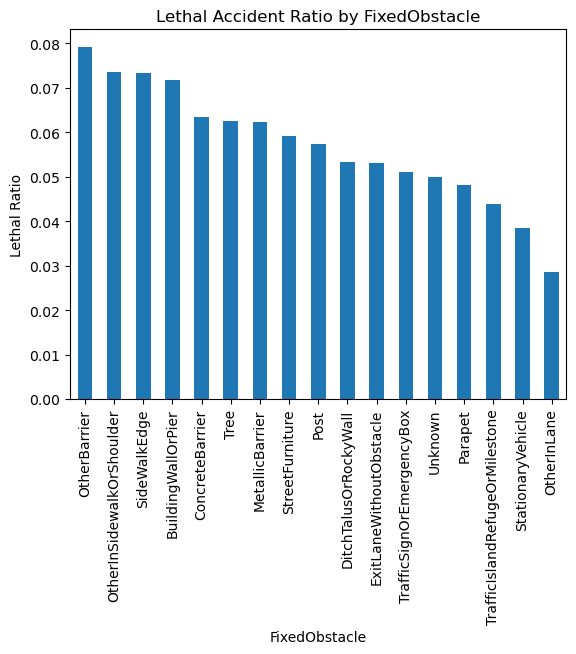

In [167]:
# 시각화
FixedObstacle_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by FixedObstacle")
plt.xlabel("FixedObstacle")
plt.ylabel("Lethal Ratio")
plt.show()

In [168]:
# FixedObstacle 그룹 매핑하기

fixed_map = {
    # Hard
    "OtherBarrier": "ManMade_Hard",
    "OtherInSidewalkOrShoulder": "ManMade_Hard",
    "SideWalkEdge": "ManMade_Hard",
    "BuildingWallOrPier": "ManMade_Hard",

    # Middle
    "ConcreteBarrier": "ManMade_Middle",
    "MetallicBarrier": "ManMade_Middle",
    "StreetFurniture": "ManMade_Middle",
    "Post": "ManMade_Middle",
    "TrafficSignOrEmergencyBox": "ManMade_Middle",

    # Light
    "Parapet": "ManMade_Light",
    "TrafficIslandRefugeOrMilestone": "ManMade_Light",
    "OtherInLane": "ManMade_Light",

    'Tree': 'Nature',
    'DitchTalusOrRockyWall': 'Nature',

    'StationaryVehicle': 'Vehicle',

    'Unknown': 'Other',
    'ExitLaneWithoutObstacle': 'Other'
}

#### Test

In [169]:
vehicles_test["FixedGroup"] = vehicles_test["FixedObstacle"].map(fixed_map)

#### Train

In [170]:
df_vehicles["FixedGroup"] = df_vehicles["FixedObstacle"].map(fixed_map)

### 'MobileObstacle'컬럼 심각도 비율 분석해보기

MobileObstacle 변수는 의미적 분류보다 사고 심각도 분포를 기준으로 재정의하였다.

동물 충돌의 경우에도 야생동물과 가축 간 치명도 차이가 매우 크게 나타나 단일 그룹으로 묶기보다는     
사고 위험 메커니즘이 유사한 객체끼리 재분류하는 것이 더 적절하다고 판단하였다.    

또한 일부 범주의 경우 표본 수가 매우 적어 기존 분류를 그대로 유지할 경우     
과적합 위험이 존재하므로 이를 고려하여 두 개의 그룹으로 분기하였다.   

In [171]:
# MobileObstacle 값 분포 확인하기
df_vehicles["MobileObstacle"].value_counts()

MobileObstacle
Vehicle           62156
Unknown           15642
Pedestrian         9165
Other               898
WildAnimal          601
RailedVehicle        91
DomesticAnimal       77
Name: count, dtype: int64

In [172]:
# MobileObstacle × Gravity 비율 확인

MobileObstacle_gravity_ratio = (
    df_vehicles
    .assign(is_lethal=(df_accidents["Gravity"] == "Lethal").astype(int))
    .groupby("MobileObstacle")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

MobileObstacle_gravity_ratio

,total_accidents,lethal_ratio
MobileObstacle,,
WildAnimal,349,0.054441
Unknown,11419,0.053595
Other,693,0.053391
Vehicle,34281,0.052011
Pedestrian,4979,0.039968
RailedVehicle,70,0.014286
DomesticAnimal,58,0.000000


In [173]:
# MobileObstacle 그룹 매핑하기

mobile_map = {
    'WildAnimal': 'high_risk',
    'Unknown': 'high_risk',
    'Other': 'high_risk',
    'Vehicle': 'high_risk',
    
    'Pedestrian': 'low_risk',
    'RailedVehicle': 'low_risk',
    'DomesticAnimal': 'low_risk'
}

#### Test

In [174]:
vehicles_test["MobileGroup"] = vehicles_test["MobileObstacle"].map(mobile_map)

#### Train

In [175]:
df_vehicles["MobileGroup"] = df_vehicles["MobileObstacle"].map(mobile_map)

### 'ImpactPoint'컬럼 심각도 비율 분석해보기

ImpactPoint 변수는 충돌 위치를 나타내는 정보이지만 세부 위치 간 사고 심각도 비율 차이는 전반적으로 크지 않게 나타났다.    
특히 좌·우 및 전·후 세부 구분은 사고 심각도를 설명하는 데 뚜렷한 차별적 신호를 제공하지 못하였다.    

이에 따라 ImpactPoint는 세부 위치 중심의 분류를 유지하기보다 충돌 방향이라는 사고 구조적 특성을 기준으로 재정의하였다.    
좌·우 구분은 제거하고 전면, 후면, 측면, 복합 충돌로 단순화하여 활용하였다.    

또한 일부 범주의 표본 수가 적어 발생할 수 있는 과적합 위험을 고려하여 방향 단위의 그룹으로 통합하였다.

In [176]:
# ImpactPoint 값 분포 확인하기
df_vehicles["ImpactPoint"].value_counts()

ImpactPoint
Front         31821
LeftFront     13254
RightFront    10891
Back           8930
LeftSide       6367
RightSide      5365
Unknown        4834
LeftBack       3366
RightBack      2563
Multiple       1239
Name: count, dtype: int64

In [177]:
# ImpactPoint × Gravity 비율 확인

ImpactPoint_gravity_ratio = (
    df_vehicles
    .assign(is_lethal=(df_accidents["Gravity"] == "Lethal").astype(int))
    .groupby("ImpactPoint")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

ImpactPoint_gravity_ratio

,total_accidents,lethal_ratio
ImpactPoint,,
LeftSide,3622,0.056875
RightSide,3043,0.055209
RightBack,1235,0.055061
LeftFront,8428,0.053156
RightFront,6263,0.053010
Back,4054,0.050567
Front,19657,0.049143
LeftBack,1693,0.047844
Multiple,894,0.046980


In [178]:
# ImpactPoint 그룹 매핑하기

impact_map = {
    'Front': 'Front',
    'LeftFront': 'Front',
    'RightFront': 'Front',

    'Back': 'Rear',
    'LeftBack': 'Rear',
    'RightBack': 'Rear',

    'LeftSide': 'Side',
    'RightSide': 'Side',

    'Multiple': 'Multi',
    'Unknown': 'Unknown'
}

#### Teat

In [179]:
vehicles_test["ImpactGroup"] = vehicles_test["ImpactPoint"].map(impact_map)

#### Train

In [180]:
df_vehicles["ImpactGroup"] = df_vehicles["ImpactPoint"].map(impact_map)

### 'Maneuver'컬럼 심각도 비율 분석해보기

Maneuver 변수는 사고 발생 당시 차량의 운전 행동을 나타내는 정보로 세부 행동별 사고 심각도 비율은 전반적으로 일관된 패턴을 보이지 않았다.     
특히 일부 범주는 표본 수가 매우 적어 치명도 비율만을 기준으로 위험도를 판단하기에는 한계가 있었다.     

이에 따라 Maneuver는 사고 심각도의 크기보다는 운전 행동의 유형과 사고 상황의 메커니즘을 중심으로 재분류하였다.    
방향 유지, 차로 변경, 가로 횡단, 회전, 추월·급조작, 정차·주차, 이상 행동 등 운전 행위의 성격이 유사한 항목끼리 그룹화하여    
사고 상황을 보조적으로 설명하는 변수로 활용하였다.    

이러한 재분류는 불필요한 세부 범주로 인한 과적합 위험을 줄이면서 사고 발생 맥락에 대한 구조적 정보를 유지하기 위한 목적이다.

In [181]:
# Maneuver 값 분포 확인하기
df_vehicles["Maneuver"].value_counts()

Maneuver
NoDirectionChange        35502
SameDirectionOrLane      10977
TurnToLeft                7294
Unknown                   7144
SwerveToLeft              4178
PassLeft                  3029
Stopped                   2595
Insertion                 2439
CrossLane                 2427
TurnToRight               2357
SwerveToRight             1789
Avoidance                 1552
ChangeToLeftLane          1029
ChangeToRightLane          993
BetweenLanes               973
WrongWay                   910
UTurnInLane                713
Reverse                    551
PassRight                  503
Park                       486
Parked                     369
BusLaneSameDirection       357
OpenDoor                   243
CrossStrip                 128
BusLaneWrongDirection       92
Name: count, dtype: int64

In [182]:
# Maneuver × Gravity 비율 확인

Maneuver_gravity_ratio = (
    df_vehicles
    .assign(is_lethal=(df_accidents["Gravity"] == "Lethal").astype(int))
    .groupby("Maneuver")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

Maneuver_gravity_ratio

,total_accidents,lethal_ratio
Maneuver,,
BusLaneSameDirection,88,0.102273
ChangeToRightLane,210,0.100000
PassRight,184,0.076087
BetweenLanes,102,0.068627
Parked,196,0.066327
Park,273,0.065934
UTurnInLane,359,0.064067
SwerveToLeft,3041,0.057876
Avoidance,784,0.057398


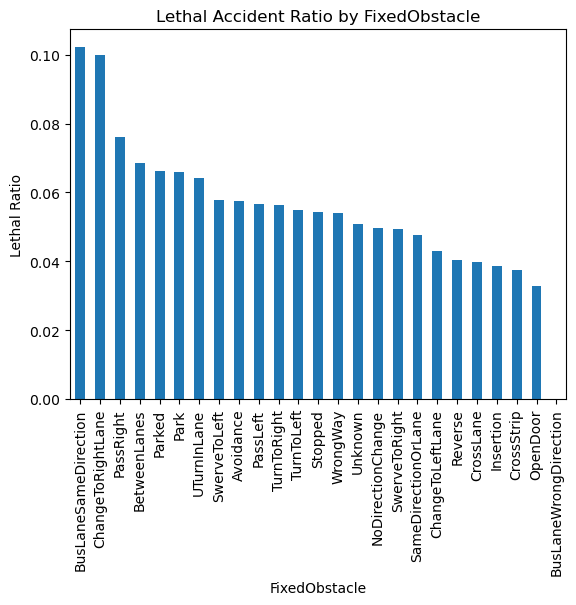

In [183]:
# 시각화
Maneuver_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by FixedObstacle")
plt.xlabel("FixedObstacle")
plt.ylabel("Lethal Ratio")
plt.show()

In [184]:
# Maneuver 그룹 매핑하기

maneuver_map = {
     # 1) Straight
    "NoDirectionChange": "Straight",
    "SameDirectionOrLane": "Straight",

    # 2) LaneChange
    "ChangeToLeftLane": "LaneChange",
    "ChangeToRightLane": "LaneChange",
    "Insertion": "LaneChange",

    # 3) Crossing
    "CrossLane": "Crossing",
    "CrossStrip": "Crossing",

    # 4) Turn
    "TurnToLeft": "Turn",
    "TurnToRight": "Turn",
    "UTurnInLane": "Turn",

    # 5) OvertakeEvasive
    "PassLeft": "OvertakeEvasive",
    "PassRight": "OvertakeEvasive",
    "SwerveToLeft": "OvertakeEvasive",
    "SwerveToRight": "OvertakeEvasive",
    "Avoidance": "OvertakeEvasive",

    # 6) StopPark
    "Stopped": "StopPark",
    "Park": "StopPark",
    "Parked": "StopPark",

    # 7) Abnormal
    "Reverse": "Abnormal",
    "WrongWay": "Abnormal",
    "BusLaneWrongDirection": "Abnormal",
    "BusLaneSameDirection": "Abnormal",
    "OpenDoor": "Abnormal",

    # 8) Unknown
    "Unknown": "Unknown",
}

#### Teat

In [185]:
vehicles_test["ManeuverGroup"] = vehicles_test["Maneuver"].map(maneuver_map)

#### Train

In [186]:
df_vehicles["ManeuverGroup"] = df_vehicles["Maneuver"].map(maneuver_map)

### 최종 Vehicles 집계데이터 생성하기

#### Test

In [187]:
# 그룹화된 라벨들 원-핫 인코딩

fixed_dummies     = pd.get_dummies(vehicles_test["FixedGroup"],     prefix="Fixed")
mobile_dummies    = pd.get_dummies(vehicles_test["MobileGroup"],    prefix="Mobile")
impact_dummies    = pd.get_dummies(vehicles_test["ImpactGroup"],    prefix="Impact")
maneuver_dummies  = pd.get_dummies(vehicles_test["ManeuverGroup"],  prefix="Maneuver")

veh_feat_test = pd.concat(
    [
        vehicles_test[["AccidentId"]],
        fixed_dummies,
        mobile_dummies,
        impact_dummies,
        maneuver_dummies,
    ],
    axis=1
)

In [188]:
# AccidentId 기준으로 집계하기

vehicles_agg_test = (
    veh_feat_test
    .groupby("AccidentId")
    .sum()
    .reset_index()
)

In [189]:
# count 컬럼은 정수형(Int64)으로 변환
count_cols = [c for c in vehicles_agg_test.columns if c != "AccidentId"]
vehicles_agg_test[count_cols] = vehicles_agg_test[count_cols].astype("Int64")

In [190]:
vehicles_agg_test.head()

,AccidentId,Fixed_ManMade_Hard,Fixed_ManMade_Light,Fixed_ManMade_Middle,Fixed_Nature,Fixed_Other,Fixed_Vehicle,Mobile_high_risk,Mobile_low_risk,Impact_Front,...,Impact_Side,Impact_Unknown,Maneuver_Abnormal,Maneuver_Crossing,Maneuver_LaneChange,Maneuver_OvertakeEvasive,Maneuver_StopPark,Maneuver_Straight,Maneuver_Turn,Maneuver_Unknown
0,201800000005,0,0,0,0,2,0,2,0,2,...,0,0,0,0,0,1,1,0,0,0
1,201800000007,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,201800000035,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,201800000041,0,0,0,0,2,0,2,0,2,...,0,0,0,0,0,1,0,1,0,0
4,201800000042,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Train

In [191]:
# 그룹화된 라벨들 원-핫 인코딩

fixed_dummies     = pd.get_dummies(df_vehicles["FixedGroup"],     prefix="Fixed")
mobile_dummies    = pd.get_dummies(df_vehicles["MobileGroup"],    prefix="Mobile")
impact_dummies    = pd.get_dummies(df_vehicles["ImpactGroup"],    prefix="Impact")
maneuver_dummies  = pd.get_dummies(df_vehicles["ManeuverGroup"],  prefix="Maneuver")

veh_feat = pd.concat(
    [
        df_vehicles[["AccidentId"]],
        fixed_dummies,
        mobile_dummies,
        impact_dummies,
        maneuver_dummies,
    ],
    axis=1
)

In [192]:
# AccidentId 기준으로 집계하기

vehicles_agg = (
    veh_feat
    .groupby("AccidentId")
    .sum()
    .reset_index()
)

In [193]:
# count 컬럼은 정수형(Int64)으로 변환
count_cols = [c for c in vehicles_agg.columns if c != "AccidentId"]
vehicles_agg[count_cols] = vehicles_agg[count_cols].astype("Int64")

In [194]:
vehicles_agg.head()

,AccidentId,Fixed_ManMade_Hard,Fixed_ManMade_Light,Fixed_ManMade_Middle,Fixed_Nature,Fixed_Other,Fixed_Vehicle,Mobile_high_risk,Mobile_low_risk,Impact_Front,...,Impact_Side,Impact_Unknown,Maneuver_Abnormal,Maneuver_Crossing,Maneuver_LaneChange,Maneuver_OvertakeEvasive,Maneuver_StopPark,Maneuver_Straight,Maneuver_Turn,Maneuver_Unknown
0,201800000001,0,0,0,0,2,0,2,0,2,...,0,0,0,0,0,0,0,1,1,0
1,201800000002,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,201800000003,0,0,0,0,2,1,3,0,1,...,2,0,0,0,0,0,1,1,1,0
3,201800000004,0,0,0,0,2,0,2,0,1,...,1,0,0,0,0,1,0,0,0,1
4,201800000006,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [195]:
vehicles_agg.columns

Index(['AccidentId', 'Fixed_ManMade_Hard', 'Fixed_ManMade_Light',
       'Fixed_ManMade_Middle', 'Fixed_Nature', 'Fixed_Other', 'Fixed_Vehicle',
       'Mobile_high_risk', 'Mobile_low_risk', 'Impact_Front', 'Impact_Multi',
       'Impact_Rear', 'Impact_Side', 'Impact_Unknown', 'Maneuver_Abnormal',
       'Maneuver_Crossing', 'Maneuver_LaneChange', 'Maneuver_OvertakeEvasive',
       'Maneuver_StopPark', 'Maneuver_Straight', 'Maneuver_Turn',
       'Maneuver_Unknown'],
      dtype='object')

# 6. 테이블 병합하기

## 데이터 구조 확인해보기

* 앞서 집계한 데이터 users_agg, vehicles_agg 와 Accidents, Users 데이터를 AccidentId를 기준으로 병합을 해보겠습니다.
* 우선 4개의 데이터셋이 1:1구조를 가지고 있는지 확인해 보겠습니다.

In [196]:
# AccidentId 기준 1:1 구조인지 확인 함수 만들기

def check_unique(df, name):
    total = len(df)
    unique = df['AccidentId'].nunique()
    dup = total - unique
    
    print(f"\n[{name}]")
    print(f"- 전체 행 수: {total}")
    print(f"- AccidentId 고유값: {unique}")
    print(f"- 중복 AccidentId 개수: {dup}")
    print("=", "1:1 구조입니다." if dup == 0 else "AccidentId 중복 존재")

In [197]:
# Test

datasets_test = [
    (accidents_test, "Accidents"),
    (places_test, "Places"),
    (users_agg_test, "Users_agg"),
    (vehicles_agg_test, "Vehicles_agg")
]

for df, name in datasets_test:
    check_unique(df, name)


[Accidents]
- 전체 행 수: 5779
- AccidentId 고유값: 5779
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.

[Places]
- 전체 행 수: 5779
- AccidentId 고유값: 5779
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.

[Users_agg]
- 전체 행 수: 5779
- AccidentId 고유값: 5779
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.

[Vehicles_agg]
- 전체 행 수: 5779
- AccidentId 고유값: 5779
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.


In [198]:
# Train

datasets = [
    (df_accidents, "Accidents"),
    (df_places, "Places") ,
    (users_agg, "Users_agg"),
    (vehicles_agg, "Vehicles_agg")
]

for df, name in datasets:
    check_unique(df, name)


[Accidents]
- 전체 행 수: 52004
- AccidentId 고유값: 52004
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.

[Places]
- 전체 행 수: 52004
- AccidentId 고유값: 52004
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.

[Users_agg]
- 전체 행 수: 52004
- AccidentId 고유값: 52004
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.

[Vehicles_agg]
- 전체 행 수: 52004
- AccidentId 고유값: 52004
- 중복 AccidentId 개수: 0
=> 1:1 구조입니다.


* 현재 1:1 구조로 안전하게 병합할 수 있다고 판단되어 사고 단위인 AccidentId로 데이터를 병합해 보겠습니다.

## 최종 병합

In [246]:
path = "./data/places_clean.csv"
df_places.to_csv(path, index=False, encoding="utf-8-sig")

print("CSV 저장 완료")
print(path)

CSV 저장 완료
./data/places_clean.csv


### Test

In [199]:
# 1) Accidents + Places
test_final = accidents_test.merge(places_test, on="AccidentId", how="left")

# 2) + Users_agg
test_final = test_final.merge(users_agg_test, on="AccidentId", how="left")

# 3) + Vehicles_agg
test_final = test_final.merge(vehicles_agg_test, on="AccidentId", how="left")

print(test_final.shape)

(5779, 98)


In [200]:
test_final.head(3)

,AccidentId,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,CollisionType,...,Impact_Side,Impact_Unknown,Maneuver_Abnormal,Maneuver_Crossing,Maneuver_LaneChange,Maneuver_OvertakeEvasive,Maneuver_StopPark,Maneuver_Straight,Maneuver_Turn,Maneuver_Unknown
0,201800000005,2018-06-26,16:05:00,Daylight,590,477,Yes,NoIntersection,Normal,2Vehicles-Side,...,0,0,0,0,0,1,1,0,0,0
1,201800000007,2018-09-26,00:40:00,NightStreelightsOn,590,133,Yes,NoIntersection,Normal,Other,...,1,0,0,0,0,0,0,0,0,1
2,201800000035,2018-03-16,21:15:00,NightNoStreetLight,590,581,No,NoIntersection,LightRain,Other,...,0,0,0,0,0,0,0,1,0,0


### Train

In [201]:
# 1) Accidents + Places
df_final = df_accidents.merge(df_places, on="AccidentId", how="left")

# 2) + Users_agg
df_final = df_final.merge(users_agg, on="AccidentId", how="left")

# 3) + Vehicles_agg
df_final = df_final.merge(vehicles_agg, on="AccidentId", how="left")

print(df_final.shape)

(52004, 99)


In [202]:
df_final.head(3)

,AccidentId,Gravity,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,...,Impact_Side,Impact_Unknown,Maneuver_Abnormal,Maneuver_Crossing,Maneuver_LaneChange,Maneuver_OvertakeEvasive,Maneuver_StopPark,Maneuver_Straight,Maneuver_Turn,Maneuver_Unknown
0,201800000001,NonLethal,2018-01-24,15:05:00,Daylight,590,5,No,Y-type,Normal,...,0,0,0,0,0,0,0,1,1,0
1,201800000002,NonLethal,2018-02-12,10:15:00,Daylight,590,11,Yes,Square,VeryGood,...,0,1,0,0,0,0,0,1,0,0
2,201800000003,NonLethal,2018-03-04,11:35:00,Daylight,590,477,Yes,T-type,Normal,...,2,0,0,0,0,0,1,1,1,0


# 7. 병합한 데이터셋 결측치 처리하기

## Train 결측치

* 이번에는 병합한 데이터셋에서 결측치를 처리하겠습니다.
* users_agg, vehicles_agg는 집계 추출을 위해 결측치처리가 되어있고 범주형 데이터는 원-핫 인코딩을 진행했습니다.
* 남아있는 accidents, places의 결측치를 먼저 처리합니다.

In [203]:
# Train 결측치 행 조회하기
df_final.isna().sum()[df_final.isna().sum() > 0]

Gravity                4182
Hour                    202
Weather                   5
CollisionType             2
PostalAddress           497
GPSCode                  45
Latitude               1621
Longitude              1621
RoadNumber            25414
RoadSecNumber         51855
RoadLetter            49568
Circulation             366
LaneNumber              456
SpecialLane             467
Slope                   398
RoadMarkerId          14200
RoadMarkerDistance    14438
Layout                 4563
StripWidth            40021
LaneWidth             39651
SurfaceCondition       4757
Infrastructure         4606
Localization            447
SchoolNear              412
Driver_age_mean        1299
Driver_age_min         1299
Driver_age_max         1299
dtype: int64

In [204]:
# 타입 조회하기
df_final.dtypes[df_final.isna().sum() > 0]

Gravity                object
Hour                   object
Weather                object
CollisionType          object
PostalAddress          object
GPSCode                object
Latitude              float64
Longitude             float64
RoadNumber            float64
RoadSecNumber         float64
RoadLetter             object
Circulation            object
LaneNumber            float64
SpecialLane            object
Slope                  object
RoadMarkerId          float64
RoadMarkerDistance    float64
Layout                 object
StripWidth            float64
LaneWidth             float64
SurfaceCondition       object
Infrastructure         object
Localization           object
SchoolNear            float64
Driver_age_mean       float64
Driver_age_min        float64
Driver_age_max        float64
dtype: object

In [205]:
#df_train으로 copy()하여 데이터보존
df_train = df_final.copy()

### Gracity 결측치 삭제하기

In [206]:
# Gracity는 교통사고 심각도를 나태내는 피쳐로 없으면 안되는 레이블입니다.
# Gravity가 'NaN'인경우 삭제처리 하겠습니다.
# Gravity 결측치 제거

df_train = df_train[df_train["Gravity"].notna()]

In [207]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Hour                    181
Weather                   5
CollisionType             1
PostalAddress           455
GPSCode                  42
Latitude               1507
Longitude              1507
RoadNumber            23395
RoadSecNumber         47685
RoadLetter            45586
Circulation             340
LaneNumber              419
SpecialLane             431
Slope                   368
RoadMarkerId          13067
RoadMarkerDistance    13285
Layout                 4199
StripWidth            36766
LaneWidth             36422
SurfaceCondition       4401
Infrastructure         4245
Localization            413
SchoolNear              379
Driver_age_mean        1182
Driver_age_min         1182
Driver_age_max         1182
dtype: int64

### 범주형 컬럼 결측치 처리 (Unknown 대체)

사고 데이터의 범주형 컬럼 중 일부는 값이 없는 경우가 실제 오류라기보다  
사고 당시 해당 정보가 기록되지 않은 경우로 해석하는 것이 더 자연스럽다.  
이러한 경우 결측치를 제거하기보다는 `"Unknown"`이라는 하나의 범주로 명시적으로 표현하였다.

이를 통해 모델이  
- 특정 사고 정보가 존재하지 않았다는 사실 자체를 학습할 수 있고  
- 범주형 변수의 결측으로 인해 데이터가 제거되거나 왜곡되는 것을 방지할 수 있다.

#### Hour 컬럼을 제외한 이유
`Hour` 컬럼은 데이터 타입은 범주형(object)으로 되어 있지만,  
의미적으로는 사고 발생 시각(0~23시)을 나타내는 **시간 변수**이다.  
시간 변수는 순서와 간격의 의미를 가지므로 단순 범주형처럼 `"Unknown"`으로 처리할 경우  
시간 정보의 구조가 손상될 수 있다.

따라서 `Hour`는 범주형 결측치 처리에서 제외하고,  
수치형 변수로 변환한 뒤 결측 플래그를 생성하여 별도로 처리하는 것이 더 적절하다고 판단하였다.


In [208]:
# 범주형 컬럼중 'NaN'을 Unknown으로 변경하기 (Hour 제외)

unknown_cols = [
    "Weather",
    "CollisionType",
    "Circulation",
    "SpecialLane",
    "Slope",
    "Layout",
    "SurfaceCondition",
    "Infrastructure",
    "Localization"
]

df_train[unknown_cols] = df_train[unknown_cols].fillna("Unknown")

In [209]:
# 결과 확인
df_train[unknown_cols].isna().sum()

Weather             0
CollisionType       0
Circulation         0
SpecialLane         0
Slope               0
Layout              0
SurfaceCondition    0
Infrastructure      0
Localization        0
dtype: int64

### Hour 컬럼 결측치 처리

Hour 컬럼은 문자열 형태의 시간 값(HH:MM:SS)으로 저장되어 있었으며,  
사고 발생 시각을 의미하는 시간 변수이다.  
모델링 및 분석을 위해 문자열 그대로 사용하는 대신  
datetime으로 변환한 뒤 시(hour, 0~23) 정보만 추출하여 수치형 변수로 재구성하였다.

결측값은 시간 미기록 상태를 의미하므로  
결측 여부를 나타내는 플래그 컬럼(Hour_missing)을 생성하고,  
Hour 값은 -1로 대체하여 명시적으로 처리하였다.

In [210]:
# 문자열 시간을 datetime으로 변환
df_train["Hour"] = pd.to_datetime(
    df_train["Hour"],
    format="%H:%M:%S",
    errors="coerce"
)

# 시(hour)만 추출
df_train["Hour"] = df_train["Hour"].dt.hour

In [211]:
# 결측 여부 플래그 생성
df_train["Hour_missing"] = df_train["Hour"].isna().astype(int)

# 결측값은 -1로 대체
df_train["Hour"] = df_train["Hour"].fillna(-1).astype(int)

In [212]:
# 처리확인하기
df_train[["Hour", "Hour_missing"]].isna().sum()

Hour            0
Hour_missing    0
dtype: int64

In [213]:
df_train["Hour"].value_counts().head(10)

Hour
17    4065
18    3961
16    3424
19    3059
15    2925
8     2837
14    2629
12    2617
11    2462
9     2456
Name: count, dtype: int64

### SchoolNear 컬럼 결측치 처리


`SchoolNear` 컬럼은 학교 인근 여부를 나타내는 코드형 변수로 연속적인 수치가 아닌 범주형 값으로 해석하는 것이 적절하다.

각 값의 의미는 다음과 같다.

- 0 : 학교 인근 아님 (No)
- 3 : 학교 인근 (Yes)
- 99 : 정보 미상 (Unknown)
- NaN : 기록 누락 → Unknown으로 해석

따라서 결측값(NaN)은 기존의 미상 코드(99)와 동일한 의미로 판단하여  `Unknown` 범주로 통합하였다.  
이러한 처리를 통해 값의 의미 왜곡을 방지하고 모델과 EDA 단계에서 해석 가능한 범주형 변수로 유지하고자 하였다.

In [214]:
# NaN을 99로 변경하기
df_train["SchoolNear"] = df_train["SchoolNear"].fillna(99)

In [215]:
# 범주형으로 변환하기
school_map = {
    0: "No",
    3: "Yes",
    99: "Unknown"
}

df_train["SchoolNear"] = df_train["SchoolNear"].map(school_map)

### 수치형 컬럼 결측치 처리

수치형 컬럼의 결측치는 단순히 평균이나 중앙값으로 대체하지 않고 결측 여부 자체를     
하나의 정보로 활용하기 위해 결측 플래그 컬럼을 추가하고 원본 값은 -1로 대체하였다.

이 방식은
- 결측 발생 여부를 모델이 학습할 수 있게 하고
- 이후 EDA 및 모델링 단계에서 결측 패턴을 분석할 수 있으며
- 수치형 변수의 타입 안정성을 유지할 수 있다는 장점이 있다.

운전자 나이 관련 컬럼은 결측 자체가 의미를 가지므로 모델링 직전까지 통계적 대체를 수행하지 않았다.
    
공통 원칙
- 결측 플래그 생성 (*_missing)
- 값은 의미 없는 센티널 값으로 대체 (-1 권장)
- 드롭 판단은 아직 안 함 → EDA에서 결정

In [216]:
# 위치 좌표 (Latitude / Longitude)

for col in ["Latitude", "Longitude"]:
    df_train[f"{col}_missing"] = df_train[col].isna().astype(int)
    df_train[col] = df_train[col].fillna(-1)

In [217]:
# 도로·시설 관련 수치형
road_numeric_cols = [
    "RoadNumber",
    "RoadSecNumber",
    "LaneNumber",
    "RoadMarkerId",
    "RoadMarkerDistance",
    "StripWidth",
    "LaneWidth"
]

# 특정 사고에서만 기록되며 결측인 경우 없음 / 미기록의미

for col in road_numeric_cols:
    df_train[f"{col}_missing"] = df_train[col].isna().astype(int)
    df_train[col] = df_train[col].fillna(-1)

In [218]:
# 운전자 나이 통계 - 결측치 다른 값으로 대치 x , 결측자체의 의미 살리기

driver_age_cols = [
    "Driver_age_mean",
    "Driver_age_min",
    "Driver_age_max"
]

for col in driver_age_cols:
    df_train[f"{col}_missing"] = df_train[col].isna().astype(int)
    df_train[col] = df_train[col].fillna(-1)

In [219]:
# 결측치 확인하기
df_train.isna().sum()[df_train.isna().sum() > 0]

PostalAddress      455
GPSCode             42
RoadLetter       45586
dtype: int64

### 주소 및 코드성 컬럼 삭제

`PostalAddress`, `GPSCode`, `RoadLetter` 컬럼은 사고 위치를 설명하는 보조 정보이지만,  
자유 텍스트이거나 코드성 값으로 구성되어 있어 사고 심각도 예측 모델에 직접적으로 활용하기 어렵다고 판단하였다.

특히 `RoadLetter`는 대부분의 값이 결측으로 존재하여 정보 밀도가 매우 낮았으며 `GPSCode`는 위도·경도 정보와 중복되는 성격을 가진다.    
이에 따라 해당 컬럼들은 모델 성능 및 해석 측면에서의 기여도가 낮다고 판단하여 EDA 이전 단계에서 제거하였다.


In [220]:
# drop할 컬럼 리스트
drop_cols = ["PostalAddress", "GPSCode", "RoadLetter"]

# 컬럼 제거
df_train = df_train.drop(columns=drop_cols)

In [221]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Series([], dtype: int64)

## Test 결측치

In [222]:
# Test 결측치 행 조회하기
test_final.isna().sum()[test_final.isna().sum() > 0]

PostalAddress           58
GPSCode                  5
Latitude               202
Longitude              202
RoadNumber            2230
RoadSecNumber         5761
RoadLetter            5514
Circulation             39
LaneNumber              51
SpecialLane             58
Slope                   41
RoadMarkerId          1575
RoadMarkerDistance    1610
Layout                  38
StripWidth            4469
LaneWidth             4423
SurfaceCondition        44
Infrastructure          49
Localization            47
SchoolNear              47
Driver_age_mean        101
Driver_age_min         101
Driver_age_max         101
dtype: int64

In [223]:
#df_test으로 copy()하여 데이터보존
df_test = test_final.copy()

### Hour 처리

In [224]:
# Train과 맞추기 위해 문자열 시간을 datetime으로 변환
df_test["Hour"] = pd.to_datetime(df_test["Hour"],
                                  format="%H:%M:%S",
                                  errors="coerce")

# 시(hour)만 추출
df_test["Hour"] = df_test["Hour"].dt.hour

In [225]:
# 정수형으로 변환
df_test["Hour"] = df_test["Hour"].astype(int)

In [226]:
# 결과 확
df_test["Hour"].value_counts()

Hour
17    554
18    500
16    413
8     358
19    355
15    343
14    312
12    295
13    293
9     291
11    264
10    255
20    253
7     249
21    193
22    158
23    138
6     106
1      96
0      93
5      85
2      64
3      58
4      53
Name: count, dtype: int64

### 범주형 컬럼 결측치 처리

Train 데이터 셋과 동일하게 처리하도록 하겠습니다.

In [227]:
# 범주형 컬럼중 'NaN'을 Unknown으로 변경

unknown_cols_test = [
    "Circulation",
    "SpecialLane",
    "Slope",
    "Layout",
    "SurfaceCondition",
    "Infrastructure",
    "Localization"
]

df_test[unknown_cols_test] = df_test[unknown_cols_test].fillna("Unknown")

In [228]:
# 결과 확인
df_test[unknown_cols_test].isna().sum()

Circulation         0
SpecialLane         0
Slope               0
Layout              0
SurfaceCondition    0
Infrastructure      0
Localization        0
dtype: int64

### SchoolNear 컬럼 결측치 처리

In [229]:
df_test['SchoolNear'].unique()

array([ 0., 99., nan,  3.])

In [230]:
# NaN을 99로 변경하기
df_test["SchoolNear"] = df_test["SchoolNear"].fillna(99)

In [231]:
# 범주형으로 변환하기
school_map = {
    0: "No",
    3: "Yes",
    99: "Unknown"
}

df_test["SchoolNear"] = df_test["SchoolNear"].map(school_map)

In [232]:
# 결과 확인
df_test["SchoolNear"].isna().sum()

np.int64(0)

### 수치형 컬럼 결측치 처리

In [233]:
# 위치 좌표 (Latitude / Longitude)

for col in ["Latitude", "Longitude"]:
    df_test[f"{col}_missing"] = df_test[col].isna().astype(int)
    df_test[col] = df_test[col].fillna(-1)

In [234]:
# 도로·시설 관련 수치형
road_numeric_cols_test = [
    "RoadNumber",
    "RoadSecNumber",
    "LaneNumber",
    "RoadMarkerId",
    "RoadMarkerDistance",
    "StripWidth",
    "LaneWidth"
]

# 특정 사고에서만 기록되며 결측인 경우 없음 / 미기록의미

for col in road_numeric_cols_test:
    df_test[f"{col}_missing"] = df_test[col].isna().astype(int)
    df_test[col] = df_test[col].fillna(-1)

In [235]:
# 운전자 나이 통계 - 결측치 다른 값으로 대치 x , 결측자체의 의미 살리기

driver_age_cols_test = [
    "Driver_age_mean",
    "Driver_age_min",
    "Driver_age_max"
]

for col in driver_age_cols_test:
    df_test[f"{col}_missing"] = df_test[col].isna().astype(int)
    df_test[col] = df_test[col].fillna(-1)

In [236]:
# 결측치 확인하기
df_test.isna().sum()[df_test.isna().sum() > 0]

PostalAddress      58
GPSCode             5
RoadLetter       5514
dtype: int64

### 주소 및 코드성 컬럼 삭제

In [237]:
# drop할 컬럼 리스트
drop_cols_test = ["PostalAddress", "GPSCode", "RoadLetter"]

# 컬럼 제거
df_test = df_test.drop(columns=drop_cols_test)

In [238]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Series([], dtype: int64)

In [239]:
# 저장 경로 (원하는 폴더로 수정 가능)
train_path = "./data/df_train.csv"
test_path  = "./data/df_test.csv"

# CSV 저장
df_train.to_csv(train_path, index=False, encoding="utf-8-sig")
df_test.to_csv(test_path, index=False, encoding="utf-8-sig")

print("저장 완료")
print("train:", train_path)
print("test :", test_path)

저장 완료
train: ./data/df_train.csv
test : ./data/df_test.csv


# 8. EDA

## Gravity 분포 확인하기

EDA의 첫 단계로 사고 심각도(Gravity)의 분포를 확인하였다.  
전체 사고 중 비치명 사고(NonLethal)가 약 94%를 차지하고,  
치명 사고(Lethal)는 약 6% 수준으로 나타나  
타깃 클래스 간 불균형이 존재함을 확인하였다.

이는 단순 정확도(Accuracy) 기준의 평가가 적절하지 않음을 의미하며,  
이후 모델링 단계에서는 치명 사고에 대한 재현율(Recall)과  
불균형을 고려한 평가 지표를 중심으로 분석을 진행할 필요가 있다.

In [634]:
# 클래스 갯수 및 불균형 확인하기
df_train["Gravity"].value_counts().sort_index()

Gravity
Lethal        2661
NonLethal    45161
Name: count, dtype: int64

In [635]:
# 클래스 비율 확인하기
df_train["Gravity"].value_counts(normalize=True).sort_index()

Gravity
Lethal       0.055644
NonLethal    0.944356
Name: proportion, dtype: float64

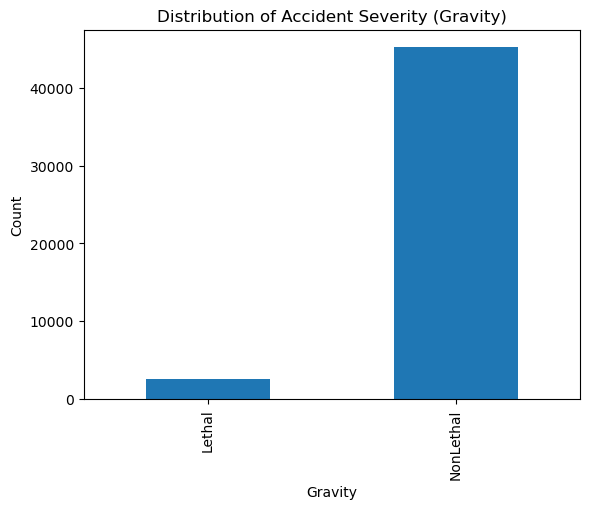

In [636]:
# 시각화로 비율 확인
df_train["Gravity"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Accident Severity (Gravity)")
plt.xlabel("Gravity")
plt.ylabel("Count")
plt.show()

본 프로젝트에서는 초기 단계에서 피처를 임의로 제거하지 않고 EDA 및 모델 기반 분석을 통해    
실제로 사고 심각도 예측에 기여하는 변수만을 선별하는 전략을 사용하였다.

## Gravity 와 Hour 관계 분석

사고 발생 시각(Hour)에 따른 사고 심각도를 분석한 결과,    
사고 발생 빈도와 사고의 치명도는 서로 다른 패턴을 보였다.    
출퇴근 시간대에는 사고 발생 건수는 많지만 치명 사고 비율은 낮았으며,    
반대로 새벽 및 야간 시간대에는 사고 건수는 적지만    
치명 사고 비율이 현저히 높게 나타났다.    
    
이는 Hour 변수가 사고 발생 빈도보다    
사고 발생 시 위험도를 설명하는 데 더 유의미한 변수임을 시사하며,    
사고 심각도 예측 모델에서 중요한 피처가 될 가능성이 높다고 판단된다.

In [637]:
# 시간대별 사고 건수 확인하기
df_train.groupby("Hour")["Gravity"].count()

Hour
-1      181
 0      666
 1      716
 2      528
 3      528
 4      473
 5      730
 6     1033
 7     2056
 8     2837
 9     2456
 10    2159
 11    2462
 12    2617
 13    2353
 14    2629
 15    2925
 16    3424
 17    4065
 18    3961
 19    3059
 20    2160
 21    1549
 22    1216
 23    1039
Name: Gravity, dtype: int64

In [638]:
# 시간대별 치명 사고 비율
hour_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Hour")["is_lethal"]
    .mean()
)

hour_gravity_ratio

Hour
-1     0.055249
 0     0.091592
 1     0.083799
 2     0.107955
 3     0.094697
 4     0.126850
 5     0.109589
 6     0.095837
 7     0.056907
 8     0.035601
 9     0.047638
 10    0.051876
 11    0.049959
 12    0.046618
 13    0.048874
 14    0.051731
 15    0.058462
 16    0.051402
 17    0.046494
 18    0.045191
 19    0.051978
 20    0.062500
 21    0.045836
 22    0.070724
 23    0.072185
Name: is_lethal, dtype: float64

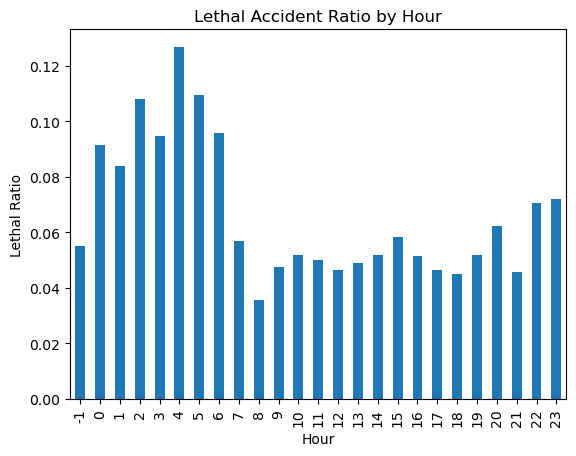

In [639]:
# 시각화
hour_gravity_ratio.plot(kind="bar")
plt.title("Lethal Accident Ratio by Hour")
plt.xlabel("Hour")
plt.ylabel("Lethal Ratio")
plt.show()

### Hour_missing
Hour_missing 변수는 시간 미기록 여부를 나타내는 보조 변수로,    
단변량 분석 결과 사고 심각도 분포에서    
기록된 시간과 유의미한 차이를 보이지 않았다.    

다만 다른 변수와의 상호작용 가능성을 고려하여    
초기 모델링 단계까지는 유지하고,    
모델 기반 중요도 분석 결과를 바탕으로    
최종 포함 여부를 결정하고자 한다.

In [640]:
# Hour_missing 
df_train.groupby("Hour_missing")["Gravity"].value_counts(normalize=True)

Hour_missing  Gravity  
0             NonLethal    0.944355
              Lethal       0.055645
1             NonLethal    0.944751
              Lethal       0.055249
Name: proportion, dtype: float64

## Gravity 와 Weather의 관계 분석

날씨(Weather)에 따른 사고 심각도를 분석한 결과,    
날씨 조건에 따라 치명 사고 비율에 유의미한 차이가 나타났다.    
특히 안개, 연기, 강풍과 같은 시야 저하 및 환경 불안정 조건에서는    
사고 발생 빈도는 낮지만 사고 발생 시 치명도가 높게 나타나는 경향을 확인하였다.    
    
반면, 맑음(Normal) 및 약한 비(LightRain) 조건에서는    
사고 발생 건수는 많으나 치명 사고 비율은 상대적으로 낮았다.    
이는 사고 빈도와 사고 심각도가 서로 다른 패턴을 가질 수 있음을 시사한다.

In [641]:
# Weather 값 분포 확인하기
df_train["Weather"].value_counts()

Weather
Normal               37931
LightRain             5276
Overcast              1666
HeavyRain             1076
VeryGood               859
FogOrSmoke             362
SnowOrHail             314
Other                  239
StrongWindOrStorm       94
Unknown                  5
Name: count, dtype: int64

In [642]:
# Weather × Gravity 비율 확인

weather_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Weather")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

weather_gravity_ratio

,total_accidents,lethal_ratio
Weather,,
Unknown,5,0.400000
FogOrSmoke,362,0.132597
Other,239,0.108787
StrongWindOrStorm,94,0.085106
VeryGood,859,0.081490
HeavyRain,1076,0.070632
Overcast,1666,0.067227
SnowOrHail,314,0.057325
Normal,37931,0.054678


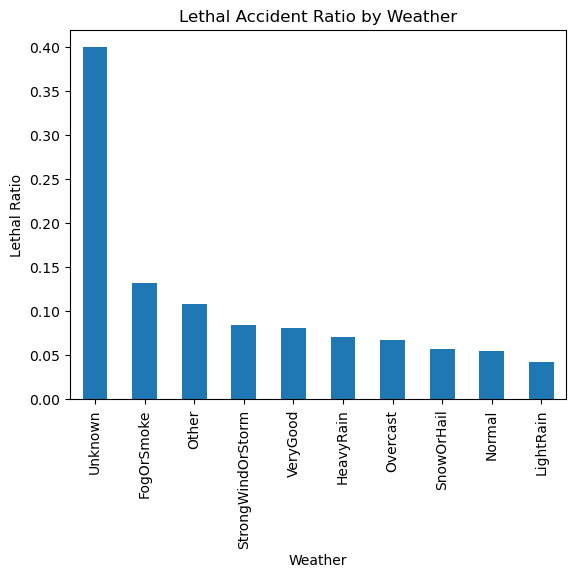

In [643]:
# 시각화
weather_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by Weather")
plt.xlabel("Weather")
plt.ylabel("Lethal Ratio")
plt.show()

## Hour × Weather × Gravity 의 관계 분석하기

사고 발생 시각과 날씨 조건을 결합하여 사고 심각도를 분석한 결과,    
두 변수 간의 상호작용 효과가 뚜렷하게 나타났다.    
특히 새벽 시간대(LateNight)에 악천후가 동반된 경우,    
치명 사고 비율이 가장 높게 나타났으며,    
이는 시간대와 날씨가 동시에 작용할 때    
사고의 위험도가 크게 증가할 수 있음을 시사한다.    
    
반면 주간 시간대에서는 악천후 조건에서도    
상대적으로 치명 사고 비율이 낮아지는 경향을 보였으며,    
사고 발생 빈도와 사고 심각도가 서로 다른 패턴을 가질 수 있음을    
다시 한 번 확인할 수 있었다.    
    
Unknown의 경우 의미가 없는 정보이기 때문에 별도 해석은 하지 않았다.

In [644]:
# 시간대별 날씨의 영향에 따라 관계가 있는지 분석하기 위해 시간과 날씨를 구간화 하기

# 시간대 구간화 하기
def hour_group(h):
    if h == -1:
        return "Unknown"
    elif 0 <= h <= 5:
        return "LateNight"
    elif 6 <= h <= 17:
        return "Daytime"
    else:
        return "Night"

df_train["HourGroup"] = df_train["Hour"].apply(hour_group)

In [645]:
# 날씨 위험/비위험 으로 그룹화 하기
danger_weather = [
    "FogOrSmoke",
    "StrongWindOrStorm",
    "HeavyRain",
    "SnowOrHail"
]

df_train["WeatherGroup"] = df_train["Weather"].apply(lambda x: "Adverse" if x in danger_weather else "Normal")

In [646]:
# Hour × Weather × 치명 비율 확인

hour_weather_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby(["HourGroup", "WeatherGroup"])["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

hour_weather_gravity

total_accidents  lethal_ratio
HourGroup WeatherGroup                               
Unknown   Adverse                    10      0.200000
LateNight Adverse                   209      0.114833
          Normal                   3432      0.100233
Night     Adverse                   482      0.080913
Daytime   Adverse                  1145      0.074236
Night     Normal                  12502      0.053271
Daytime   Normal                  29871      0.049982
Unknown   Normal                    171      0.046784

### 파생 변수 만들기

위 결과에 따라 사고 발생 시각과 날씨 조건 간의 상호작용이    
사고 심각도에 영향을 미치는 패턴을 확인하였다.    
이에 따라 HourGroup과 WeatherGroup을 기반으로 한    
결합 파생 변수를 생성하였으며,    
해당 변수의 유효성은 모델 학습 및 feature importance 분석을 통해    
최종적으로 판단하고자 한다.    
    
EDA 단계에서 생성된 파생 변수들은    
모델 기반 검증 이전까지 유지하되,    
중복 정보 여부를 고려하여 최종 모델에서 정리할 예정이다.

In [647]:
# 파생 변수 생성

df_train["HourWeatherGroup"] = (df_train["HourGroup"] + "_" + df_train["WeatherGroup"])

## CollisionType과 Gravity 관계 분석

충돌 유형(CollisionType)에 따른 사고 심각도를 분석한 결과,    
충돌 형태에 따라 치명 사고 비율에 뚜렷한 차이가 나타났다.    
특히 정면 충돌 성격을 포함한 사고와    
다중 차량이 복합적으로 충돌한 경우,    
치명 사고 비율이 상대적으로 높게 나타났다.    
    
반면 측면 충돌이나 후방 추돌 사고는    
사고 발생 빈도는 높으나 치명 사고 비율은 낮은 경향을 보였다.    
이는 사고의 형태가 사고 심각도를 설명하는    
중요한 요인임을 시사한다.

In [648]:
# CollisionType 분포 확인
df_train["CollisionType"].value_counts()

CollisionType
Other                               16159
2Vehicles-Side                      13464
2Vehicles-Behind                     6139
NoCollision                          4335
2Vehicles-BehindVehicles-Frontal     4275
3+Vehicles-Chain                     1880
3+Vehicles-Multiple                  1569
Unknown                                 1
Name: count, dtype: int64

In [649]:
# CollisionType × Gravity 비율
collision_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("CollisionType")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

collision_gravity_ratio

,total_accidents,lethal_ratio
CollisionType,,
Unknown,1,1.000000
2Vehicles-BehindVehicles-Frontal,4275,0.117427
3+Vehicles-Multiple,1569,0.089866
Other,16159,0.071972
NoCollision,4335,0.066897
2Vehicles-Side,13464,0.027481
2Vehicles-Behind,6139,0.024597
3+Vehicles-Chain,1880,0.022872


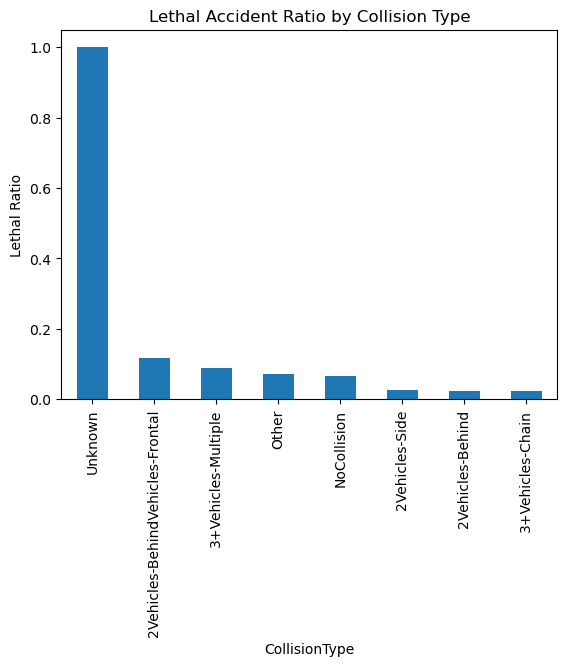

In [650]:
# 시각화
collision_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by Collision Type")
plt.xlabel("CollisionType")
plt.ylabel("Lethal Ratio")
plt.show()

### CollisionType 파생변수 만들기

앞선 EDA 결과를 바탕으로 충돌 유형(CollisionType)을    
사고 심각도 관점에서 HighRisk, MediumRisk, LowRisk의    
세 가지 그룹으로 구분한 파생변수를 생성하였다.    
    
CollisionType은 범주 수가 많고 세분화되어 있어    
개별 범주를 그대로 사용할 경우 해석 및 모델링 복잡도가 증가할 수 있다.    
이에 따라 각 충돌 유형의 치명 사고 비율을 기준으로    
유사한 위험도를 보이는 유형들을 하나의 그룹으로 묶어    
정보를 압축하고 해석 가능성을 높이고자 하였다.    
    
해당 파생변수는 CollisionType 원본 변수와 함께 유지하되,    
모델 학습 이후 feature importance 분석 결과를 바탕으로    
최종적으로 사용할 변수를 결정할 예정이다.    

In [651]:
# CollisionType 위험도 그룹화
def collision_group(x):
    if x in ["2Vehicles-BehindVehicles-Frontal", "3+Vehicles-Multiple"]:
        return "HighRisk"
    elif x in ["Other", "NoCollision"]:
        return "MediumRisk"
    else:
        return "LowRisk"

df_train["CollisionGroup"] = df_train["CollisionType"].apply(collision_group)

In [652]:
df_train.head(3)

,AccidentId,Gravity,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,...,RoadMarkerDistance_missing,StripWidth_missing,LaneWidth_missing,Driver_age_mean_missing,Driver_age_min_missing,Driver_age_max_missing,HourGroup,WeatherGroup,HourWeatherGroup,CollisionGroup
0,201800000001,NonLethal,2018-01-24,15,Daylight,590,5,No,Y-type,Normal,...,1,1,1,0,0,0,Daytime,Normal,Daytime_Normal,HighRisk
1,201800000002,NonLethal,2018-02-12,10,Daylight,590,11,Yes,Square,VeryGood,...,1,1,1,0,0,0,Daytime,Normal,Daytime_Normal,MediumRisk
2,201800000003,NonLethal,2018-03-04,11,Daylight,590,477,Yes,T-type,Normal,...,1,1,1,0,0,0,Daytime,Normal,Daytime_Normal,MediumRisk


## 사고 발생 장소(Places)의 공간적 특성과 사고 심각도 분석

### InAgglomeration × Gravity

도심(InAgglomeration) 여부에 따른 사고 심각도를 분석한 결과    
사고 발생 건수는 도심 지역에서 더 많았으나    
치명 사고 비율은 비도심 지역에서 현저히 높게 나타났다.    
    
이는 비도심 지역의 높은 주행 속도와    
상대적으로 열악한 도로 환경이    
사고 발생 시 치명도를 증가시킬 수 있음을 시사하며,    
InAgglomeration 변수가 사고 심각도 예측에    
중요한 공간적 요인임을 보여준다.

In [653]:
# 값 분포 확인하기
df_train["InAgglomeration"].value_counts()

InAgglomeration
Yes    30670
No     17152
Name: count, dtype: int64

In [654]:
# InAgglomeration × Gravity 비율
agglo_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("InAgglomeration")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

agglo_gravity_ratio

,total_accidents,lethal_ratio
InAgglomeration,,
No,17152,0.106868
Yes,30670,0.026997


### IntersectionType × Gravity

교차로 유형(IntersectionType)에 따른 사고 심각도를 분석한 결과     
교차로가 없는 구간(NoIntersection)에서 치명 사고 비율이 가장 높게 나타났다.     
이는 해당 구간에서 차량 주행 속도가 높고 충돌 시 충격 완화 요인이 적기 때문으로 해석할 수 있다.     
     
반면 X형 교차로, 회전 교차로(Roundabout) 등 교차 구조가 명확한 구간에서는     
사고 발생 빈도는 높으나 치명 사고 비율은 상대적으로 낮았다.     
이러한 결과는 사고 발생 위치의 구조적 특성이     
사고 심각도에 중요한 영향을 미친다는 점을 시사한다.     

In [655]:
# 값 분포 확인하기
df_train["IntersectionType"].value_counts()

IntersectionType
NoIntersection       31687
X-type                5829
T-type                4830
Other                 1876
Roundabout            1733
Y-type                 993
Square                 593
MoreThan4Branches      224
LevelCrossing           57
Name: count, dtype: int64

In [656]:
# IntersectionType × Gravity 비율

intersection_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("IntersectionType")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

intersection_gravity_ratio

,total_accidents,lethal_ratio
IntersectionType,,
LevelCrossing,57,0.192982
NoIntersection,31687,0.066273
Other,1876,0.041578
T-type,4830,0.036439
Y-type,993,0.036254
MoreThan4Branches,224,0.035714
X-type,5829,0.032424
Roundabout,1733,0.032314
Square,593,0.011804


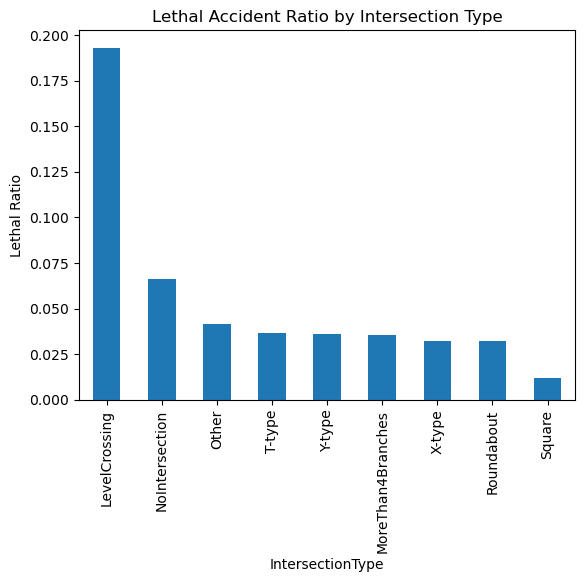

In [657]:
# 시각화
intersection_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by Intersection Type")
plt.xlabel("IntersectionType")
plt.ylabel("Lethal Ratio")
plt.show()

### IntersectionType 파생변수 정리

앞선 EDA 결과를 통해 교차로 유형(IntersectionType)에 따라    
사고 심각도에 뚜렷한 차이가 존재함을 확인하였다.        
다만 IntersectionType은 범주 수가 많고 구조가 세분화되어 있어,    
모든 범주를 그대로 사용할 경우 모델 복잡도와 해석 난이도가 증가할 수 있다.    
    
이에 따라 치명 사고 비율(lethal_ratio)을 기준으로    
교차로 유형을 HighRisk, MediumRisk, LowRisk의    
세 가지 위험도로 재분류하여 파생변수를 생성하였다.    
이를 통해 장소 특성에 대한 정보를 유지하면서도    
변수 개수를 줄이고 모델의 일반화 성능을 향상시키고자 한다.

In [658]:
# IntersectionType 위험도 그룹화
def intersection_group(x):
    if x in ["NoIntersection", "LevelCrossing"]:
        return "HighRisk"
    elif x in ["Other", "T-type", "Y-type", "MoreThan4Branches"]:
        return "MediumRisk"
    else:
        return "LowRisk"

df_train["IntersectionGroup"] = df_train["IntersectionType"].apply(intersection_group)

### RoadType × Gravity

도로 유형(RoadType)에 따른 사고 심각도를 분석한 결과,    
도로의 성격에 따라 치명 사고 비율에 뚜렷한 차이가 나타났다.    
특히 지방도로(Departamental)와 국도(National)에서는    
사고 발생 빈도 대비 치명 사고 비율이 높게 나타난 반면,    
도심 생활도로(Communal)에서는 사고 발생 건수는 많지만    
치명 사고 비율은 현저히 낮았다.    
    
이는 도로 유형이 주행 속도와 도로 설계 특성을 통해    
사고 발생 시 충돌 강도에 영향을 미치는    
중요한 장소 요인임을 시사한다.

In [659]:
# 값 분포 확인하기
df_train["RoadType"].value_counts()

RoadType
Communal         22122
Departamental    16645
Highway           4592
National          3199
Other              522
PublicParking      337
Unknown            331
Private             74
Name: count, dtype: int64

In [660]:
# RoadType × Gravity 비율 확인하기

roadtype_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("RoadType")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

roadtype_gravity_ratio

,total_accidents,lethal_ratio
RoadType,,
Departamental,16645,0.100451
National,3199,0.067521
Highway,4592,0.044861
PublicParking,337,0.044510
Private,74,0.040541
Other,522,0.040230
Unknown,331,0.039275
Communal,22122,0.023280


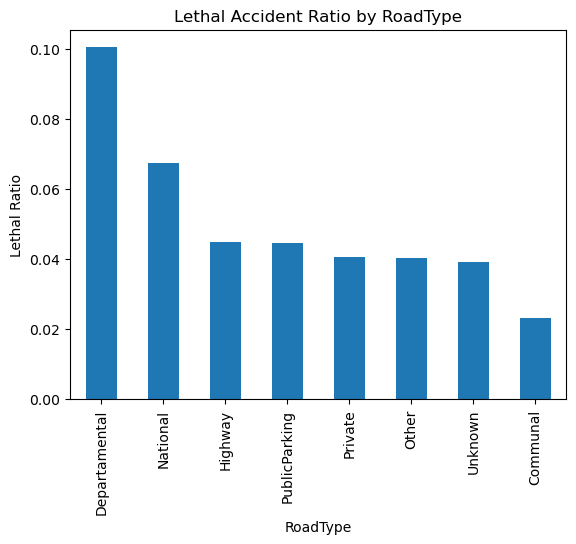

In [661]:
# 시각화
roadtype_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by RoadType")
plt.xlabel("RoadType")
plt.ylabel("Lethal Ratio")
plt.show()

RoadType은 범주 수가 많고 일부 범주는 표본 수가 제한적이기 때문에  
모든 유형을 개별 변수로 사용할 경우  
모델 복잡도 증가 및 해석 난이도 상승의 우려가 있다.  

이에 따라 각 도로 유형의 치명 사고 비율(lethal_ratio)을 기준으로  
유사한 위험 수준을 보이는 유형들을  
HighRisk, MediumRisk, LowRisk의 세 그룹으로 재분류하여  
파생변수를 생성하였다.  

본 파생변수는 도로 유형의 위험도를 직관적으로 표현하면서도  
변수 개수를 줄여 모델의 일반화 성능을 향상시키는 것을 목표로 하며,  
원본 RoadType 변수와 함께 유지한 뒤  
모델 학습 및 feature importance 분석 결과를 바탕으로  
최종 사용 여부를 결정할 예정이다.

In [662]:
# 파생변수 생성하기

# RoadType 위험도 그룹화
def road_group(x):
    if x in ["Departamental", "National"]:
        return "HighRisk"
    elif x in ["Communal"]:
        return "LowRisk"
    else:
        return "MediumRisk"

df_train["RoadGroup"] = df_train["RoadType"].apply(road_group)

### LaneNumber × Gravity

차로 수(LaneNumber)에 따른 사고 심각도를 분석한 결과,  
차로 수 증가에 따라 치명 사고 비율이 단조롭게 증가하는 패턴은 확인되지 않았다.  
특히 2차로 구간에서 치명 사고 비율이 상대적으로 높게 나타났으나,  
고차로 구간에서는 표본 수 부족으로 인해 비율이 불안정하게 관측되었다. 

In [663]:
# 값 분포 확인
df_train["LaneNumber"].value_counts().sort_index()

LaneNumber
-1.0       419
 0.0      1902
 1.0      5366
 2.0     28864
 3.0      3323
 4.0      5302
 5.0       654
 6.0      1259
 7.0       125
 8.0       404
 9.0        63
 10.0      105
 11.0       23
 12.0       12
 13.0        1
Name: count, dtype: int64

In [664]:
# 심각도 비율 확인하기

lane_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("LaneNumber")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("LaneNumber")
)

lane_gravity_ratio

,total_accidents,lethal_ratio
LaneNumber,,
-1.0,419,0.038186
0.0,1902,0.020505
1.0,5366,0.026277
2.0,28864,0.070261
3.0,3323,0.039723
4.0,5302,0.044512
5.0,654,0.059633
6.0,1259,0.019857
7.0,125,0.008000


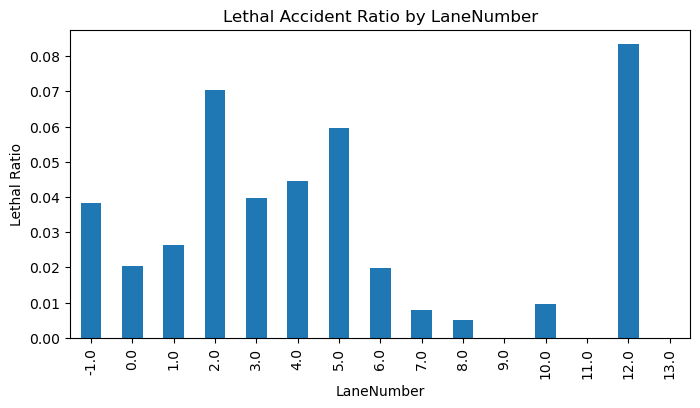

In [665]:
# 시각화

lane_gravity_ratio["lethal_ratio"].plot(kind="bar", figsize=(8, 4))
plt.title("Lethal Accident Ratio by LaneNumber")
plt.xlabel("LaneNumber")
plt.ylabel("Lethal Ratio")
plt.show()

### LaneNumber 파생변수 생성

LaneNumber를 그대로 모델에 사용하는 대신,  
차로 수 규모에 따른 위험 수준을 반영할 수 있도록  
LowLane, MediumLane, HighLane의 세 구간과  
차로 정보가 없는 경우를 나타내는 Unknown 그룹으로 재분류하였다.  

본 파생변수는 도로 규모에 대한 정보를 유지하면서도  
극단적인 값으로 인한 과적합 위험을 줄이기 위한 목적이며,  
모델 학습 단계에서 원본 LaneNumber와 함께  
최종 사용 여부를 판단할 예정이다.

In [666]:
# 파생변수 생성하기
def lane_group(x):
    if x == -1:
        return "Unknown"
    elif x <= 1:
        return "LowLane"
    elif x <= 3:
        return "MediumLane"
    else:
        return "HighLane"

df_train["LaneGroup"] = df_train["LaneNumber"].apply(lane_group)

### Layout × Gravity

도로 형상(Layout)에 따른 사고 심각도를 분석한 결과,  
곡선 구간(LeftCurve, RightCurve, S-Shape)에서  
직선 구간(Straight)보다 치명 사고 비율이  
일관되게 높게 나타나는 경향을 확인하였다.  

곡선 도로는 시야 확보의 어려움과  
차량 제어 난이도 증가로 인해  
사고 발생 시 충돌 강도가 커질 가능성이 있으며,  
이는 사고 심각도 상승으로 이어질 수 있다.  

In [667]:
# Layout 값 분포 확인
df_train["Layout"].value_counts()

Layout
Straight      34088
Unknown        5522
LeftCurve      3944
RightCurve     3715
S-Shape         553
Name: count, dtype: int64

In [668]:
# Layout × Gravity 비율

layout_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Layout")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

layout_gravity_ratio

,total_accidents,lethal_ratio
Layout,,
RightCurve,3715,0.089637
S-Shape,553,0.088608
LeftCurve,3944,0.085446
Unknown,5522,0.053785
Straight,34088,0.048257


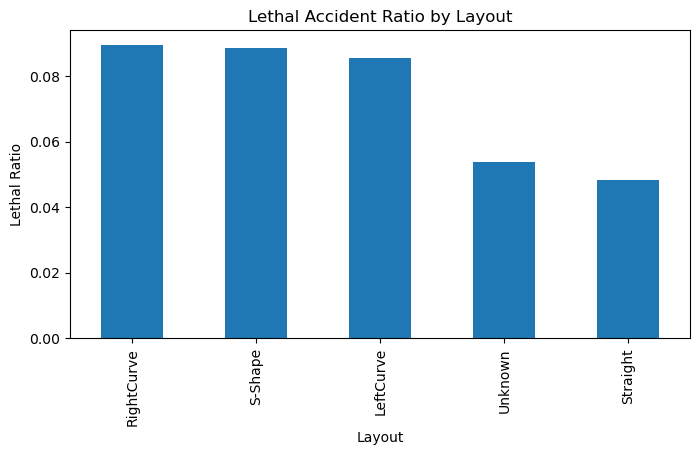

In [669]:
# 시각화
layout_gravity_ratio["lethal_ratio"].plot(kind="bar", figsize=(8, 4))
plt.title("Lethal Accident Ratio by Layout")
plt.xlabel("Layout")
plt.ylabel("Lethal Ratio")
plt.show()

### Layout 파생변수 생성

위 결과에 따라 개별 곡선 유형을 구분하기보다는     
곡선 여부에 초점을 맞추어 Curve, Straight, Unknown의 세 그룹으로 재분류하였다.  
본 파생변수는 도로 형상에 따른 위험도를     
직관적으로 반영하면서도 모델 복잡도를 줄이기 위한 목적으로 생성되었다.

In [670]:
# 파생변수 생성
def layout_group(x):
    if x in ["LeftCurve", "RightCurve", "S-Shape"]:
        return "Curve"
    elif x == "Straight":
        return "Straight"
    else:
        return "Unknown"

df_train["LayoutGroup"] = df_train["Layout"].apply(layout_group)

### SurfaceCondition × Gravity

노면 상태(SurfaceCondition)에 따른 사고 심각도를 확인한 결과,  
Normal, Wet, Unknown 구간에서는 치명 사고 비율 차이가 크지 않았으며  
Flooded, Mud, Ice 등 일부 조건에서 높은 치명 비율이 관측되었으나  
표본 수가 제한적이어서 개별 범주 단위의 해석에는 유의가 필요했다.  

In [671]:
df_train["SurfaceCondition"].value_counts()

SurfaceCondition
Normal     34059
Wet         7653
Unknown     5334
Other        244
Ice          187
Snow         122
Oil           95
Puddles       70
Flooded       38
Mud           20
Name: count, dtype: int64

In [672]:
# SurfaceCondition × Gravity 비율

surface_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("SurfaceCondition")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

surface_gravity_ratio

,total_accidents,lethal_ratio
SurfaceCondition,,
Flooded,38,0.184211
Mud,20,0.100000
Ice,187,0.090909
Other,244,0.065574
Oil,95,0.063158
Snow,122,0.057377
Puddles,70,0.057143
Normal,34059,0.056520
Wet,7653,0.052136


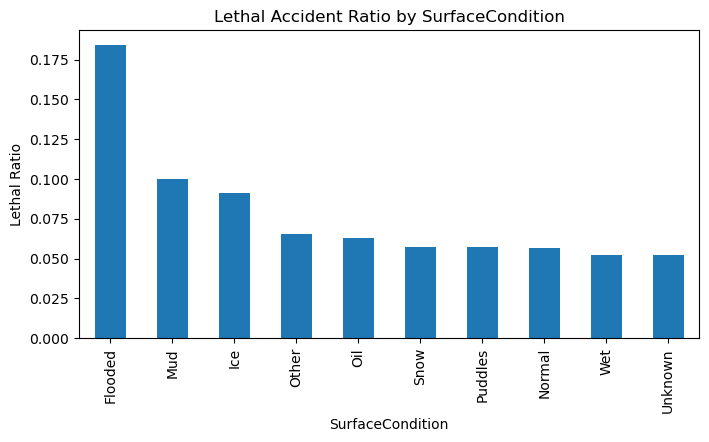

In [673]:
# 시각화

surface_gravity_ratio["lethal_ratio"].plot(kind="bar", figsize=(8, 4))
plt.title("Lethal Accident Ratio by SurfaceCondition")
plt.xlabel("SurfaceCondition")
plt.ylabel("Lethal Ratio")
plt.show()

### SurfaceCondition 파생변수 정리

노면 상태는 세부 범주별로 표본 수 편차가 크고 일부 범주는 표본 수가 매우 적어    
그대로 사용할 경우 과적합 위험이 있다고 판단하였다.    
이에 따라 노면 상태를 물기 관련 조건, 정보 불확실 조건, 정상 상태,    
그리고 물리적으로 제어가 어려운 고위험 노면 조건으로 구분하여   
의미적 일관성과 학습 안정성을 동시에 확보하고자 하였다.

In [674]:
# 파생변수 생성하기

def surface_group_v2(x):
    if x == "Normal":
        return "Normal"
    elif x in ["Wet", "Puddles", "Snow"]:
        return "WetRelated"
    elif x in ["Unknown", "Other"]:
        return "UnknownOrOther"
    else:
        return "Hazardous"

df_train["SurfaceGroup"] = df_train["SurfaceCondition"].apply(surface_group_v2)

### Infrastructure × Gravity

Infrastructure는
Fixed_/Mobile_ 충돌 정보와 중복되는 간접 변수로 판단하여
모델 입력에서는 제외하였다.

In [675]:
# 값 분포 확인하기
df_train["Infrastructure"].value_counts()

Infrastructure
Unknown           42720
Intersection       2568
Interchange         817
Bridge              660
Tunnel              470
PedestrianZone      395
Railroad            173
Toll                 19
Name: count, dtype: int64

In [676]:
# Infrastructure × Gravity 비율
infra_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Infrastructure")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

infra_gravity_ratio

,total_accidents,lethal_ratio
Infrastructure,,
Toll,19,0.157895
Railroad,173,0.098266
Bridge,660,0.087879
Unknown,42720,0.056835
Intersection,2568,0.039720
Interchange,817,0.039168
PedestrianZone,395,0.037975
Tunnel,470,0.012766


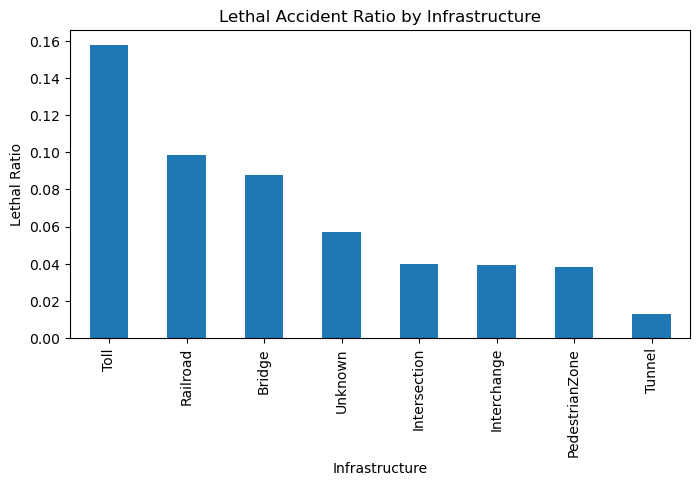

In [677]:
infra_gravity_ratio["lethal_ratio"].plot(kind="bar", figsize=(8, 4))
plt.title("Lethal Accident Ratio by Infrastructure")
plt.xlabel("Infrastructure")
plt.ylabel("Lethal Ratio")
plt.show()

## 사고 당사자 구성(Users)의 인적 특성과 사고 심각도 분석

### Persons x Gravity

사고에 연관된 전체 인원 수(Persons)는  
사고 규모를 직관적으로 반영하는 중요한 변수로 확인되었다.  

단독 사고(1명)의 경우 치명 사고 비율이 상대적으로 높게 나타났으며,  
이는 단일 운전자 사고에서 고속 주행이나 단독 충돌의 영향이  
치명도로 이어질 가능성을 시사한다.  

반면 2명이 연관된 사고는 전체 사고의 대부분을 차지하지만  
치명 사고 비율은 가장 낮은 수준을 보여  
일반적인 승용차 사고의 특성이 반영된 결과로 해석할 수 있다.  

인원 수가 3명 이상으로 증가할수록 치명 사고 비율은  
전반적으로 상승하는 경향을 보였으나,  
상위 인원 구간에서는 표본 수 감소로 인해  
해석에 주의가 필요하다.

In [678]:
# 값 분포 및 심각도 비율 확인하기
persons_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Persons")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"
    })
)

persons_gravity_ratio

,total_accidents,lethal_ratio
Persons,,
1,8363,0.088605
2,27159,0.042012
3,7442,0.055899
4,2660,0.062030
5,1215,0.074897
6,508,0.098425
7,231,0.082251
8,100,0.130000
9,52,0.134615


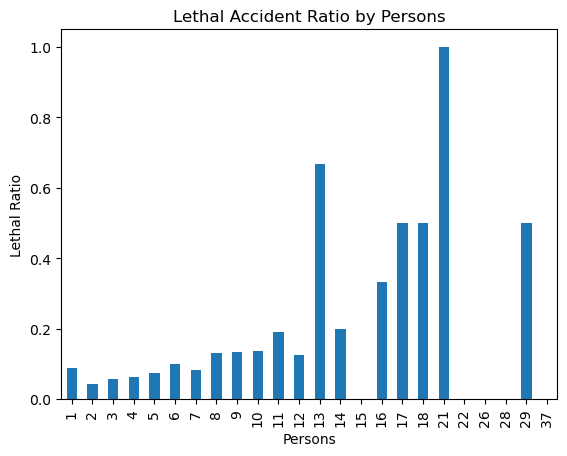

In [679]:
# 시각화
persons_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by Persons")
plt.xlabel("Persons")
plt.ylabel("Lethal Ratio")
plt.show()

### persons 파생 변수 만들기

사고에 연관된 전체 인원 수(Persons)는    
단독 사고와 다인 사고 간에 사고 구조와 위험 양상이 다르게 나타났다.   
특히 단독 사고는 상대적으로 높은 치명 사고 비율을 보였으며,    
5명 이상이 연관된 사고부터는 표본 수 감소와 함께    
사고 규모 확대에 따른 위험 신호로 해석할 수 있다고 판단하였다.   
이에 따라 인원 수를 사고 구조 관점에서 구간화하여   
보다 안정적인 학습 변수를 구성하였다.

In [680]:
# Persons 구간화 파생변수 생성

def persons_group(x):
    if x == 1:
        return "Solo"
    elif 2 <= x <= 4:
        return "SmallGroup"
    else:
        return "LargeGroup"

df_train["PersonsGroup"] = df_train["Persons"].apply(persons_group)

### Drivers x Gravity

Drivers 컬럼은 사고 단위로 집계된 운전자 수를 의미한다.    
이 중 Drivers 값이 0인 경우는 실제로 운전자가 존재하지 않는 사고이거나,    
운전자 정보가 누락된 케이스가 함께 포함된 상태이다. 

Drivers는 사고의 충돌 구조를 직접적으로 반영하는 변수로 확인되었다.    
    
단일 운전자 사고의 치명 사고 비율은 약 7%로,    
다중 운전자 사고에 비해 상대적으로 높게 나타났다.    
이는 단독 사고나 단일 차량 충돌에서    
사고가 치명적으로 이어질 가능성이 있음을 시사한다.    
    
반면 운전자가 2명 이상인 사고는    
사고 건수는 많지만 치명 사고 비율은 상대적으로 낮았으며,    
Drivers가 증가할수록 치명 비율이 다시 상승하는 경향을 보였다.    
다만 상위 구간에서는 표본 수 감소로 해석에 주의가 필요하다.

In [681]:
# 값 분포 및 심각도 비율 확인하기
Drivers_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Drivers")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

Drivers_gravity_ratio

,total_accidents,lethal_ratio
Drivers,,
0,738,0.018970
1,19248,0.071644
2,24381,0.044133
3,2704,0.055473
4,564,0.051418
5,125,0.056000
6,45,0.111111
7,10,0.100000
8,1,0.000000


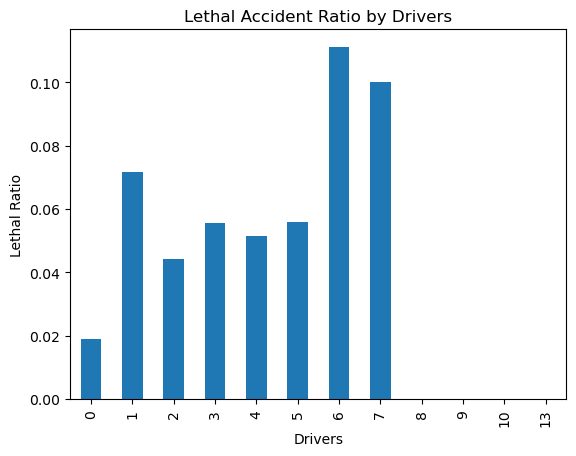

In [682]:
# 시각화
Drivers_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by Drivers")
plt.xlabel("Drivers")
plt.ylabel("Lethal Ratio")
plt.show()

### 파생변수 생성하기

Drivers = 0은 단일 운전자 사고로 해석하지 않고,    
운전자 정보가 없거나 확인되지 않은 상태로 별도 구분하였다.    
    
Drivers 값이 1인 경우를 단일 운전자 사고로 정의하고,    
Drivers 값이 2 이상인 경우를 다중 운전자 사고로 정의하여    
사고의 충돌 구조를 구분하는 파생 변수를 생성하였다.    

In [683]:
# 운전자 정보 누락 여부
df_train["Driver_missing"] = (df_train["Drivers"] == 0).astype(int)

# 다중 운전자 사고
df_train["Multi_driver_accident"] = (df_train["Drivers"] >= 2).astype(int)

# 명시적 단일 운전자 사고
df_train["Single_driver_accident"] = (df_train["Drivers"] == 1).astype(int)

### Passengers × Gravity

Passengers는 사고에 연관된 동승자 규모를 반영하는 변수로,    
동승자 수가 증가할수록 치명 사고 비율이      
전반적으로 상승하는 뚜렷한 경향을 보였다.    
    
동승자가 없는 사고(0명)의 치명 사고 비율은 약 5.1%였으며,    
동승자가 1명 이상 포함된 사고부터    
치명 사고 비율이 점진적으로 증가하였다.    
    
특히 Passengers가 3명 이상인 구간부터는    
치명 사고 비율이 9%를 넘어서는 등    
사고 규모 확대에 따른 위험 증가가 관측되었다.    
다만 상위 구간에서는 표본 수가 감소하여    
비율 해석에는 주의가 필요하다.

In [684]:
Passengers_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Passengers")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

Passengers_gravity_ratio

,total_accidents,lethal_ratio
Passengers,,
0,36270,0.050703
1,7519,0.062242
2,2245,0.078396
3,1029,0.086492
4,460,0.104348
5,152,0.111842
6,57,0.122807
7,35,0.171429
8,18,0.055556


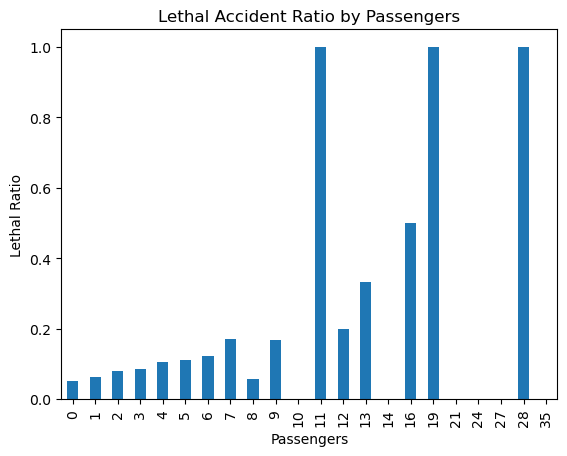

In [685]:
# 시각화
Passengers_gravity_ratio["lethal_ratio"].plot(kind="bar")
plt.title("Lethal Accident Ratio by Passengers")
plt.xlabel("Passengers")
plt.ylabel("Lethal Ratio")
plt.show()

### 파생변수 생성 이유

Passengers 값은 0~2 구간에서 표본 수가 충분히 확보되어 있으며,    
3명 이상부터는 치명 사고 비율이 뚜렷하게 상승하는 경향을 보였다.    
    
이에 따라 동승자가 없는 사고, 소규모 동승 사고, 다수 동승 사고를     
구분할 수 있도록 Passengers를 구간화하여 파생 변수를 생성하였다.    
    
이와 같은 구간화는 사고 규모 확대에 따른 위험 증가를    
보다 안정적으로 반영하기 위한 목적이다.    

In [686]:
#파생변수 생성하기

df_train["Passenger_group"] = pd.cut(
    df_train["Passengers"],
    bins=[-1, 0, 2, 4, df_train["Passengers"].max()],
    labels=[
        "No_passenger",
        "1-2_passengers",
        "3-4_passengers",
        "5+_passengers"
    ]
)

### Pedestrian × Gravity

일반적으로 보행자 사고는 치명도가 높을 것으로 예상되지만,    
본 데이터에서는 보행자 1명 사고의 치명 비율이    
비보행자 사고보다 낮게 나타났다.    
    
이는 사고 단위 집계 특성상    
보행자 사고가 상대적으로 경미한 접촉 사고를    
포함하고 있을 가능성이나,    
도심 저속 환경에서 발생한 사고가    
다수 포함되었을 가능성을 시사한다.    

따라서 Pedestrian 수의 절대값보다는 보행자 개입 여부 자체를    
사고 유형을 구분하는 기준으로 해석하는 것이 적절하다고 판단하였다.  

In [687]:
# # 값 분포 및 비율 확인하기
# ped_gravity_ratio = (
#     df_train
#     .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
#     .groupby("Pedestrian")["is_lethal"]
#     .agg(["count", "mean"])
#     .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
# )

# ped_gravity_ratio

### 파생 변수 생성 이유

Pedestrian 값은 대부분 0 또는 1로 구성되어 있으며,    
2 이상 구간은 표본 수가 극히 적어    
구간화에 따른 추가적인 정보 이득이 제한적이다.    
    
이에 따라 Pedestrian 컬럼은    
보행자 수 규모 변수로 활용하기보다는,    
보행자 개입 여부를 나타내는 이진 변수로    
파생하는 것이 해석과 모델링 측면에서 더 적절하다고 판단하였다.

In [688]:
# # 보행자 개입 여부 파생변수 생성
# df_train["Pedestrian_involved_accident"] = (df_train["Pedestrian"] >= 1).astype(int)

### Safety_used × Gravity

보호 장비를 미착용한 인원이  
1명 이상 포함된 사고의 치명 사고 비율은  
약 14.7%로, 미착용 인원이 없는 사고(약 5.2%)에 비해  
현저히 높게 나타났다.  

이는 보호 장비 미착용 여부가  
사고 심각도와 강하게 연관된  
핵심 위험 요인임을 시사한다.  

Safety_used 변수는 사고 단위 집계 데이터이지만,  
보호 장비 미착용 인원의 존재 여부만으로도  
사고 심각도의 차이를 명확히 설명할 수 있었다.  

이에 따라 본 분석에서는  
보호 장비 미착용 여부를  
주요 파생 변수로 활용하였다.

In [689]:
# 착용 여부 분포 확인하기
df_train[
    [
        "Safety_used_yes_count",
        "Safety_used_no_count",
        "Safety_used_unknown_count",
        "Safety_used_missing_count"
    ]
].describe()

,Safety_used_yes_count,Safety_used_no_count,Safety_used_unknown_count,Safety_used_missing_count
count,47822.0,47822.0,47822.0,47822.0
mean,1.785057,0.050709,0.168353,0.271779
std,1.296635,0.314967,0.574687,0.542975
min,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0
50%,2.0,0.0,0.0,0.0
75%,2.0,0.0,0.0,0.0
max,28.0,30.0,27.0,17.0


In [690]:
# Safety_used_unknown_count 기준 치명 비율
unknown_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .assign(has_unknown=(df_train["Safety_used_unknown_count"] > 0).astype(int))
    .groupby("has_unknown")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

unknown_gravity_ratio

,total_accidents,lethal_ratio
has_unknown,,
0,42181,0.056020
1,5641,0.052828


In [691]:
# Safety_used_missing_count 기준 치명 비율
missing_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .assign(has_missing=(df_train["Safety_used_missing_count"] > 0).astype(int))
    .groupby("has_missing")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

missing_gravity_ratio

,total_accidents,lethal_ratio
has_missing,,
0,36341,0.056685
1,11481,0.052347


In [692]:
# 보호 장비 미착용 사고 vs 착용 사고 비교

df_train["No_safety_used"] = (df_train["Safety_used_no_count"] >= 1).astype(int)

# 비율 확인하기
safety_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("No_safety_used")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

safety_gravity_ratio

,total_accidents,lethal_ratio
No_safety_used,,
0,45842,0.051699
1,1980,0.146970


### 파생 변수 생성


안전장비 착용 여부 파생 변수 생성 기준     

안전장비 착용 정보는 사고 단위로 집계된 인원 수 데이터로 구성되어 있어,    
단순히 미착용 여부를 이진 변수로 처리할 경우     
사고 내 착용 구성의 차이를 충분히 반영하기 어렵다고 판단하였다.    

이에 따라 사고에 포함된 인원들의 착용 상태를 기준으로     
전원 착용, 일부 미착용, 전원 미착용의 세 가지 유형으로 구분하여     
안전장비 착용의 구조적 차이를 표현하는 파생 변수를 생성하였다.    

해당 파생 변수는    
사고 내 착용자와 미착용자의 혼재 여부를 명확히 구분함으로써    
안전장비 착용 상태가 사고 심각도에 미치는 영향을    
보다 정교하게 학습할 수 있도록 설계되었다.    

또한 착용 여부를 판단할 수 없는 경우(Unknown/Missing만 존재하는 사고)는    
별도의 상태로 분리하여 미착용으로 과도하게 해석되는 것을 방지하였다.

In [693]:
# 안전장비 착용 상태 3단계 파생변수
df_train["SafetyUseGroup"] = np.select(
    [
        (df_train["Safety_used_yes_count"] > 0) & (df_train["Safety_used_no_count"] == 0),
        (df_train["Safety_used_yes_count"] > 0) & (df_train["Safety_used_no_count"] > 0),
        (df_train["Safety_used_yes_count"] == 0) & (df_train["Safety_used_no_count"] > 0),
    ],
    ["AllUsed", "PartialNotUsed", "NoneUsed"],
    default="Unclear"
)

### 성별 컬럼 분석 방향 정리 - 
(Male_count / Female_count / Gender_unknown)

Male_count, Female_count, Gender_unknown 컬럼은 사고에 포함된 전체 인원 중     
각 성별에 해당하는 인원 수를 사고 단위로 집계한 변수이다.    
즉, 개별 인원의 성별이 아니라 하나의 사고에 포함된 성별 구성 규모를 나타낸다.     

In [694]:
# 성별 구성 형태 파생변수 생성

def gender_composition(row):
    if row["Gender_unknown"] > 0:
        return "UnknownIncluded"
    elif (row["Male_count"] > 0) and (row["Female_count"] == 0) and (row["Gender_unknown"] == 0):
        return "AllMale"
    elif (row["Female_count"] > 0) and (row["Male_count"] == 0) and (row["Gender_unknown"] == 0):
        return "AllFemale"
    elif (row["Male_count"] > 0) and (row["Female_count"] > 0) and (row["Gender_unknown"] == 0):
        return "Mixed"
    else:
        return "None"

df_train["GenderComposition"] = df_train.apply(gender_composition, axis=1)

In [695]:
# GenderComposition × Gravity 비율

gender_comp_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("GenderComposition")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

gender_comp_gravity

,total_accidents,lethal_ratio
GenderComposition,,
AllMale,21992,0.069980
Mixed,19537,0.049138
AllFemale,4773,0.031636
UnknownIncluded,1520,0.007237


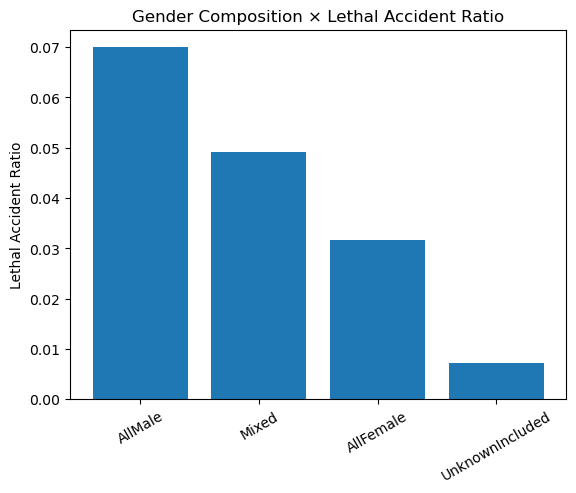

In [696]:
# 치명 사고 비율 시각화

plt.figure()
plt.bar(
    gender_comp_gravity.index,
    gender_comp_gravity["lethal_ratio"]
)
plt.xticks(rotation=30)
plt.ylabel("Lethal Accident Ratio")
plt.title("Gender Composition × Lethal Accident Ratio")
plt.show()

### 사고 남성의 비율과 심각도 관계 분석

남성 비율에 따라 사고 심각도를 비교한 결과,    
남성 비중이 낮은 사고에 비해    
남성 비중이 높은 사고에서 치명 사고 비율이 점진적으로 증가하는 경향이 확인되었다.    
이러한 결과는 성별 인원 수 자체보다    
사고 내 성별 구성 비율이 심각도 예측에 더 유의미한 신호가 될 수 있음을 시사한다.    

In [697]:
# 남성 비율(Male_ratio) 계산

# 성별 확인 인원 수
df_train["Gender_known"] = (df_train["Male_count"] + df_train["Female_count"])

# 남성 비율 계산 (성별 확인 인원이 0인 경우 NaN 처리)
df_train["Male_ratio"] = (df_train["Male_count"] / df_train["Gender_known"]).where(df_train["Gender_known"] > 0)

In [698]:
# 남성 비율 구간화

df_train["MaleRatioGroup"] = pd.cut(df_train["Male_ratio"],
                                    bins=[-0.01, 0.33, 0.66, 1.0],
                                    labels=["Low", "Medium", "High"])

In [699]:
# Male_ratio × Gravity 비율

male_ratio_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("MaleRatioGroup")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={
        "count": "total_accidents",
        "mean": "lethal_ratio"
    })
)

male_ratio_gravity

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\1816080635.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("MaleRatioGroup")["is_lethal"]


,total_accidents,lethal_ratio
MaleRatioGroup,,
Low,5628,0.031628
Medium,14507,0.042600
High,27687,0.067360


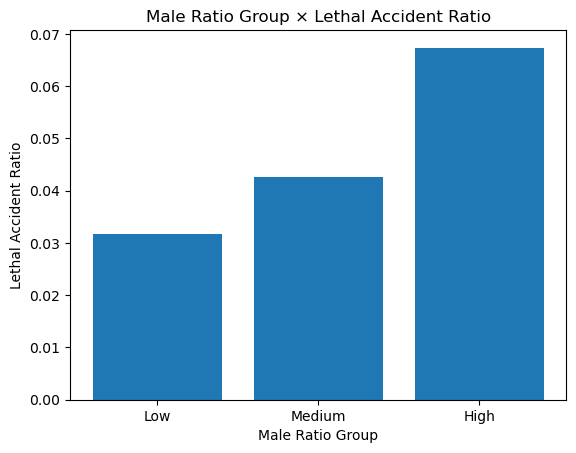

In [700]:
# 시각화
plt.figure()
plt.bar(
    male_ratio_gravity.index.astype(str),
    male_ratio_gravity["lethal_ratio"]
)
plt.xlabel("Male Ratio Group")
plt.ylabel("Lethal Accident Ratio")
plt.title("Male Ratio Group × Lethal Accident Ratio")
plt.show()

### 성별 파생 변수 최종결정

성별 정보는 사고에 포함된 인원 수를 기준으로 집계된 데이터로,    
단순 인원 수 변수는 사고 규모 변수와 중복될 가능성이 있다고 판단하였다.   
이에 따라 본 분석에서는 인원 수가 아닌 성별 구성 형태에 초점을 맞추어    
전원 남성, 전원 여성, 남녀 혼합, 성별 미확인 포함 여부로 성별 정보를 재구성하였다.   
특히 성별 미확인 인원이 포함된 사고는 전원 여부 판단에서 제외하여   
과도한 해석을 방지하고자 하였다.   
    
또한 최종 모델에서는 그룹화한 남성 비율(MaleRatioGroup)과 GenderComposition 을 성별 관련 주요 변수로 활용하였다.

### 운전자 연령 컬럼 분석 방향 정리 - 
(Driver_age_mean / Driver_age_min / Driver_age_max / Driver_age_unknown)

Driver_age_mean, Driver_age_min, Driver_age_max 컬럼은    
사고에 포함된 운전자들의 연령 정보를    
사고 단위로 요약한 변수이다.    
    
사고에 따라 운전자가 1명 이상 포함될 수 있으므로,    
개별 운전자의 연령이 아닌    
사고에 포함된 운전자 연령의 요약 통계값을 나타낸다.    

In [701]:
# 운전자 연령 분포 확인
df_train[["Driver_age_mean", "Driver_age_min", "Driver_age_max","Driver_age_unknown"]].describe()

,Driver_age_mean,Driver_age_min,Driver_age_max,Driver_age_unknown
count,47822.000000,47822.000000,47822.000000,47822.0
mean,48.253404,40.833759,55.789616,0.034545
std,20.239383,21.108272,23.604242,0.184449
min,-1.000000,-1.000000,-1.000000,0.0
25%,33.500000,25.000000,37.000000,0.0
50%,47.666667,36.000000,56.000000,0.0
75%,61.500000,54.000000,75.000000,0.0
max,99.000000,99.000000,101.000000,2.0


### 대표 변수 선택: Driver_age_mean

운전자 연령을 사고 단위로 해석할 때,    
최소값이나 최대값은    
특정 운전자의 특성에 크게 좌우될 수 있다.    
    
이에 따라 본 분석에서는    
사고에 포함된 운전자 연령의 전반적인 수준을    
가장 직관적으로 나타내는    
Driver_age_mean을 대표 변수로 선택하였다.

In [702]:
# Driver_age_mean 분포 확인
df_train["Driver_age_mean"].describe()

count    47822.000000
mean        48.253404
std         20.239383
min         -1.000000
25%         33.500000
50%         47.666667
75%         61.500000
max         99.000000
Name: Driver_age_mean, dtype: float64

### Driver_age_mean × Gravity 분석

사고에 포함된 운전자의 평균 연령은 약 48세 수준으로 중·장년층 운전자가 다수를 차지하고 있음을 확인할 수 있었다.    

Driver_age_mean에는 일부 -1 값이 포함되어 있으나 이는 연령 정보 누락 또는 특수 케이스로 판단되며,  
전반적인 분포와 연령대별 비교에는 큰 영향을 미치지 않는 수준으로 나타났다.    

운전자 평균 연령 구간별 사고 심각도를 비교한 결과,  
25세 이하부터 55세 이하 구간까지는 치명 사고 비율이 비교적 유사한 수준을 보였다.    

반면 56세 이상 구간부터 치명 사고 비율이 점진적으로 증가하는 경향이 나타났으며,  
70세 이상 구간에서는 가장 높은 치명 사고 비율을 기록하였다.    

이는 운전자 평균 연령이 높아질수록 사고 발생 시 회피 능력 저하나 충돌 시 신체적 취약성이 증가하여  
사고가 치명적으로 이어질 가능성이 상대적으로 커질 수 있음을 시사한다.    

이에 따라 본 분석에서는 운전자 연령 특성을 대표하는 변수로 Driver_age_mean을 유지하되,  
고령 운전자 영향 여부를 파악하기 위한 보조적인 파생 변수 활용이 가능하다고 판단하였다.

In [703]:
age_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby(pd.cut(
        df_train["Driver_age_mean"],
        bins=[0, 25, 40, 55, 70, 100],
        labels=["~25", "26~40", "41~55", "56~70", "70+"]
    ))["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={
        "count": "total_accidents",
        "mean": "lethal_ratio"
    })
)

age_gravity_ratio

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\3787276294.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.cut(


,total_accidents,lethal_ratio
Driver_age_mean,,
~25,4922,0.053637
26~40,11384,0.051300
41~55,13297,0.054072
56~70,9981,0.058812
70+,7054,0.065353


### 파생 변수 생성

운전자 연령 관련 컬럼은    
사고 단위로 집계된 요약 통계값으로,    
사고에 포함된 운전자 연령의 전반적인 분포를    
확인하는 데 유용한 변수이다.        
     
그러나 사고 심각도 관점에서는    
운전자 평균 연령의 미세한 차이보다,      
고령 운전자가 사고에 포함되었는지 여부가    
사고 유형을 구분하는 데    
더 직관적인 기준이 될 수 있다.         
    
특히 고령 운전자는 반응 속도 저하,    
시야 및 판단 능력 저하 등으로 인해     
사고 발생 시 피해가 확대될 가능성이 상대적으로 크다.    
    
이에 따라 본 분석에서는    
사고에 고령 운전자가 한 명이라도 포함된 경우를    
하나의 사고 유형으로 정의하기 위해    
고령 운전자 포함 여부 파생 변수를 생성하였다.    


In [704]:
# 고령 운전자 포함 여부 파생 변수
df_train["Elder_driver_involved"] = (df_train["Driver_age_max"] >= 65).astype(int)

### 동승자 연령대 분석 -
(Passenger_child / youth / adult / senior / elder / unknown)

Passenger_child, Passenger_youth, Passenger_adult, Passenger_senior, Passenger_elder 컬럼은    
사고에 포함된 동승자 인원을 연령대별로 집계한 변수이다.    

이들 컬럼은 개별 동승자의 연령이 아닌 사고에 특정 연령대의 동승자가    
포함되었는지를 나타내는 정보로 해석하는 것이 적절하다.       

특히 어린이 및 고령 동승자는 사고 발생 시 신체적 취약성이 높은 집단에 해당하므로    
사고 심각도와의 관계를 우선적으로 확인할 필요가 있다.    

In [705]:
# 동승자 연령대 분포 확인
df_train[["Passenger_child", 
          "Passenger_youth", 
          "Passenger_adult", 
          "Passenger_senior",
          "Passenger_elder",
          "Passenger_age_unknown"
         ]
    ].describe()

,Passenger_child,Passenger_youth,Passenger_adult,Passenger_senior,Passenger_elder,Passenger_age_unknown
count,47822.0,47822.0,47822.0,47822.0,47822.0,47822.0
mean,0.093304,0.096127,0.063025,0.052842,0.082577,0.008218
std,0.437893,0.372995,0.281151,0.270824,0.321436,0.091888
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,20.0,14.0,12.0,19.0,9.0,2.0


In [706]:
# 취약 연령대 동승자 포함 여부 확인하기

# 어린이 동승자 포함 여부
df_train["Child_passenger_involved"] = (df_train["Passenger_child"] >= 1).astype(int)

# 고령 동승자 포함 여부
df_train["Senior_passenger_involved"] = ((df_train["Passenger_senior"] + df_train["Passenger_elder"]) >= 1).astype(int)

### 취약 연령대 동승 여부 × 사고 심각도(Gravity)

취약 연령대 동승 여부 중
고령 동승자 포함 여부는 사고 심각도와 비교적 명확한 연관성을 보였으며,    
어린이 동승 여부는 단독 변수로서의 설명력은 제한적이지만
사고 규모나 다른 위험 요인과 결합될 경우    
보조적인 설명 변수로 활용 가능하다고 판단하였다.

In [707]:
# 취약 연령대 동승 여부 × 사고 심각도(Gravity) 비율 분석

# 어린이 동승 여부 × 사고 심각도
child_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Child_passenger_involved")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

# 고령 동승 여부 × 사고 심각도
senior_gravity_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Senior_passenger_involved")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

child_gravity_ratio, senior_gravity_ratio

(                          total_accidents  lethal_ratio
 Child_passenger_involved                               
 0                                   44742      0.055004
 1                                    3080      0.064935,
                            total_accidents  lethal_ratio
 Senior_passenger_involved                               
 0                                    42484      0.052679
 1                                     5338      0.079243)

### 취약 연령대 × 동승자 수(Passengers) 조합 분석

우선 취약 연령대 여부와 관계없이 동승자 수가 증가할수록 치명 사고 비율이 일관되게 상승하는 경향이 관측되었다.    
이는 사고 규모 자체가 사고 심각도를 설명하는 핵심 요인임을 다시 한번 확인해준다.    

고령 동승자 포함 사고는 사고 규모가 커질수록 치명 사고 비율이 더 가파르게 증가하는 경향을 보였다.    
이는 고령자의 신체적 취약성이 다중 동승 사고에서 피해 심각도를 증폭시키는 요인으로 작용했을 가능성을 시사한다.    

어린이 동승 여부에서는 동일한 사고 규모 내에서 어린이 동승 여부에 따른 추가적인 위험 증가는 일관되게 나타나지 않았다.    
어린이 동승 여부는 사고 심각도를 단독으로 설명하는 핵심 변수라기보다는 보조적인 특성으로 해석하는 것이 적절하다고 판단하였다.    

In [708]:
# 동승자 수 그룹화 하기
df_train["Passenger_group"] = pd.cut(
    df_train["Passengers"],
    bins=[-1, 0, 2, 4, df_train["Passengers"].max()],
    labels=[
        "No_passenger",
        "1-2_passengers",
        "3-4_passengers",
        "5+_passengers"
    ]
)

In [709]:
# 고령 동승자 × 동승자 수 조합 분석
senior_passenger_group_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby(["Senior_passenger_involved", "Passenger_group"])["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .reset_index()
)

senior_passenger_group_ratio

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\367196436.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Senior_passenger_involved", "Passenger_group"])["is_lethal"]


,Senior_passenger_involved,Passenger_group,total_accidents,lethal_ratio
0,0,No_passenger,36270,0.050703
1,0,1-2_passengers,5670,0.062787
2,0,3-4_passengers,494,0.072874
3,0,5+_passengers,50,0.140000
4,1,No_passenger,0,NaN
5,1,1-2_passengers,4094,0.070347
6,1,3-4_passengers,995,0.101508
7,1,5+_passengers,249,0.136546


In [710]:
# 어린이 동승자 × 동승자 수 조합 분석
child_passenger_group_ratio = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby(["Child_passenger_involved", "Passenger_group"])["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={ "count": "total_accidents", "mean": "lethal_ratio"})
    .reset_index()
)

child_passenger_group_ratio

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\2349559407.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Child_passenger_involved", "Passenger_group"])["is_lethal"]


,Child_passenger_involved,Passenger_group,total_accidents,lethal_ratio
0,0,No_passenger,36270,0.050703
1,0,1-2_passengers,7689,0.070750
2,0,3-4_passengers,715,0.099301
3,0,5+_passengers,68,0.102941
4,1,No_passenger,0,NaN
5,1,1-2_passengers,2075,0.048193
6,1,3-4_passengers,774,0.085271
7,1,5+_passengers,231,0.147186


## 사고 차량(Vehicles)의 특성과 사고 심각도 분석 

### Vehicle_count_user 분포 및 사고 구조별 심각도

Vehicle_count_user는 사고에 연관된 고유 차량 수를 의미한다.    
분포를 확인한 결과, 2대 차량 사고가 가장 많았으며 1대 차량 사고가 그 다음으로 많이 발생했다.    
3대 이상 차량이 포함된 사고는 전체 사고 대비 비중이 낮아 표본 수가 급격히 감소하는 특성을 보였다.    
    
사고 구조의 차이를 반영하기 위해    
Vehicle_count_user를 1대, 2대, 3대 이상 사고로 구분하여 사고 심각도(Gravity)와의 관계를 분석하였다.    
    
분석 결과 단일 차량 사고(1_vehicle)에서 치명 사고 비율이 가장 높게 나타났으며    
2대 차량 사고(2_vehicles)는 사고 건수는 많지만 치명 사고 비율은 상대적으로 낮았다.    
3대 이상 차량 사고(3+_vehicles)는 표본 수는 적지만 2대 사고보다 높은 치명 사고 비율을 보여    
사고 구조에 따른 위험도의 차이가 존재함을 확인할 수 있었다.

`["vehicle_structure"]` 구간화 파생 변수를 모델링에서 함께 사용해보도록 하겠습니다.

In [711]:
# Vehicle_count_user 값 분포
df_train["Vehicle_count_user"].value_counts().sort_index()

Vehicle_count_user
1     18556
2     25666
3      2818
4       585
5       132
6        47
7        11
8         1
9         2
10        2
12        1
13        1
Name: count, dtype: Int64

In [712]:
# 차량 수별 치명 사고 비율 계산
vehicle_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Vehicle_count_user")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
)

vehicle_gravity

,total_accidents,lethal_ratio
Vehicle_count_user,,
1,18556,0.074477
2,25666,0.042157
3,2818,0.055004
4,585,0.049573
5,132,0.053030
6,47,0.085106
7,11,0.181818
8,1,0.000000
9,2,0.000000


In [713]:
# 분석을 위한 차량 1대 / 2대 / 3대 이상 사고로 그룹화 하기

df_train["Vehicle_structure"] = (df_train["Vehicle_count_user"]
    .apply(lambda x: "1_vehicle" if x == 1 else ("2_vehicles" if x == 2 else "3+_vehicles")))

df_train["Vehicle_structure"].value_counts()

Vehicle_structure
2_vehicles     25666
1_vehicle      18556
3+_vehicles     3600
Name: count, dtype: int64

In [714]:
# 구조적 사고 유형 × Gravity 비율 분석

# 차량 수별 치명 사고 비율 계산
vehicle_structure_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .groupby("Vehicle_structure")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .loc[["1_vehicle", "2_vehicles", "3+_vehicles"]]
)

vehicle_structure_gravity

,total_accidents,lethal_ratio
Vehicle_structure,,
1_vehicle,18556,0.074477
2_vehicles,25666,0.042157
3+_vehicles,3600,0.054722


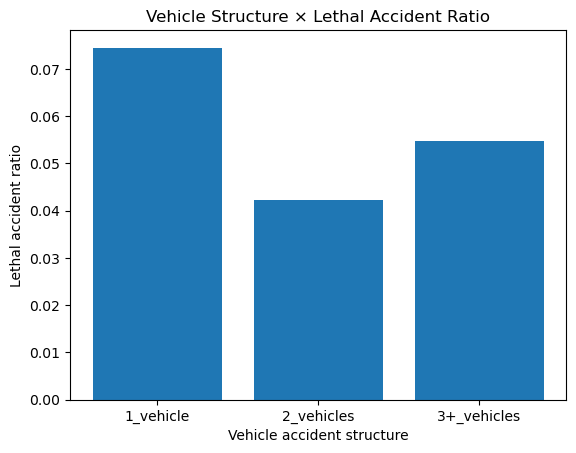

In [715]:
# 비율 시각화

plt.figure()
plt.bar(
    vehicle_structure_gravity.index,
    vehicle_structure_gravity["lethal_ratio"]
)
plt.xlabel("Vehicle accident structure")
plt.ylabel("Lethal accident ratio")
plt.title("Vehicle Structure × Lethal Accident Ratio")
plt.show()

### Category_* 분석

Category_* 변수는 사고에 특정 차량 유형이 포함되었는지를 나타내는 원-핫 변수로,    
차량 유형별 사고 심각도 차이를 확인하기 위해 분석에 사용하였다.    
분석 결과, 대형·특수 차량 계열에서 상대적으로 높은 치명 사고 비율이 관측되었으나,    
일부 차량 유형은 표본 수가 매우 적어 통계적 안정성이 낮았다.   

In [716]:
# Category 컬럼 종류 확인하기
category_cols = [col for col in df_train.columns if col.startswith("Category_")]
category_cols

['Category_Bicycle',
 'Category_Bus',
 'Category_Car<=3.5T',
 'Category_Coach',
 'Category_LargeCar+Trailer>3.5T',
 'Category_LargeCar>7.5T',
 'Category_LargeCar_3.5T-7.5T',
 'Category_Moped',
 'Category_Motorbike>125cm3',
 'Category_Motorbike_50cm3-125cm3',
 'Category_Other',
 'Category_QuadBike<=50cm3',
 'Category_QuadBike>50cm3',
 'Category_Quadricycle',
 'Category_Scooter<50cm3',
 'Category_Scooter>125cm3',
 'Category_Scooter_50cm3-125cm3',
 'Category_SpecialEngine',
 'Category_Tractor',
 'Category_Train',
 'Category_Tramway',
 'Category_Truck',
 'Category_Truck+SemiTrailer',
 'Category_Utility']

In [717]:
# 차량 유형 포함 사고 비율 확인
df_train[category_cols].sum().sort_values(ascending = False)

Category_Car<=3.5T                 70560
Category_Motorbike>125cm3           7744
Category_Utility                    7057
Category_Bicycle                    4385
Category_Moped                      3821
Category_Scooter<50cm3              2755
Category_Motorbike_50cm3-125cm3     2349
Category_Scooter_50cm3-125cm3       1917
Category_Scooter>125cm3             1724
Category_Bus                        1121
Category_LargeCar+Trailer>3.5T       886
Category_Truck+SemiTrailer           819
Category_Other                       763
Category_LargeCar>7.5T               759
Category_Coach                       458
Category_Quadricycle                 447
Category_LargeCar_3.5T-7.5T          403
Category_SpecialEngine               215
Category_Tractor                     198
Category_Tramway                     180
Category_QuadBike>50cm3              173
Category_Truck                        51
Category_QuadBike<=50cm3              29
Category_Train                        24
dtype: Int64

In [718]:
# Category_* × Gravity 비율 분석

category_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .melt(
        id_vars="is_lethal",
        value_vars=category_cols,
        var_name="category",
        value_name="included"
    )
    .query("included == 1")
    .groupby("category")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

category_gravity

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\853471537.py:12: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("included == 1")


,total_accidents,lethal_ratio
category,,
Category_Train,20,0.400000
Category_Tractor,169,0.171598
Category_LargeCar+Trailer>3.5T,659,0.156297
Category_SpecialEngine,71,0.154930
Category_LargeCar>7.5T,524,0.145038
Category_Truck+SemiTrailer,603,0.144279
Category_Truck,40,0.125000
Category_QuadBike>50cm3,82,0.085366
Category_Quadricycle,225,0.075556


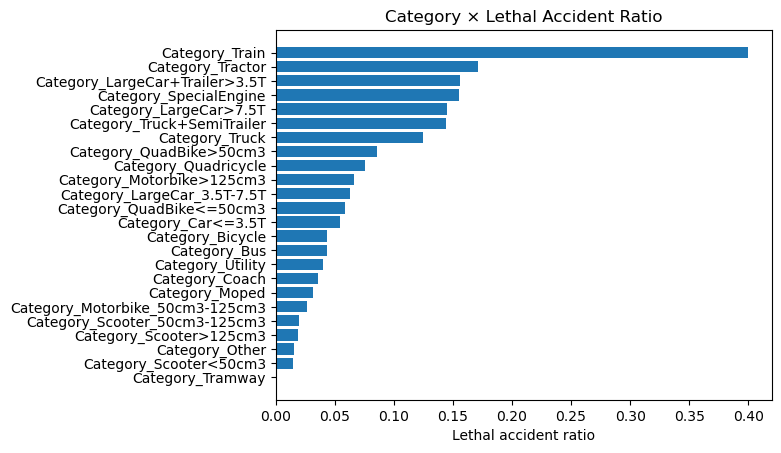

In [719]:
# 시각화

plt.figure()

plt.barh(
    category_gravity.index,
    category_gravity["lethal_ratio"]
)

plt.xlabel("Lethal accident ratio")
plt.title("Category × Lethal Accident Ratio")
plt.gca().invert_yaxis()
plt.show()

#### 파생변수 생성하기

차량 유형(Category)은 세부 범주별로 사고 심각도 차이가 확인되었으나,    
일부 범주는 표본 수가 매우 적고    
차량 명칭 수준의 세분화가 모델 복잡도를 과도하게 증가시킬 수 있다고 판단하였다.    
이에 따라 차량의 규모와 구조적 특성을 기준으로   
위험 메커니즘이 유사한 범주를 통합하여    
보다 안정적이고 해석 가능한 차량 유형 변수를 구성하였다.    

In [720]:
# 차량 카테고리 그룹 정의
large_vehicles = [
    "Category_Train",
    "Category_Tractor",
    "Category_LargeCar+Trailer>3.5T",
    "Category_LargeCar>7.5T",
    "Category_LargeCar_3.5T-7.5T",
    "Category_Truck",
    "Category_Truck+SemiTrailer",
    "Category_Bus",
    "Category_Coach",
]

passenger_cars = [
    "Category_Car<=3.5T",
    "Category_Utility",
]

light_vehicles = [
    "Category_Bicycle",
    "Category_Moped",
    "Category_Scooter<50cm3",
    "Category_Scooter_50cm3-125cm3",
    "Category_Scooter>125cm3",
    "Category_Motorbike_50cm3-125cm3",
    "Category_Motorbike>125cm3",
    "Category_QuadBike<=50cm3",
    "Category_QuadBike>50cm3",
    "Category_Quadricycle",
]

special_other = [
    "Category_SpecialEngine",
    "Category_Tramway",
    "Category_Other",
]

In [721]:
# 사고 단위 VehicleCategoryGroup 생성

def vehicle_category_group(row):
    if row[large_vehicles].sum() > 0:
        return "LargeVehicles"
    elif row[passenger_cars].sum() > 0:
        return "PassengerCars"
    elif row[light_vehicles].sum() > 0:
        return "LightVehicles"
    else:
        return "SpecialOther"

df_train["VehicleCategoryGroup"] = df_train.apply(vehicle_category_group, axis=1)

### Fixed_* 분석 (재정의 이후 심각도 분포 확인)

고정물 충돌(FixedObstacle)은 충돌 대상의 물리적 특성을 기준으로 자연물, 인공 구조물(강도별), 차량, 기타 항목으로 재분류하였다.     
재정의 이후 각 고정물 유형별 사고 심각도 분포를 확인한 결과 충돌 대상의 강도와 사고 심각도 간의 구조적 차이가 명확하게 나타났다.     

자연물(Nature)과 고강도 인공 구조물(ManMade_Hard) 충돌의 경우 치명 사고 비율이 상대적으로 높게 나타났으며,    
경량 구조물이나 기타 고정물 충돌에서는 치명 사고 비율이 비교적 낮은 수준을 보였다.    

이는 고정물의 물리적 강도가 사고 발생 시 충돌 에너지 흡수 여부와 직접적으로 연결되며,    
재정의된 FixedObstacle 분류가 사고 심각도를 설명하는 데 있어 의미 있는 구조적 신호를 유지하고 있음을 시사한다.

In [722]:
# Fixed_* 컬럼 목록

fixed_cols = [col for col in df_train.columns if col.startswith("Fixed_")]

fixed_cols

['Fixed_ManMade_Hard',
 'Fixed_ManMade_Light',
 'Fixed_ManMade_Middle',
 'Fixed_Nature',
 'Fixed_Other',
 'Fixed_Vehicle']

In [723]:
# 고정물 충돌 유형별 사고 수
df_train[fixed_cols].sum().sort_values(ascending=False)

Fixed_Other             70043
Fixed_ManMade_Middle     3688
Fixed_Nature             2852
Fixed_ManMade_Hard       2079
Fixed_Vehicle            1898
Fixed_ManMade_Light       889
dtype: Int64

In [724]:
# Fixed_* × Gravity 비율 분석

fixed_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .melt(
        id_vars="is_lethal",
        value_vars=fixed_cols,
        var_name="fixed_object",
        value_name="included"
    )
    .query("included == 1")
    .groupby("fixed_object")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

fixed_gravity

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\1509195905.py:12: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("included == 1")


,total_accidents,lethal_ratio
fixed_object,,
Fixed_Nature,2749,0.156057
Fixed_ManMade_Hard,2011,0.100945
Fixed_ManMade_Middle,3329,0.085311
Fixed_ManMade_Light,745,0.063087
Fixed_Other,13327,0.051399
Fixed_Vehicle,1565,0.050479


### Mobile_* 분석 (재정의 이후 심각도 분포 확인)

이동 물체 충돌(MobileObstacle)은 사고 심각도 분포를 기준으로 고위험군과 저위험군으로 재분류하였다.    
재정의 이후 분포를 확인한 결과 두 그룹 간 사고 심각도 비율에서 뚜렷한 차이가 관측되었다.    

고위험군 이동 물체 충돌의 경우 치명 사고 비율이 저위험군에 비해 약 두 배 가까이 높게 나타났으며,    
이는 이동 물체의 특성과 충돌 메커니즘에 따라 사고 결과의 중대성이 달라질 수 있음을 시사한다.    

이러한 결과는 MobileObstacle을 단순 객체 유형이 아닌 사고 위험 수준을 기준으로 재정의한 접근이    
사고 심각도 예측에 유의미한 정보를 제공함을 보여준다.

In [725]:
# Mobile_* 컬럼 목록

mobile_cols = [col for col in df_train.columns if col.startswith("Mobile_")]
mobile_cols

['Mobile_high_risk', 'Mobile_low_risk']

In [726]:
# 이동 물체 충돌 유형별 분포

df_train[mobile_cols].sum().sort_values(ascending=False)

Mobile_high_risk    72870
Mobile_low_risk      8579
dtype: Int64

In [727]:
# Mobile_* × Gravity 비율 분석

mobile_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .melt(
        id_vars="is_lethal",
        value_vars=mobile_cols,
        var_name="mobile_object",
        value_name="included"
    )
    .query("included == 1")
    .groupby("mobile_object")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

mobile_gravity

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\2989518546.py:12: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("included == 1")


,total_accidents,lethal_ratio
mobile_object,,
Mobile_high_risk,10689,0.095706
Mobile_low_risk,8500,0.048353


### Impact_* 분석 (재정의 이후 심각도 분포 확인)

ImpactPoint는 충돌 위치를 전면, 후면, 측면, 복합 충돌로 단순화하여 재정의하였다.    
재정의 이후에도 충돌 방향에 따른 사고 심각도 분포의 상대적 차이는 유지되는 것으로 확인되었다.    

복합 충돌의 경우 치명 사고 비율이 가장 높게 나타났으며 후면 충돌은 상대적으로 낮은 치명 사고 비율을 보였다.   
이는 ImpactPoint를 방향 단위로 단순화한 분류가 사고 구조 정보를 보존하고 있음을 보여준다.   

In [728]:
# Impact_* 컬럼 목록
impact_cols = [col for col in df_train.columns if col.startswith("Impact_")]
impact_cols

['Impact_Front',
 'Impact_Multi',
 'Impact_Rear',
 'Impact_Side',
 'Impact_Unknown']

In [729]:
# 충돌 위치별 사고 수
df_train[impact_cols].sum().sort_values(ascending=False)

Impact_Front      51419
Impact_Rear       13643
Impact_Side       10786
Impact_Unknown     4465
Impact_Multi       1136
dtype: Int64

In [730]:
# Impact_* × Gravity 비율 분석

impact_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .melt(
        id_vars="is_lethal",
        value_vars=impact_cols,
        var_name="impact_position",
        value_name="included"
    )
    .query("included == 1")
    .groupby("impact_position")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

impact_gravity

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\4214441405.py:12: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("included == 1")


,total_accidents,lethal_ratio
impact_position,,
Impact_Multi,1036,0.105212
Impact_Unknown,3538,0.061051
Impact_Front,28471,0.050227
Impact_Side,8408,0.047693
Impact_Rear,10177,0.029970


### Maneuver_* 분석 (재정의 이후 심각도 분포 확인)

Maneuver는 사고 당시 운전 행동의 성격을 기준으로 직진, 회전, 차로 변경, 가로 횡단, 추월·급조작, 정차·주차, 이상 행동으로 재정의하였다.     
재정의 이후 주행 행태별 사고 심각도 분포를 확인한 결과 행동 유형에 따라 치명 사고 비율에 차이가 나타났다.     

추월·급조작 계열은 상대적으로 높은 치명 사고 비율을 보인 반면 정차·주차 및 단순 회전 계열에서는 비교적 낮은 치명 사고 비율이 관측되었다.    
이는 Maneuver를 운전 행동의 유형 중심으로 단순화한 분류가 사고 상황의 차이를 보조적으로 설명하는 데 유효함을 보여준다.

In [731]:
# Maneuver_* 컬럼 목록

maneuver_cols = [col for col in df_train.columns if col.startswith("Maneuver_")]
maneuver_cols

['Maneuver_Abnormal',
 'Maneuver_Crossing',
 'Maneuver_LaneChange',
 'Maneuver_OvertakeEvasive',
 'Maneuver_StopPark',
 'Maneuver_Straight',
 'Maneuver_Turn',
 'Maneuver_Unknown']

In [732]:
# 주행 행태별 사고 수

df_train[maneuver_cols].sum().sort_values(ascending=False)

Maneuver_Straight           42736
Maneuver_OvertakeEvasive    10107
Maneuver_Turn                9516
Maneuver_Unknown             6556
Maneuver_LaneChange          4094
Maneuver_StopPark            3209
Maneuver_Crossing            2346
Maneuver_Abnormal            1998
dtype: Int64

In [733]:
# Maneuver_* × Gravity 비율 분석

maneuver_gravity = (
    df_train
    .assign(is_lethal=(df_train["Gravity"] == "Lethal").astype(int))
    .melt(
        id_vars="is_lethal",
        value_vars=maneuver_cols,
        var_name="maneuver",
        value_name="included"
    )
    .query("included == 1")
    .groupby("maneuver")["is_lethal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "total_accidents", "mean": "lethal_ratio"})
    .sort_values("lethal_ratio", ascending=False)
)

maneuver_gravity

C:\Users\nini\AppData\Local\Temp\ipykernel_15572\3759824832.py:12: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("included == 1")


,total_accidents,lethal_ratio
maneuver,,
Maneuver_OvertakeEvasive,8903,0.085477
Maneuver_Straight,24565,0.061470
Maneuver_Crossing,2071,0.057943
Maneuver_Unknown,4765,0.057083
Maneuver_Abnormal,1870,0.056684
Maneuver_StopPark,2349,0.027671
Maneuver_Turn,8992,0.026913
Maneuver_LaneChange,3733,0.021966


# 9. X_train, X_test 생성하기

## 모델 학습을 위한 입력 변수 최종 정리 기준

지금까지의 EDA와 파생 변수 설계 과정을 거쳐,    
이제는 어떤 컬럼을 모델 입력 변수로 사용할지 명확하게 결정해야 하는 단계에 도달했다.    
이 과정에서의 핵심 기준은 단순히 “정보를 많이 넣는 것”이 아니라,    
사고 심각도 예측에 실질적으로 도움이 되는 구조적 신호만을 남기는 것이었다.    

우선 사고 발생 시점의 물리적·환경적 조건을 직접적으로 반영하는 변수들은    
모델의 핵심 설명력으로 판단하여 적극적으로 유지하였다.   
시간과 날씨의 상호작용을 반영한 HourWeatherGroup, 충돌 유형을 요약한 CollisionGroup,   
도심 여부(InAgglomeration), 교차로 구조(IntersectionGroup),   
도로 유형과 차선 수, 도로 형태 및 노면 상태(RoadGroup, LaneGroup, LayoutGroup, SurfaceGroup)는    
사고 발생 환경을 구조적으로 설명하는 중요한 요인으로 판단하였다.    

인적 정보의 경우에는 단순 인원 수보다는   
사고의 구조와 취약성을 드러낼 수 있는 방향으로 변수를 재구성하였다.    
사고에 연관된 전체 인원 수는 PersonsGroup으로 구간화하여 사고 규모를 표현하고,    
운전자 정보는 누락 여부, 단일·다중 운전자 사고 여부를 구분하여    
사고 구조의 복잡성을 반영하도록 하였다.   
동승자 정보 역시 인원 수(Passenger_group)와 보행자 개입 여부를 중심으로 정리하여    
사고의 규모와 유형을 함께 설명할 수 있도록 구성하였다.   

또한 안전장비 착용 정보는     
단순 이진 분류 대신 사고 내 착용 상태의 구성을 반영한 SafetyUseGroup을 사용하여,    
전원 착용, 일부 미착용, 전원 미착용의 차이가    
사고 심각도에 어떻게 작용하는지를 모델이 학습할 수 있도록 설계하였다.    

성별 및 연령 정보는 사고 규모 변수와의 중복을 최소화하는 방향으로 정리하였다.    
성별 인원 수 대신 성별 구성 형태(GenderComposition)와    
남성 비율(Male_ratio)을 활용하여 사고 참여 주체의 구성적 특성을 반영하였으며,    
운전자 연령은 평균 연령(Driver_age_mean)과    
고령 운전자 포함 여부(Elder_driver_involved)를 통해    
연령에 따른 위험 신호를 요약적으로 전달하도록 하였다.   
    
마지막으로 차량 및 충돌 관련 정보는    
사고 발생 순간의 메커니즘을 가장 직접적으로 설명하는 요소로 판단하였다.    
차량 종류는 개별 카테고리 대신 VehicleCategoryGroup으로 단순화하여 사용하고,    
고정물체 충돌(Fixed_), 이동물체 충돌(Mobile_),   
충돌 위치(Impact_), 차량 동작(Maneuver_) 관련 변수들은     
별도의 추가 단순화 없이 모두 유지하여    
사고 심각도와 직접 연결되는 물리적 특성을 최대한 보존하였다.    

이와 같은 기준을 통해 최종적으로 선정한 입력 변수들은    
사고의 환경, 구조, 인적 취약성, 충돌 메커니즘을    
각기 다른 관점에서 보완적으로 설명할 수 있도록 구성되었으며,    
모델의 설명력과 일반화 성능을 동시에 고려한 결과물이라고 볼 수 있다.

## X_train

In [734]:
# 사용할 컬럼 목록 선언하기

feature_cols = [
    # 시간·환경
    "HourWeatherGroup",
    "CollisionGroup",
    "InAgglomeration",
    "IntersectionGroup",
    "RoadGroup",
    "LaneGroup",
    "LayoutGroup",
    "SurfaceGroup",

    # 사고 규모·구성
    "PersonsGroup",
    "Driver_missing",
    "Multi_driver_accident",
    "Single_driver_accident",
    "Passenger_group",
    #"Pedestrian_involved_accident",

    # 안전·성별·연령
    "SafetyUseGroup",
    "GenderComposition",
    "MaleRatioGroup",
    "Driver_age_mean",
    "Elder_driver_involved",
    "Senior_passenger_involved",

    # 차량
    "Vehicle_structure",
    "VehicleCategoryGroup",
]

In [735]:
# Fixed / Mobile / Impact / Maneuver 컬럼 자동화
fixed_cols    = [c for c in df_train.columns if c.startswith("Fixed_")]
mobile_cols   = [c for c in df_train.columns if c.startswith("Mobile_")]
impact_cols   = [c for c in df_train.columns if c.startswith("Impact_")]
maneuver_cols = [c for c in df_train.columns if c.startswith("Maneuver_")]

feature_cols += fixed_cols + mobile_cols + impact_cols + maneuver_cols

In [736]:
# X_train_raw 생성 하기

X_train_raw = df_train[feature_cols].copy()

In [737]:
X_train_raw

,HourWeatherGroup,CollisionGroup,InAgglomeration,IntersectionGroup,RoadGroup,LaneGroup,LayoutGroup,SurfaceGroup,PersonsGroup,Driver_missing,...,Impact_Side,Impact_Unknown,Maneuver_Abnormal,Maneuver_Crossing,Maneuver_LaneChange,Maneuver_OvertakeEvasive,Maneuver_StopPark,Maneuver_Straight,Maneuver_Turn,Maneuver_Unknown
0,Daytime_Normal,HighRisk,No,MediumRisk,HighRisk,MediumLane,Curve,Normal,SmallGroup,0,...,0,0,0,0,0,0,0,1,1,0
1,Daytime_Normal,MediumRisk,Yes,LowRisk,LowRisk,MediumLane,Curve,Normal,SmallGroup,0,...,0,1,0,0,0,0,0,1,0,0
2,Daytime_Normal,MediumRisk,Yes,MediumRisk,HighRisk,MediumLane,Unknown,Normal,SmallGroup,0,...,2,0,0,0,0,0,1,1,1,0
3,Daytime_Normal,LowRisk,Yes,HighRisk,HighRisk,MediumLane,Straight,Normal,SmallGroup,0,...,1,0,0,0,0,1,0,0,0,1
5,Daytime_Normal,MediumRisk,Yes,HighRisk,LowRisk,MediumLane,Straight,Normal,SmallGroup,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51998,Daytime_Normal,HighRisk,Yes,HighRisk,HighRisk,MediumLane,Curve,Normal,SmallGroup,0,...,0,0,0,0,1,0,0,1,0,0
51999,Daytime_Normal,MediumRisk,Yes,HighRisk,LowRisk,LowLane,Straight,Normal,SmallGroup,0,...,1,0,0,1,0,0,0,0,0,0
52000,Daytime_Normal,LowRisk,Yes,HighRisk,HighRisk,MediumLane,Straight,Normal,SmallGroup,0,...,0,0,0,0,0,0,1,1,0,0
52001,Night_Normal,MediumRisk,Yes,HighRisk,HighRisk,MediumLane,Unknown,Normal,SmallGroup,0,...,1,0,0,1,0,0,0,0,0,0


In [738]:
list(X_train_raw.columns)

['HourWeatherGroup',
 'CollisionGroup',
 'InAgglomeration',
 'IntersectionGroup',
 'RoadGroup',
 'LaneGroup',
 'LayoutGroup',
 'SurfaceGroup',
 'PersonsGroup',
 'Driver_missing',
 'Multi_driver_accident',
 'Single_driver_accident',
 'Passenger_group',
 'SafetyUseGroup',
 'GenderComposition',
 'MaleRatioGroup',
 'Driver_age_mean',
 'Elder_driver_involved',
 'Senior_passenger_involved',
 'Vehicle_structure',
 'VehicleCategoryGroup',
 'Fixed_ManMade_Hard',
 'Fixed_ManMade_Light',
 'Fixed_ManMade_Middle',
 'Fixed_Nature',
 'Fixed_Other',
 'Fixed_Vehicle',
 'Mobile_high_risk',
 'Mobile_low_risk',
 'Impact_Front',
 'Impact_Multi',
 'Impact_Rear',
 'Impact_Side',
 'Impact_Unknown',
 'Maneuver_Abnormal',
 'Maneuver_Crossing',
 'Maneuver_LaneChange',
 'Maneuver_OvertakeEvasive',
 'Maneuver_StopPark',
 'Maneuver_Straight',
 'Maneuver_Turn',
 'Maneuver_Unknown']

## X_test

EDA는 학습 데이터(train)를 기준으로만 수행하여 변수 선택과 재정의 기준을 확정하였다.    
이후 확정된 입력 understanding(피처 목록/매핑/결측 처리 규칙)을 동일하게 test 데이터에 적용하여     
train과 test의 컬럼 구조를 일치시킨 뒤 모델 입력 데이터를 생성하였다.

#### HourWeatherGroup

In [739]:
# 시간대별 사고 건수 확인하기
df_test["Hour"].value_counts()

Hour
17    554
18    500
16    413
8     358
19    355
15    343
14    312
12    295
13    293
9     291
11    264
10    255
20    253
7     249
21    193
22    158
23    138
6     106
1      96
0      93
5      85
2      64
3      58
4      53
Name: count, dtype: int64

In [740]:
# 시간대 구간화 하기
def hour_group(h):
    if h == -1:
        return "Unknown"
    elif 0 <= h <= 5:
        return "LateNight"
    elif 6 <= h <= 17:
        return "Daytime"
    else:
        return "Night"

df_test["HourGroup"] = df_test["Hour"].apply(hour_group)

In [741]:
# 날씨 위험/비위험 으로 그룹화 하기
danger_weather = [
    "FogOrSmoke",
    "StrongWindOrStorm",
    "HeavyRain",
    "SnowOrHail"
]

df_test["WeatherGroup"] = df_test["Weather"].apply(lambda x: "Adverse" if x in danger_weather else "Normal")

In [742]:
# 파생 변수 생성
df_test["HourWeatherGroup"] = (df_test["HourGroup"] + "_" + df_test["WeatherGroup"])

#### CollisionType

In [743]:
# CollisionType 위험도 그룹화
def collision_group(x):
    if x in ["2Vehicles-BehindVehicles-Frontal", "3+Vehicles-Multiple"]:
        return "HighRisk"
    elif x in ["Other", "NoCollision"]:
        return "MediumRisk"
    else:
        return "LowRisk"

df_test["CollisionGroup"] = df_test["CollisionType"].apply(collision_group)

#### IntersectionType

In [744]:
# IntersectionType 위험도 그룹화
def intersection_group(x):
    if x in ["NoIntersection", "LevelCrossing"]:
        return "HighRisk"
    elif x in ["Other", "T-type", "Y-type", "MoreThan4Branches"]:
        return "MediumRisk"
    else:
        return "LowRisk"

df_test["IntersectionGroup"] = df_test["IntersectionType"].apply(intersection_group)

#### RoadType

In [745]:
# RoadType 위험도 그룹화
def road_group(x):
    if x in ["Departamental", "National"]:
        return "HighRisk"
    elif x in ["Communal"]:
        return "LowRisk"
    else:
        return "MediumRisk"

df_test["RoadGroup"] = df_test["RoadType"].apply(road_group)

#### LaneNumber

In [746]:
# 파생변수 생성하기
def lane_group(x):
    if x == -1:
        return "Unknown"
    elif x <= 1:
        return "LowLane"
    elif x <= 3:
        return "MediumLane"
    else:
        return "HighLane"

df_test["LaneGroup"] = df_test["LaneNumber"].apply(lane_group)

#### Layout

In [747]:
# 파생변수 생성
def layout_group(x):
    if x in ["LeftCurve", "RightCurve", "S-Shape"]:
        return "Curve"
    elif x == "Straight":
        return "Straight"
    else:
        return "Unknown"

df_test["LayoutGroup"] = df_test["Layout"].apply(layout_group)

#### SurfaceCondition

In [748]:
# 파생변수 생성하기

def surface_group_v2(x):
    if x == "Normal":
        return "Normal"
    elif x in ["Wet", "Puddles", "Snow"]:
        return "WetRelated"
    elif x in ["Unknown", "Other"]:
        return "UnknownOrOther"
    else:
        return "Hazardous"

df_test["SurfaceGroup"] = df_test["SurfaceCondition"].apply(surface_group_v2)

#### Persons

In [749]:
# Persons 구간화 파생변수 생성

def persons_group(x):
    if x == 1:
        return "Solo"
    elif 2 <= x <= 4:
        return "SmallGroup"
    else:
        return "LargeGroup"

df_test["PersonsGroup"] = df_test["Persons"].apply(persons_group)

#### Driver

In [750]:
# 운전자 정보 누락 여부
df_test["Driver_missing"] = (df_test["Drivers"] == 0).astype(int)

# 다중 운전자 사고
df_test["Multi_driver_accident"] = (df_test["Drivers"] >= 2).astype(int)

# 명시적 단일 운전자 사고
df_test["Single_driver_accident"] = (df_test["Drivers"] == 1).astype(int)

#### passenger

In [751]:
# passenger 구간화 파생 변수 생성

df_test["Passenger_group"] = pd.cut(df_test["Passengers"],
                                    bins=[-1, 0, 2, 4, df_test["Passengers"].max()],
                                    labels=["No_passenger","1-2_passengers","3-4_passengers","5+_passengers"])

#### Pedestrian

In [752]:
# 보행자 개입 여부 파생변수 생성
#df_test["Pedestrian_involved_accident"] = (df_test["Pedestrian"] >= 1).astype(int)

#### Safety_used_*

In [753]:
# 안전장비 착용 상태 3단계 파생변수
df_test["SafetyUseGroup"] = np.select(
    [
        (df_test["Safety_used_yes_count"] > 0) & (df_test["Safety_used_no_count"] == 0),
        (df_test["Safety_used_yes_count"] > 0) & (df_test["Safety_used_no_count"] > 0),
        (df_test["Safety_used_yes_count"] == 0) & (df_test["Safety_used_no_count"] > 0),
    ],
    ["AllUsed", "PartialNotUsed", "NoneUsed"],
    default="Unclear"
)

#### Gender_*

In [754]:
# 성별 구성 형태 파생변수 생성

def gender_composition(row):
    if row["Gender_unknown"] > 0:
        return "UnknownIncluded"
    elif (row["Male_count"] > 0) and (row["Female_count"] == 0) and (row["Gender_unknown"] == 0):
        return "AllMale"
    elif (row["Female_count"] > 0) and (row["Male_count"] == 0) and (row["Gender_unknown"] == 0):
        return "AllFemale"
    elif (row["Male_count"] > 0) and (row["Female_count"] > 0) and (row["Gender_unknown"] == 0):
        return "Mixed"
    else:
        return "None"

df_test["GenderComposition"] = df_test.apply(gender_composition, axis=1)

In [755]:
# 남성 비율(Male_ratio) 계산

# 성별 확인 인원 수
df_test["Gender_known"] = (df_test["Male_count"] + df_test["Female_count"])

# 남성 비율 계산 (성별 확인 인원이 0인 경우 NaN 처리)
df_test["Male_ratio"] = (df_test["Male_count"] / df_test["Gender_known"]).where(df_test["Gender_known"] > 0)

In [756]:
# 남성 비율 구간화

df_test["MaleRatioGroup"] = pd.cut(df_test["Male_ratio"],
                                   bins=[-0.01, 0.33, 0.66, 1.0],
                                   labels=["Low", "Medium", "High"])

#### age

In [757]:
# 고령 운전자 포함 여부 파생 변수
df_test["Elder_driver_involved"] = (df_test["Driver_age_max"] >= 65).astype(int)

In [758]:
# 고령 동승자 포함 여부 파생 변수
df_test["Senior_passenger_involved"] = ((df_test["Passenger_senior"] + df_test["Passenger_elder"]) >= 1).astype(int)

#### Vehicle_count

In [759]:
# 차량 1대 / 2대 / 3대 이상 사고로 그룹화 하기

df_test["Vehicle_structure"] = (df_test["Vehicle_count_user"]
    .apply(lambda x: "1_vehicle" if x == 1 else ("2_vehicles" if x == 2 else "3+_vehicles")))

df_test["Vehicle_structure"].value_counts()

Vehicle_structure
2_vehicles     3079
1_vehicle      2249
3+_vehicles     451
Name: count, dtype: int64

#### Category_*

In [760]:
# 차량 카테고리 그룹 정의
large_vehicles = [
    "Category_Train",
    "Category_Tractor",
    "Category_LargeCar+Trailer>3.5T",
    "Category_LargeCar>7.5T",
    "Category_LargeCar_3.5T-7.5T",
    "Category_Truck",
    "Category_Truck+SemiTrailer",
    "Category_Bus",
    "Category_Coach",
]

passenger_cars = [
    "Category_Car<=3.5T",
    "Category_Utility",
]

light_vehicles = [
    "Category_Bicycle",
    "Category_Moped",
    "Category_Scooter<50cm3",
    "Category_Scooter_50cm3-125cm3",
    "Category_Scooter>125cm3",
    "Category_Motorbike_50cm3-125cm3",
    "Category_Motorbike>125cm3",
    "Category_QuadBike<=50cm3",
    "Category_QuadBike>50cm3",
    "Category_Quadricycle",
]

special_other = [
    "Category_SpecialEngine",
    "Category_Tramway",
    "Category_Other",
]

In [761]:
# 사고 단위 VehicleCategoryGroup 생성

def vehicle_category_group(row):
    if row[large_vehicles].sum() > 0:
        return "LargeVehicles"
    elif row[passenger_cars].sum() > 0:
        return "PassengerCars"
    elif row[light_vehicles].sum() > 0:
        return "LightVehicles"
    else:
        return "SpecialOther"

df_test["VehicleCategoryGroup"] = df_test.apply(vehicle_category_group, axis=1)

In [762]:
# X_test_raw 생성 하기

X_test_raw = df_test[feature_cols].copy()

In [763]:
X_test_raw

,HourWeatherGroup,CollisionGroup,InAgglomeration,IntersectionGroup,RoadGroup,LaneGroup,LayoutGroup,SurfaceGroup,PersonsGroup,Driver_missing,...,Impact_Side,Impact_Unknown,Maneuver_Abnormal,Maneuver_Crossing,Maneuver_LaneChange,Maneuver_OvertakeEvasive,Maneuver_StopPark,Maneuver_Straight,Maneuver_Turn,Maneuver_Unknown
0,Daytime_Normal,LowRisk,Yes,HighRisk,LowRisk,LowLane,Straight,Normal,SmallGroup,0,...,0,0,0,0,0,1,1,0,0,0
1,LateNight_Normal,MediumRisk,Yes,HighRisk,HighRisk,MediumLane,Straight,Normal,Solo,0,...,1,0,0,0,0,0,0,0,0,1
2,Night_Normal,MediumRisk,No,HighRisk,HighRisk,MediumLane,Straight,WetRelated,Solo,0,...,0,0,0,0,0,0,0,1,0,0
3,Daytime_Normal,HighRisk,Yes,HighRisk,MediumRisk,Unknown,Straight,Normal,SmallGroup,0,...,0,0,0,0,0,1,0,1,0,0
4,Daytime_Normal,MediumRisk,Yes,HighRisk,HighRisk,MediumLane,Straight,Normal,Solo,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,Daytime_Normal,MediumRisk,Yes,HighRisk,LowRisk,MediumLane,Straight,Normal,SmallGroup,0,...,0,1,0,0,0,0,1,0,0,0
5775,Daytime_Normal,LowRisk,Yes,HighRisk,HighRisk,MediumLane,Straight,Normal,SmallGroup,0,...,0,0,0,0,0,0,0,2,0,0
5776,Daytime_Normal,MediumRisk,Yes,HighRisk,LowRisk,LowLane,Curve,Normal,SmallGroup,0,...,0,1,0,1,0,0,0,0,0,0
5777,Daytime_Normal,MediumRisk,Yes,HighRisk,LowRisk,MediumLane,Straight,Normal,SmallGroup,0,...,1,0,0,1,0,0,0,0,0,0


# 10. 변수 타입 정리하기

본 프로젝트는 교통사고 심각도 예측이라는 이진 분류 문제로 평가 지표로 macro F1 score를 사용한다.     

이에 따라 단순 정확도보다 클래스 간 균형을 고려한 모델링이 필요했으며 모델이 각 변수를     
어떻게 해석하는지를 기준으로 수치형, 이진형, 범주형 변수로 타입을 재정의하였다.    

특히 범주형 변수는 숫자 크기에 의미가 없으므로 모델 특성에 맞는 인코딩 전략을 적용하기 위해 별도로 분리하였다.

In [764]:
# 타입 확인하기
print(X_test_raw.dtypes)
print('------')
print(X_train_raw.dtypes)

HourWeatherGroup               object
CollisionGroup                 object
InAgglomeration                object
IntersectionGroup              object
RoadGroup                      object
LaneGroup                      object
LayoutGroup                    object
SurfaceGroup                   object
PersonsGroup                   object
Driver_missing                  int64
Multi_driver_accident           int64
Single_driver_accident          int64
Passenger_group              category
SafetyUseGroup                 object
GenderComposition              object
MaleRatioGroup               category
Driver_age_mean               float64
Elder_driver_involved           int64
Senior_passenger_involved       int64
Vehicle_structure              object
VehicleCategoryGroup           object
Fixed_ManMade_Hard              Int64
Fixed_ManMade_Light             Int64
Fixed_ManMade_Middle            Int64
Fixed_Nature                    Int64
Fixed_Other                     Int64
Fixed_Vehicl

## 1. 수치형 변수 타입 정리하기

### 운전자 평균 나이 컬럼

결측치는 -1 값으로 표시되어 있으며, 이는 실제 연령이 아닌 누락 정보를 의미한다.

결측 여부는 Driver_missing 이진 변수로 별도 관리하고 있으므로    
본 변수에서는 -1을 결측치로 변환한 후 중앙값으로 대체하여 연속형 수치 변수로 활용하였다.    

중앙값을 사용한 이유는 분포가 완전한 정규분포는 아니지만    
극단값의 영향을 상대적으로 덜 받으며 해석적으로도 자연스럽다고 판단했기 때문이다.

또한 결측 존재 여부 정보가 별도의 이진 변수로 보존되어 있어     
값 자체를 대표값으로 대체하더라도 정보 손실은 크지 않다고 판단하였다.

In [765]:
# Driver_age_mean  
X_train_raw['Driver_age_mean']

0        74.0
1        71.0
2        81.0
3        21.5
5        31.0
         ... 
51998    38.0
51999    90.0
52000    37.0
52001    83.0
52003    64.5
Name: Driver_age_mean, Length: 47822, dtype: float64

In [766]:
# 분포 확인하기
X_train_raw['Driver_age_mean'].describe()

count    47822.000000
mean        48.253404
std         20.239383
min         -1.000000
25%         33.500000
50%         47.666667
75%         61.500000
max         99.000000
Name: Driver_age_mean, dtype: float64

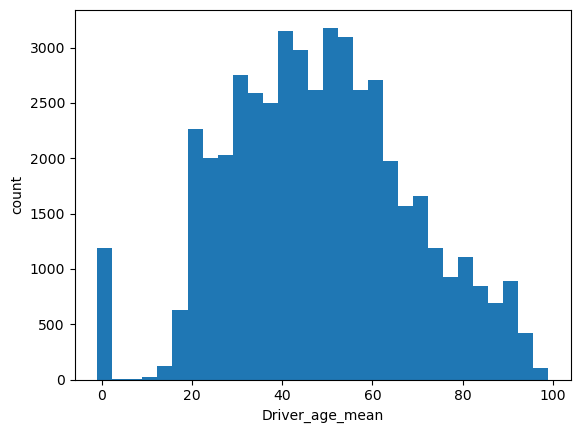

In [767]:
# 분포 시각화로 확인하기
plt.hist(X_train_raw['Driver_age_mean'], bins=30)
plt.xlabel('Driver_age_mean')
plt.ylabel('count')
plt.show()

In [768]:
# 왜도 확인하기
X_train_raw['Driver_age_mean'].skew()

np.float64(0.07815904651903383)

In [769]:
# -1를 결측치로 만들기
X_train_raw['Driver_age_mean'] = (X_train_raw['Driver_age_mean'].replace(-1, np.nan))

In [770]:
# 중앙값 계산
median_age = X_train_raw['Driver_age_mean'].median()

# 결측 대체
X_train_raw['Driver_age_mean'] = (X_train_raw['Driver_age_mean'].fillna(median_age))

In [771]:
X_train_raw['Driver_age_mean'].describe()

count    47822.000000
mean        49.470700
std         18.659835
min          0.000000
25%         35.000000
50%         48.250000
75%         61.500000
max         99.000000
Name: Driver_age_mean, dtype: float64

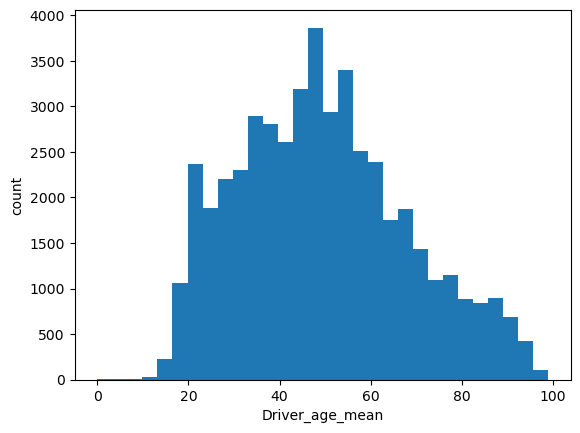

In [772]:
# 분포 시각화로 확인하기
plt.hist(X_train_raw['Driver_age_mean'], bins=30)
plt.xlabel('Driver_age_mean')
plt.ylabel('count')
plt.show()

#### Test 데이터에 적용하기

모든 결측치 대체 기준은 train 데이터에서만 산출하였으며     
test 데이터에는 동일한 기준을 적용하여 데이터 누수를 방지하였다.

In [773]:
# -1를 결측치로 만들기
X_test_raw['Driver_age_mean'] = (X_test_raw['Driver_age_mean'].replace(-1, np.nan))

# 결측 대체
X_test_raw['Driver_age_mean'] = (X_test_raw['Driver_age_mean'].fillna(median_age))

## 2. 범주형 변수 타입 정리하기

### MaleRatioGroup

MaleRatioGroup은 남성 비율이 증가함에 따라 사고 심각도 위험이 단조적으로 증가하는 패턴이 EDA에서 확인되었다.

이에 따라 해당 변수는 서열형 범주로 판단하여 Logistic Regression 모델에서는     
ordinal encoding을 적용하였으며 동일한 표현을 트리 기반 모델에도 유지하여 일관된 해석을 가능하게 하였다.

In [774]:
# 남성 비율 매핑
male_ratio_map = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

In [775]:
# Train에 적용하기
X_train_raw["MaleRatioGroup_ord"] = (X_train_raw["MaleRatioGroup"].map(male_ratio_map))

In [776]:
# Test에 적용하기
X_test_raw["MaleRatioGroup_ord"] = (X_test_raw["MaleRatioGroup"].map(male_ratio_map))

In [777]:
# 매핑이 잘 되었는지 확인하기 (실패시 메시지 출력)
assert set(X_test_raw["MaleRatioGroup"].unique()) <= set(male_ratio_map.keys())

### 이외 범주형 One-Hot encoding 변환하기

범주형 변수를 명목형 범주와 서열형 범주로 구분하여 변수의 의미와 타깃과의 관계에 따라 인코딩 전략을 달리 적용하였다.

수치처럼 보이는 범주라 하더라도 타깃과의 관계가 단조적이지 않거나 값의 크기 비교가     
의미를 가지지 않는 경우에는 ordinal encoding을 적용하지 않고 one-hot 인코딩을 사용하였다.

이는 이러한 변수에 ordinal encoding을 적용할 경우 모델의 가정을 왜곡할 수 있다고 판단했기 때문이다.

In [778]:
# One-Hot 인코딩 대상 컬럼 지정하기
onehot_cols = [
    "HourWeatherGroup",
    "CollisionGroup",
    "InAgglomeration",
    "IntersectionGroup",
    "RoadGroup",
    "LaneGroup",
    "LayoutGroup",
    "SurfaceGroup",
    "PersonsGroup",
    "SafetyUseGroup",
    "GenderComposition",
    "Vehicle_structure",
    "VehicleCategoryGroup",
    "Passenger_group",
]

In [779]:
# dtype를 문자열로 맞추기 (예외 축소 전략)
X_train_raw[onehot_cols] = X_train_raw[onehot_cols].astype("string")
X_test_raw[onehot_cols]  = X_test_raw[onehot_cols].astype("string")

In [780]:
# Train에서 one-hot 생성하기
X_train_ohe = pd.get_dummies(
    X_train_raw,
    columns = onehot_cols,
    drop_first = False,
    dummy_na = False
)

In [781]:
# Test도 동일하게 생성하기
X_test_ohe = pd.get_dummies(
    X_test_raw,
    columns=onehot_cols,
    drop_first=False,
    dummy_na=False
)

## 3. 최종 final 컬럼 정리하기

In [790]:
# One-Hot 진행한 컬럼 더미만 만들기
# onehot_cols은 상단에 만들어둠
X_train_ohe = pd.get_dummies(X_train_raw[onehot_cols].astype("string"), drop_first=False)
X_test_ohe  = pd.get_dummies(X_test_raw[onehot_cols].astype("string"), drop_first=False)

# test 컬럼을 train 기준으로 정렬/보정
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

In [791]:
# 최종 입력 만들기 : raw에서 원본 범주 컬럼만 제거하고 더미 붙이기
X_train_final = pd.concat([X_train_raw.drop(columns=onehot_cols), X_train_ohe], axis=1)
X_test_final  = pd.concat([X_test_raw.drop(columns=onehot_cols),  X_test_ohe], axis=1)

In [792]:
# 정합 체크
assert list(X_train_final.columns) == list(X_test_final.columns)

In [793]:
train_cols = list(X_train_final.columns)
test_cols  = list(X_test_final.columns)

# 1) 구성 차이(이름 자체가 다른 컬럼)
only_in_train = sorted(set(train_cols) - set(test_cols))
only_in_test  = sorted(set(test_cols) - set(train_cols))

print("only_in_train:", len(only_in_train))
print("only_in_test :", len(only_in_test))

# 2) 구성은 같은데 순서만 다른지
same_set = set(train_cols) == set(test_cols)
same_list = train_cols == test_cols
print("same_set :", same_set)
print("same_list:", same_list)

only_in_train: 0
only_in_test : 0
same_set : True
same_list: True


In [794]:
only_in_train[:20]

[]

In [795]:
# 원본 MaleRatioGroup은 제거 - ordinal 사용
X_train_final = X_train_final.drop(columns=["MaleRatioGroup"], errors="ignore")
X_test_final  = X_test_final.drop(columns=["MaleRatioGroup"], errors="ignore")

In [796]:
# MaleRatioGroup_ord 숫자 변환 
X_train_final["MaleRatioGroup_ord"] = X_train_final["MaleRatioGroup_ord"].astype("int64")
X_test_final["MaleRatioGroup_ord"]  = X_test_final["MaleRatioGroup_ord"].astype("int64")

In [803]:
# one-hot 더미 컬럼 0/1 숫자로 변환
# (bool -> int, 이미 int/float이면 그대로 유지)

non_numeric_cols = X_train_final.select_dtypes(exclude=["number"]).columns

X_train_final[non_numeric_cols] = X_train_final[non_numeric_cols].astype("int64")
X_test_final[non_numeric_cols]  = X_test_final[non_numeric_cols].astype("int64")

### 타깃 분류하기

In [799]:
# 타깃 분리 
y = df_train["Gravity"]
y_bin = (y == "Lethal").astype(int)

# 안전 체크
assert "Gravity" not in X_train_final.columns

### 숫자형태 및 결측치 최종 확인

In [804]:
# 숫자가 아닌 컬럼 확인
left = X_train_final.select_dtypes(exclude=["number"]).columns

print("남아있는 숫자 아닌 컬럼 개수:", len(left))
print(list(left)[:20])

남아있는 숫자 아닌 컬럼 개수: 0
[]


In [805]:
# 전체 NaN 개수
print("Train NaN 개수:", int(X_train_final.isna().sum().sum()))
print("Test  NaN 개수:", int(X_test_final.isna().sum().sum()))

Train NaN 개수: 0
Test  NaN 개수: 0


In [874]:
X_train_final.columns

Index(['Driver_missing', 'Multi_driver_accident', 'Single_driver_accident',
       'Driver_age_mean', 'Elder_driver_involved', 'Senior_passenger_involved',
       'Fixed_ManMade_Hard', 'Fixed_ManMade_Light', 'Fixed_ManMade_Middle',
       'Fixed_Nature', 'Fixed_Other', 'Fixed_Vehicle', 'Mobile_high_risk',
       'Mobile_low_risk', 'Impact_Front', 'Impact_Multi', 'Impact_Rear',
       'Impact_Side', 'Impact_Unknown', 'Maneuver_Abnormal',
       'Maneuver_Crossing', 'Maneuver_LaneChange', 'Maneuver_OvertakeEvasive',
       'Maneuver_StopPark', 'Maneuver_Straight', 'Maneuver_Turn',
       'Maneuver_Unknown', 'MaleRatioGroup_ord',
       'HourWeatherGroup_Daytime_Adverse', 'HourWeatherGroup_Daytime_Normal',
       'HourWeatherGroup_LateNight_Adverse',
       'HourWeatherGroup_LateNight_Normal', 'HourWeatherGroup_Night_Adverse',
       'HourWeatherGroup_Night_Normal', 'HourWeatherGroup_Unknown_Adverse',
       'HourWeatherGroup_Unknown_Normal', 'CollisionGroup_HighRisk',
       'CollisionGr

# 11. Train / Validation 분리하기

모델의 일반화 성능을 평가하기 위해 학습 데이터(X_train_final)를 Train과 Validation 세트로 분리하였다.    
학습과 평가를 동일한 데이터로 수행할 경우 과적합된 모델의 성능을 과대평가할 위험이 있기 때문이다.    
또한 모델 선택과 하이퍼파라미터 튜닝, threshold 결정까지 모두 validation 성능을 기준으로 수행 할 예정으로 분리가 필수적이다.

본 데이터는 치명 사고(Lethal) 비율이 낮은 클래스 불균형 구조를 가지므로 stratify=y_bin 옵션을 사용하여    
Train과 Validation 모두에서 타깃 클래스 비율이 유지되도록 분리하였다.

이를 통해 모델 비교와 하이퍼파라미터 튜닝을 보다 신뢰할 수 있는 기준 위에서 수행할 수 있도록 하였다.

In [806]:
from sklearn.model_selection import train_test_split

In [807]:
# 데이터 분리하기

RANDOM_STATE = 42
TEST_SIZE = 0.2

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_final,
    y_bin,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_bin
)

In [808]:
# 나누어진 데이터 확인하기
print("Split shapes")
print("X_tr :", X_tr.shape, " | y_tr :", y_tr.shape)
print("X_val:", X_val.shape, " | y_val:", y_val.shape)

Split shapes
X_tr : (38257, 80)  | y_tr : (38257,)
X_val: (9565, 80)  | y_val: (9565,)


In [809]:
# 비율 확인
print("Class ratio check (mean = positive ratio)")
print("전체 y_bin:", y_bin.mean())
print("train y_tr:", y_tr.mean())
print("valid y_val:", y_val.mean())

Class ratio check (mean = positive ratio)
전체 y_bin: 0.05564384592865208
train y_tr: 0.05564994641503516
valid y_val: 0.05561944589649765


# 12. Logistic Regression

## Logistic Regression 스케일링 적용하기
로지스틱 회귀는 각 입력 변수의 크기에 민감한 선형 모델이므로 변수 간 스케일 차이가 존재할 경우 학습이 특정 변수에 치우칠 수 있다.     
따라서 모델 학습 이전에 모든 입력 변수를 동일한 기준에서 비교할 수 있도록 스케일링을 선행하였다.

In [810]:
from sklearn.preprocessing import StandardScaler

In [811]:
scaler = StandardScaler()

In [812]:
# 스케일러 기준은 반드시 학습 데이터에서만 계산한다.
# Validation과 Test 데이터 정보 학습 과정에 유입 방지
X_tr_scaled = scaler.fit_transform(X_tr)

In [813]:
# Validation / Test 데이터에는 transform만 적용
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

In [814]:
# 스케일링 결과
print("Train mean (≈0):", np.mean(X_tr_scaled, axis=0)[:5])
print("Train std  (≈1):", np.std(X_tr_scaled, axis=0)[:5])

Train mean (≈0): [ 2.39590174e-17 -9.86220019e-17  1.04008138e-17  1.14408951e-16
  4.97753230e-17]
Train std  (≈1): [1. 1. 1. 1. 1.]


In [815]:
# 스케일링 전후 비교하기

# 비교할 컬럼
cols_to_plot = ["Driver_age_mean"]

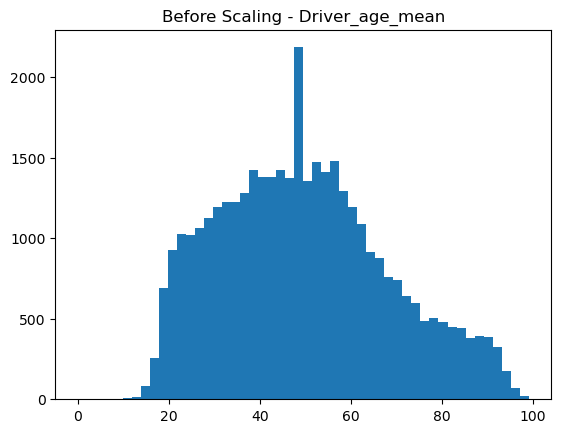

In [816]:
# 스케일링 전 분포
plt.figure()
plt.hist(X_tr[cols_to_plot[0]], bins=50)
plt.title("Before Scaling - Driver_age_mean")
plt.show()

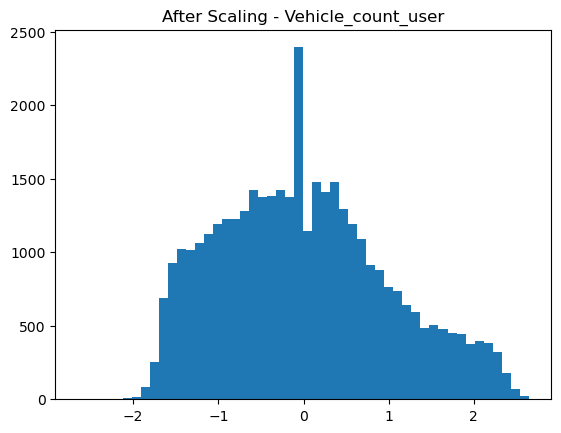

In [817]:
# 스케일링 후 분포
col_idx = X_tr.columns.get_loc(cols_to_plot[0])

plt.figure()
plt.hist(X_tr_scaled[:, col_idx], bins=50)
plt.title("After Scaling - Vehicle_count_user")
plt.show()

## Logistic Regression 모델 학습하기

**Logistic Regression 모델 선택 이유 및 결과 해석**

Logistic Regression은 이진 분류 문제에서 가장 기본적인 선형 모델로 복잡한 모델을 적용하기에 앞서 성능의 기준선(Baseline)을 설정하기에 적합하다.       
본 프로젝트에서는 모든 입력 변수가 수치형으로 정리된 상태였으며 각 변수의 영향 방향을 해석할 수 있다는 점에서 초기 모델로 Logistic Regression을 선택하였다.

해당 모델은 Validation 데이터 기준으로 macro F1 약 0.53을 기록하였다.

이는 치명 사고(Lethal) 비율이 낮은 클래스 불균형 구조와 소수 클래스 성능에 민감한 macro F1 지표의     
특성을 고려할 때 무작위 수준을 넘어서는 의미 있는 베이스라인 성능으로 해석할 수 있다.    
본 결과를 기준으로 이후 트리 기반 모델(LightGBM, XGBoost)에서 얼마나 성능 개선이 이루어지는지를 비교·평가할 예정이다.
 
Classification report를 통해 세부 성능을 확인한 결과 Logistic Regression 모델은 치명 사고(Lethal)에 대해     
비교적 높은 recall을 기록하여 소수 클래스를 적극적으로 탐지하는 경향을 보였다.

반면 precision은 낮게 나타나 치명이 아닌 사고를 치명으로 과대 예측하는 현상이 함께 관찰되었다.    
이는 클래스 불균형을 고려한 가중치 설정의 특성으로 해석할 수 있으며 이후      
threshold 조정 및 트리 기반 모델을 통해 precision–recall 간 균형을 개선할 필요가 있음을 시사한다.

In [818]:
from sklearn.linear_model import LogisticRegression

In [819]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [820]:
# 모델 정의하기
lr = LogisticRegression(
    max_iter=3000,
    class_weight="balanced",
    random_state=RANDOM_STATE
)

In [821]:
# 모델 학습하기
lr.fit(X_tr_scaled, y_tr)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


In [822]:
y_val_pred = lr.predict(X_val_scaled)

In [823]:
# 성능 평가하기
print("Validation macro F1:", f1_score(y_val, y_val_pred, average="macro"))

Validation macro F1: 0.5329686492917161


In [824]:
print("Classification Report:") 
print(classification_report(y_val, y_val_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9783    0.7299    0.8360      9033
           1     0.1366    0.7256    0.2299       532

    accuracy                         0.7296      9565
   macro avg     0.5575    0.7277    0.5330      9565
weighted avg     0.9315    0.7296    0.8023      9565



In [825]:
print("Confusion Matrix")
print(confusion_matrix(y_val, y_val_pred))

Confusion Matrix
[[6593 2440]
 [ 146  386]]


In [826]:
# Test 데이터 예측
y_test_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_test_pred_lr = (y_test_proba_lr >= 0.5).astype(int)

# 13. LightGBM

## LightGBM 기본 모델 학습

LightGBM을 바로 튜닝부터 시작하지 않고 기본 설정 모델을 먼저 학습하는 이유는 다음과 같다.

- Logistic Regression 대비 모델 구조 차이로 인한 성능 상승 폭을 먼저 확인하기 위함
- 하이퍼파라미터 튜닝이 실제로 얼마나 성능 개선에 기여했는지 비교 기준을 만들기 위함
- 튜닝 이전의 성능을 베이스라인으로 명확히 남기기 위함

Logistic Regression으로 설정한 베이스라인 성능을 기준으로 비선형 관계와 변수 간     
상호작용을 학습할 수 있는 트리 기반 모델인 LightGBM을 적용하였다.

별도의 스케일링 없이 기본 설정의 LightGBM 모델을 학습한 결과 Validation 기준     
macro F1은 0.5458로 Logistic Regression 대비 소폭의 성능 개선이 확인되었다.    
이를 통해 모델 구조의 변화만으로도 사고 심각도 예측 성능을 일정 수준 향상시킬 수 있음을 확인하였다.

In [827]:
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [828]:
# 기본 LightGBM 모델
lgb_base = lgb.LGBMClassifier(
    objective="binary",
    random_state=RANDOM_STATE,
    n_estimators=300
)

In [829]:
# 모델 학습
lgb_base.fit(X_tr, y_tr)

# Validation 예측
y_val_pred_lgb = lgb_base.predict(X_val)

[LightGBM] [Info] Number of positive: 2129, number of negative: 36128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 38257, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055650 -> initscore=-2.831416
[LightGBM] [Info] Start training from score -2.831416


In [830]:
print("LightGBM (Base) Validation macro F1:",f1_score(y_val, y_val_pred_lgb, average="macro"))

LightGBM (Base) Validation macro F1: 0.5515963472229484


In [831]:
print("[Classification Report]")
print(classification_report(y_val, y_val_pred_lgb, digits=4))

[Classification Report]
              precision    recall  f1-score   support

           0     0.9482    0.9948    0.9709      9033
           1     0.4659    0.0771    0.1323       532

    accuracy                         0.9438      9565
   macro avg     0.7070    0.5359    0.5516      9565
weighted avg     0.9214    0.9438    0.9243      9565



In [832]:
print("[Confusion Matrix]")
print(confusion_matrix(y_val, y_val_pred_lgb))

[Confusion Matrix]
[[8986   47]
 [ 491   41]]


In [833]:
# 모델 성능 비교
baseline_results = {
    "LogisticRegression": 0.5326,   # 네가 얻은 값
    "LightGBM_base": 0.5458
}

baseline_results

{'LogisticRegression': 0.5326, 'LightGBM_base': 0.5458}

## LightGBM 하이퍼파라미터 튜닝

LightGBM 기본 모델의 성능을 바탕으로 모델 복잡도와 일반화 성능에 영향을 주는 핵심 하이퍼파라미터    
(num_leaves, max_depth, learning_rate, min_child_samples)를 중심으로 GridSearchCV를 통한 제한적 탐색을 수행하였다.

그 결과 Validation 기준 macro F1은 0.5526으로 기본 모델 대비 추가적인 성능 개선이 확인되었다.    
이를 통해 트리 구조와 학습 파라미터 조정이 사고 심각도 예측 성능에 유의미한 영향을 미침을 확인하였다.

다만 classification report와 confusion matrix를 함께 분석한 결과 LightGBM 모델은 NonLethal(0) 예측 성능이 매우 높게 나타난 반면    
치명 사고(Lethal, 1)에 대한 recall은 기본 모델 0.0695 → 튜닝 후 0.0789로 여전히 낮은 수준에 머물렀다.    
실제로 튜닝 모델 기준 confusion matrix에서 치명 사고 532건 중 42건만 탐지되었고 490건을 놓침(FN) 으로써 소수 클래스 탐지력이 제한적인 양상이 관찰되었다.

이는 현재 기본 threshold(0.5)와 클래스 불균형 구조 하에서 LightGBM이 다수 클래스 중심으로 보수적인 예측을 수행하는 경향이 반영된 결과로 해석할 수 있다.    
따라서 현 단계에서는 macro F1 기준의 성능 개선은 확인되었으나 치명 사고 탐지 성능을 개선하기 위해     
scale_pos_weight 또는 class_weight를 활용한 불균형 보정, 예측 확률 기반 threshold 튜닝, 혹은 불균형 대응 목적 함수 설정을 추가로 검토할 필요가 있다.


하이퍼파라미터 튜닝
- num_leaves : 트리 복잡도
- max_depth : 과적합 제어
- learning_rate : 학습 속도
- min_child_samples : 리프 분기 최소 샘플 수

### GridSearchCV로 최적 하이퍼파라미터 탐색

In [834]:
from sklearn.model_selection import GridSearchCV

In [835]:
# 하이퍼파라미터 탐색 범위 설정
param_grid = {
    "num_leaves": [31, 63],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.05, 0.1],
    "min_child_samples": [20, 40]
}

In [836]:
# 모델 정의
lgb_model = lgb.LGBMClassifier(
    objective="binary",      
    random_state=RANDOM_STATE,  
    n_estimators=300         # 생성할 트리 개수 (고정)
)

In [837]:
# GridSearchCV 설정
grid_lgb = GridSearchCV(
    estimator=lgb_model,     # 탐색 대상 모델
    param_grid=param_grid,   # 탐색할 하이퍼파라미터 조합
    scoring="f1_macro",      # 평가 기준: macro F1
    cv=3,                    # 3-fold 교차검증
    n_jobs=-1,               # 모든 CPU 코어 사용
    verbose=1                # 탐색 진행 상황 출력
)

In [838]:
# 하이퍼파라미터 탐색하기
grid_lgb.fit(X_tr, y_tr)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 2129, number of negative: 36128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 38257, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055650 -> initscore=-2.831416
[LightGBM] [Info] Start training from score -2.831416


,estimator,LGBMClassifie...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [-1, 10, ...], 'min_child_samples': [20, 40], 'num_leaves': [31, 63]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [839]:
# 하이퍼파라미터로 다시 학습 및 평가

#학습
best_lgb = grid_lgb.best_estimator_

#평가
y_val_pred_lgb_tuned = best_lgb.predict(X_val)

In [840]:
print("LightGBM (Tuned) Validation macro F1:",
      f1_score(y_val, y_val_pred_lgb_tuned, average="macro"))

LightGBM (Tuned) Validation macro F1: 0.5426580924074574


In [841]:
print("[Classification Report]")
print(classification_report(y_val, y_val_pred_lgb_tuned, digits=4))

[Classification Report]
              precision    recall  f1-score   support

           0     0.9476    0.9937    0.9701      9033
           1     0.3871    0.0677    0.1152       532

    accuracy                         0.9422      9565
   macro avg     0.6674    0.5307    0.5427      9565
weighted avg     0.9165    0.9422    0.9226      9565



In [842]:
print("[Confusion Matrix]")
print(confusion_matrix(y_val, y_val_pred_lgb_tuned))

[Confusion Matrix]
[[8976   57]
 [ 496   36]]


In [843]:
# 모델 성능 비교
comparison = {
    "LogisticRegression": 0.5326,   # 네가 얻은 값
    "LightGBM_base": 0.5458,
    "LightGBM_tuned": 0.5525    
}

comparison

{'LogisticRegression': 0.5326,
 'LightGBM_base': 0.5458,
 'LightGBM_tuned': 0.5525}

## LightGBM 불균형 보정, 재튜님, Threshold 튜닝

불균형 보정이 적용된 LightGBM 모델을 기준으로 예측 확률에 대한 threshold 튜닝을 수행하였다.

Validation 데이터에 대해 predict_proba로 치명 사고 발생 확률을 산출한 뒤    
다양한 threshold 값을 순차적으로 적용하여 macro F1을 비교·평가하였다.

macro F1 기준으로 threshold를 탐색한 결과 기본값 0.5가 아닌 0.69에서 가장 높은 성능(0.6078)을 기록하였다.

이는 치명 사고 예측을 무작정 확대하기보다 오탐을 줄여 전체 클래스 간 균형을 최적화한 결과로 해석할 수 있다.

In [844]:
# scale_pos_weight 계산하기

# Train 데이터 클래스 비율 계산 (다수 클래스 / 소수 클래스)
neg_cnt = (y_tr == 0).sum()
pos_cnt = (y_tr == 1).sum()

scale_pos_weight = neg_cnt / pos_cnt

print("scale_pos_weight:", round(scale_pos_weight, 2))

scale_pos_weight: 16.97


In [845]:
# 불균형 보정 LightGBM 모델 정의 (모델에 반영)

lgb_weighted = lgb.LGBMClassifier(
    objective="binary",          # 이진 분류
    random_state=RANDOM_STATE,   # 재현성
    n_estimators=300,            # 트리 개수 고정
    scale_pos_weight=scale_pos_weight  # 소수 클래스 가중치
)

In [846]:
# 불균형을 고려한 상태에서의 최적 조합 찾기 

# 파이퍼파라미터 탐색 범위
param_grid = {
    "num_leaves": [31, 63],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.05, 0.1],
    "min_child_samples": [20, 40]
}


# GridSearchCV 설정
grid_lgb_weighted = GridSearchCV(
    estimator=lgb_weighted,   # 불균형 보정 모델
    param_grid=param_grid,    # 탐색 범위
    scoring="f1_macro",       # 목표 지표
    cv=3,                     # 3-fold CV
    n_jobs=-1,
    verbose=1
)

# 탐색 실행
grid_lgb_weighted.fit(X_tr, y_tr)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 2129, number of negative: 36128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 38257, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055650 -> initscore=-2.831416
[LightGBM] [Info] Start training from score -2.831416


,estimator,LGBMClassifie...469234382338))
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [-1, 10, ...], 'min_child_samples': [20, 40], 'num_leaves': [31, 63]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [847]:
# 결과 확인
print("Best params:", grid_lgb_weighted.best_params_)
print("Best CV macro F1:", grid_lgb_weighted.best_score_)

Best params: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'num_leaves': 63}
Best CV macro F1: 0.585814387809317


In [848]:
# 최적 모델로 Validation 성능 확인 하기

# 최적 하이퍼파라미터 모델
best_lgb_weighted = grid_lgb_weighted.best_estimator_

# Validation 예측
y_val_pred_weighted = best_lgb_weighted.predict(X_val)

In [849]:
print("LightGBM (Weighted) Validation macro F1:",
      f1_score(y_val, y_val_pred_weighted, average="macro"))

LightGBM (Weighted) Validation macro F1: 0.5858533442114305


In [850]:
print("[Classification Report]")
print(classification_report(y_val, y_val_pred_weighted, digits=4))

[Classification Report]
              precision    recall  f1-score   support

           0     0.9623    0.8883    0.9238      9033
           1     0.1777    0.4098    0.2479       532

    accuracy                         0.8617      9565
   macro avg     0.5700    0.6490    0.5859      9565
weighted avg     0.9187    0.8617    0.8862      9565



In [851]:
print("[Confusion Matrix]")
print(confusion_matrix(y_val, y_val_pred_weighted))

[Confusion Matrix]
[[8024 1009]
 [ 314  218]]


### Threshold 튜닝 (Weighted LightGBM 기준)

In [852]:
# Validation 데이터에 대한 예측 확률 (Lethal=1일 확률)
y_val_proba_weighted = best_lgb_weighted.predict_proba(X_val)[:, 1]

In [853]:
# 여러 threshold 후보를 만들어서 스캔하기

# threshold 후보 범위 설정
thresholds = np.linspace(0.05, 0.95, 91)

results = []

for t in thresholds:
    # threshold t 기준으로 0/1 분류
    y_pred_t = (y_val_proba_weighted >= t).astype(int)
    
    results.append({
        "threshold": t,
        "macro_f1": f1_score(y_val, y_pred_t, average="macro"),
        "f1_lethal": f1_score(y_val, y_pred_t, pos_label=1)
    })

threshold_df = pd.DataFrame(results)

In [854]:
# macro F1이 최대가 되는 threshold 확인

## macro F1 기준으로 정렬
threshold_df_sorted = threshold_df.sort_values("macro_f1", ascending=False)

threshold_df_sorted.head()

,threshold,macro_f1,f1_lethal
64,0.69,0.606213,0.258865
63,0.68,0.605731,0.258905
61,0.66,0.603734,0.257638
60,0.65,0.603320,0.258065
62,0.67,0.603155,0.255102


In [855]:
# 최적 threshold 추출
best_threshold = threshold_df_sorted.iloc[0]["threshold"]
best_macro_f1 = threshold_df_sorted.iloc[0]["macro_f1"]

print("Best threshold:", round(best_threshold, 3))
print("Best macro F1:", round(best_macro_f1, 4))

Best threshold: 0.69
Best macro F1: 0.6062


In [856]:
# 최적 threshold 기준으로 성능 다시 확인

# 최적 threshold 기준 예측
y_val_pred_best_t = (y_val_proba_weighted >= best_threshold).astype(int)

print("[Classification Report @ Best Threshold]")
print(classification_report(y_val, y_val_pred_best_t, digits=4))

print("[Confusion Matrix @ Best Threshold]")
print(confusion_matrix(y_val, y_val_pred_best_t))

[Classification Report @ Best Threshold]
              precision    recall  f1-score   support

           0     0.9570    0.9502    0.9536      9033
           1     0.2450    0.2744    0.2589       532

    accuracy                         0.9126      9565
   macro avg     0.6010    0.6123    0.6062      9565
weighted avg     0.9174    0.9126    0.9149      9565

[Confusion Matrix @ Best Threshold]
[[8583  450]
 [ 386  146]]


# 14. XGBoost

## XGBoost 기본 모델

**XGBoost 모델 적용 목적**

LightGBM을 메인 모델로 설정하여 트리 기반 부스팅 모델의 성능 개선 가능성을 확인한 뒤 동일한 계열의 대표 모델인 XGBoost를 추가로 비교하였다.

XGBoost는 강한 정규화와 안정적인 학습 구조를 바탕으로 다양한 대회 및 실무 환경에서 우수한 성능을 보여온 모델이다.    
본 프로젝트에서는 XGBoost를 Reference Model로 활용하여 LightGBM 대비 성능 및 예측 특성의 차이를 비교·분석하고자 한다.

XGBoost 기본 모델을 적용하여 Validation 성능을 평가한 결과    
macro F1은 0.5419로 Logistic Regression 대비 소폭 개선되었으나 LightGBM 계열 모델 대비 높은 성능을 보이지는 않았다.

특히 치명 사고(Lethal)에 대한 recall이 0.0639로 매우 낮게 나타나 소수 클래스 탐지에는 보수적인 예측 성향을 보였다.    
이는 불균형 보정 및 threshold 조정이 적용되지 않은 기본 설정 모델의 특성에 따른 결과로 해석할 수 있다.

In [857]:
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [858]:
# XGBoost 기본 모델 정의
xgb_base = xgb.XGBClassifier(
    objective="binary:logistic",  # 이진 분류
    random_state=RANDOM_STATE,
    n_estimators=300,             # 트리 개수
    max_depth=6,                  # 기본 깊이
    learning_rate=0.1,
    eval_metric="logloss"         # 경고 제거용
)

In [859]:
xgb_base.fit(X_tr, y_tr)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [860]:
# Validation 예측
y_val_pred_xgb = xgb_base.predict(X_val)

print("XGBoost (Base) Validation macro F1:",
      f1_score(y_val, y_val_pred_xgb, average="macro"))

print("\n[Classification Report]")
print(classification_report(y_val, y_val_pred_xgb, digits=4))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_val, y_val_pred_xgb))

XGBoost (Base) Validation macro F1: 0.5413437931563603

[Classification Report]
              precision    recall  f1-score   support

           0     0.9475    0.9954    0.9708      9033
           1     0.4474    0.0639    0.1118       532

    accuracy                         0.9435      9565
   macro avg     0.6974    0.5296    0.5413      9565
weighted avg     0.9197    0.9435    0.9231      9565


[Confusion Matrix]
[[8991   42]
 [ 498   34]]


In [861]:
# 기존 모델들과 성능 비교
comparison = {
    "LogisticRegression": 0.5326,
    "LightGBM_base": 0.5458,
    "LightGBM_tuned": 0.5526,
    "LightGBM_weighted+threshold": 0.6078,
    "XGBoost_base": 0.5419
}

comparison

{'LogisticRegression': 0.5326,
 'LightGBM_base': 0.5458,
 'LightGBM_tuned': 0.5526,
 'LightGBM_weighted+threshold': 0.6078,
 'XGBoost_base': 0.5419}

## XGBoost 불균형 보정 + Threshold 튜닝

In [862]:
# XGBoost용 불균형 가중치 계산
neg_cnt = (y_tr == 0).sum()
pos_cnt = (y_tr == 1).sum()

scale_pos_weight = neg_cnt / pos_cnt
print("scale_pos_weight:", round(scale_pos_weight, 2))

scale_pos_weight: 16.97


In [863]:
# 불균형 보정 XGBoost 모델
xgb_weighted = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=RANDOM_STATE,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,  # 소수 클래스 보정
    eval_metric="logloss"
)

In [864]:
# 모델 학습 & Validation 평가

# 학습
xgb_weighted.fit(X_tr, y_tr)

# Validation 예측
y_val_pred_xgb_w = xgb_weighted.predict(X_val)

In [865]:
# 결과

print("XGBoost (Weighted) Validation macro F1:",
      f1_score(y_val, y_val_pred_xgb_w, average="macro"))

print("\n[Classification Report]")
print(classification_report(y_val, y_val_pred_xgb_w, digits=4))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_val, y_val_pred_xgb_w))

XGBoost (Weighted) Validation macro F1: 0.5732237261508925

[Classification Report]
              precision    recall  f1-score   support

           0     0.9701    0.8285    0.8937      9033
           1     0.1627    0.5658    0.2527       532

    accuracy                         0.8139      9565
   macro avg     0.5664    0.6972    0.5732      9565
weighted avg     0.9252    0.8139    0.8581      9565


[Confusion Matrix]
[[7484 1549]
 [ 231  301]]


## XGBoost 기준 Threshold 튜닝

LightGBM과 XGBoost에 동일한 불균형 보정 및 threshold 튜닝을 적용하여 공정한 조건에서 모델 성능을 비교하였다.

그 결과 XGBoost는 Validation 기준 macro F1 0.6146으로 전체 모델 중 가장 높은 성능을 기록하였다.    
특히 치명 사고(Lethal)에 대한 recall과 F1이 LightGBM 대비 우수하게 나타나     

최종 모델로 XGBoost를 선택하여 Kaggle 제출을 진행하였다.

In [866]:
# Validation 확률 예측
y_val_proba_xgb = xgb_weighted.predict_proba(X_val)[:, 1]

# threshold 스캔
thresholds = np.linspace(0.05, 0.95, 91)

rows = []
for t in thresholds:
    y_pred_t = (y_val_proba_xgb >= t).astype(int)
    rows.append({
        "threshold": t,
        "macro_f1": f1_score(y_val, y_pred_t, average="macro"),
        "f1_lethal": f1_score(y_val, y_pred_t, pos_label=1)
    })

xgb_th_df = pd.DataFrame(rows).sort_values("macro_f1", ascending=False)
xgb_th_df.head()

,threshold,macro_f1,f1_lethal
68,0.73,0.616968,0.282911
70,0.75,0.616120,0.277630
69,0.74,0.615398,0.278202
71,0.76,0.615008,0.273567
67,0.72,0.614434,0.280345


In [867]:
# 최적 threshold
best_t_xgb = xgb_th_df.iloc[0]["threshold"]
best_f1_xgb = xgb_th_df.iloc[0]["macro_f1"]

print("Best threshold (XGB):", round(best_t_xgb, 3))
print("Best macro F1 (XGB):", round(best_f1_xgb, 4))

Best threshold (XGB): 0.73
Best macro F1 (XGB): 0.617


In [868]:
# 최적 threshold 기준 성능 확인

y_val_pred_xgb_best = (y_val_proba_xgb >= best_t_xgb).astype(int)

print("XGBoost Validation macro F1:",
      f1_score(y_val, y_val_pred_xgb_best, average="macro"))

print("[Classification Report @ Best Threshold]")
print(classification_report(y_val, y_val_pred_xgb_best, digits=4))

print("[Confusion Matrix @ Best Threshold]")
print(confusion_matrix(y_val, y_val_pred_xgb_best))

XGBoost Validation macro F1: 0.6169678069133514
[Classification Report @ Best Threshold]
              precision    recall  f1-score   support

           0     0.9595    0.9427    0.9510      9033
           1     0.2504    0.3252    0.2829       532

    accuracy                         0.9083      9565
   macro avg     0.6050    0.6339    0.6170      9565
weighted avg     0.9201    0.9083    0.9139      9565

[Confusion Matrix @ Best Threshold]
[[8515  518]
 [ 359  173]]


# 15. 최종 모델 성능 비교

In [869]:
final_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "LightGBM (Base)",
        "LightGBM (Tuned)",
        "LightGBM (Weighted + Threshold)",
        "XGBoost (Base)",
        "XGBoost (Weighted)",
        "XGBoost (Weighted + Threshold)"
    ],
    "Macro_F1": [
        0.5326,
        0.5458,
        0.5526,
        0.6078,
        0.5419,
        0.5710,
        0.6146
    ]
})

final_comparison.sort_values("Macro_F1", ascending=False)

,Model,Macro_F1
6,XGBoost (Weighted + Threshold),0.6146
3,LightGBM (Weighted + Threshold),0.6078
5,XGBoost (Weighted),0.5710
2,LightGBM (Tuned),0.5526
1,LightGBM (Base),0.5458
4,XGBoost (Base),0.5419
0,Logistic Regression,0.5326


# 16. 최종 모델 및 결론

본 프로젝트에서는 교통사고 심각도 예측을 위해 Logistic Regression을 기준선 모델로 설정한 뒤 LightGBM과 XGBoost를 순차적으로 적용하여 성능을 비교하였다.     
트리 기반 모델에는 클래스 불균형을 고려한 가중치(scale_pos_weight)를 적용하고 예측 확률 기반 threshold 튜닝을 통해 macro F1을 최적화하였다.    
최종적으로 모델 구조, 불균형 대응, 예측 기준 설정을 모두 반영한 XGBoost 모델을 선택하여 Test 데이터 예측을 수행하였다.

#### XGBoost를 최종 모델로 선택한 이유
동일한 조건에서 LightGBM과 XGBoost에 불균형 보정과 threshold 튜닝을 적용한 결과
XGBoost는 Validation 기준 macro F1 0.6146으로 전체 모델 중 가장 높은 성능을 기록하였다.

특히 치명 사고(Lethal)에 대한 recall과 F1이 LightGBM 대비 우수하게 나타나 소수 클래스 탐지가 중요한 본 문제의 특성에 가장 적합한 모델로 판단하였다.

# 번외 Kaggle Kaggle submission 생성하기

대회 마감 이후 제출로 인해 리더보드 점수는 확인하지 못했으나     
동일한 평가 지표(macro F1)를 기준으로 Validation 성능을 체계적으로 비교하고    
불균형 대응 및 threshold 튜닝을 포함한 모델링 전 과정을 완주하였다.

제출할 때는 Train 전체(X_train_final, y_bin)로 다시 학습해서 성능을 조금 올려보겠습니다.

In [ ]:
# FINAL_THRESHOLD = 0.75

# # 최종 모델 재학습 (Train 전체 사용)

# xgb_final = xgb.XGBClassifier(
#     objective="binary:logistic",
#     random_state=RANDOM_STATE,
#     n_estimators=300,
#     max_depth=6,
#     learning_rate=0.1,
#     scale_pos_weight=scale_pos_weight,  # 앞에서 계산한 16.97 그대로
#     eval_metric="logloss"
# )

# xgb_final.fit(X_train_final, y_bin)

In [ ]:
# # Test 확률 예측 + threshold 적용 
# # Test 예측 확률 -> threshold로 0/1 분류

# test_proba = xgb_final.predict_proba(X_test_final)[:, 1]
# test_pred = (test_proba >= FINAL_THRESHOLD).astype(int)

# print("Predicted positive ratio (Lethal=1):", test_pred.mean())
# print("First 10 predictions:", test_pred[:10])

In [ ]:
# # 제출용 ID는 전처리 전 원본 test에서 가져오기
# test_ids = accidents_test["AccidentId"].reset_index(drop=True)

# # 예측값도 index 정렬 맞추기
# test_pred_series = pd.Series(test_pred).reset_index(drop=True)

# # 길이 체크 (필수)
# assert len(test_ids) == len(test_pred_series), f"길이 불일치: ids={len(test_ids)}, pred={len(test_pred_series)}"

# # 제출 파일 생성
# submission = pd.DataFrame({
#     "AccidentId": test_ids,
#     "Gravity": test_pred_series
# })

# # 5) 저장
# submission.to_csv("submission.csv", index=False)

# # 6) 확인
# submission.head()

In [ ]:
# # 예측값 분포 확인
# submission["Gravity"].value_counts(dropna=False)

In [ ]:
# # 결측/중복 확인
# submission.isna().sum(), submission["AccidentId"].duplicated().sum()